<a href="https://colab.research.google.com/github/AM311/MLops-demo/blob/main/notebooks/BackUp_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BACKUP lavoro svolto finora

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Steps 1 & 2: Data Exploration, Validation and Wrangling

### Load and Inspect the Dataset

We use `pandas` to load the dataset (`telco_churn.csv`) from GitHub.

In [ ]:
# Per accedere a Google Drive
# dataset = pd.read_csv('/home/edi/Scrivania/uni/Mag/DDSE/BBBB/telco_churn.csv')

url = 'https://raw.githubusercontent.com/AM311/MLops-demo/refs/heads/main/data/raw/telco_churn.csv'
dataset = pd.read_csv(url)

Then, we use `pandas` functions to explore the dataset and understand its structure.

In [ ]:
# head() shows the first 5 rows of the dataset

dataset.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80        1024.10   
2                        0                       203.94        1910.88   
3                        0                       494.00        2995.07   
4                        0                       234.21        3102.36   

   Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                   3          Churned         Yes          91  5433   
1                   3          Churned         Yes          69  5302   
2                   2          Churned         Yes          81  3179   
3                   2          Churned         Yes          88  5337   
4                   2          Churned         Yes          67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 50 columns]

In [ ]:
# head() shows data-types (categorical, numerical, ...) of each column

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [ ]:
# describe() allows to summarize numerical features (e.g. mean, standard deviation, min, max)

dataset.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  7043.000000    7043.000000          7043.000000       7043.000000   
mean   -119.756684   22139.603294             1.951867         32.386767   
std       2.154425   21152.392837             3.001199         24.542061   
min    -124.301372      11.000000             0.000000          1.000000   
25%    -121.788090    2344.000000             0.000000          9.000000   
50%    -119.595293   17554.000000             0.000000         29.000000   
75%    -117.969795   36125.000000             3.000000         55.000000   
max    -114.192901  105285.000000            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  Satisfaction Score  \
count                  7043.000000    7043.000000         7043.000000   
mean                    749.099262    3034.379056            3.244924   
std                     846.660055    2865.204542            1.201657   
min                       0.000000      21.360000            1.000000   
25%                      70.545000     605.610000            3.000000   
50%                     401.440000    2108.640000            3.000000   
75%                    1191.100000    4801.145000            4.000000   
max                    3564.720000   11979.340000            5.000000   

       Churn Score         CLTV  
count  7043.000000  7043.000000  
mean     58.505040  4400.295755  
std      21.170031  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.500000  5380.500000  
max      96.000000  6500.000000

In [ ]:
# nunique() is used to count unique values for categorical features

dataset.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       1585
Total Charges                        6540
Total Refunds                         500
Total Extra Data Charges               16
Total Long Distance Charges          6087
Total Revenue                        6982
Satisfaction Score                      5
Customer Status                         3
Churn Label                             2
Churn Score                            81
CLTV                                 3438
Churn Category                          5
Churn Reason                           20
dtype: int64

### Features Drop

Once we understood the structure of the dataset, we start taking some decisions about the features to retain and the ones to drop.

First of all, we decide to **drop** all the features that:

*   Provide no information about the problem;
  *  `Customer ID`
*   Have just one single value among all the entries;
  *  `Country`
  *  `State`
  *  `Quarter`
*   Can be derived from or are redundant in respect to other features;
  *  `Under 30`
  *  `Senior Citizen`
  *  `Dependents`
  *  `City`
  *  `Zip Code`
  *  `Referred a Friend`

In [ ]:
dataset = dataset.drop(columns=['Customer ID', 'Under 30', 'Senior Citizen', 'Dependents', 'Country', 'State', 'City', 'Zip Code', 'Quarter', 'Referred a Friend'])

Also, since we want to predict if a certain customer will **churn**, we drop the features that would provide information leakage.

In [ ]:
dataset = dataset.drop(columns=['Customer Status', 'Churn Score', 'Churn Category', 'Churn Reason'])

Now that we have a cleaned-up Dataset, we start inspecting it more deeply.

### Duplicated Rows

First of all, we check if there are some duplicated rows which can be easily dropped, since they do not provide any additional information.

In [ ]:
# duplicated().sum() allows to count all the duplicated instances

dataset.duplicated().sum()

0

There are not duplicated rows, so no action is needed.

### Handling Missing Values

Then, we check if there are some missing values among the columns.

In [ ]:
# isna().sum() allows to count all the instances that contain null (i.e. empty) values for each column

dataset.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Latitude                                0
Longitude                               0
Population                              0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Satisfaction Score                      0
Churn Label                             0
CLTV                                    0
dtype: int64

There are features with a lot of null values: since all of these features are categorical features with 3 or more labels, null values will be replaces in the next steps by introducing a new custom "empty" category.

### Feature Analysis (ToDo)

...forse fare prima di Encoding/Conversion...

*   TARGET VARIABLE (CHURN): visualize class distribution (via Bar Plot) + check for class imbalance (if one class dominates, consider techniques like SMOTE or class weights)
*   NUMERICAL FEATURES: Histograms or KDE plots for understanding distributions + Box plots for identifying outliers.
*   CATEGORICAL FEATURES: Bar plots to show the frequency of each category + Heatmaps or stacked bar charts to analyze relationships with Churn.
*   CORRELATION ANALYSIS: Use .corr() and sns.heatmap() to identify correlations among numerical features + Remove highly correlated features to reduce multicollinearity if necessary (*secondo me una delle prime cose da fare così possiamo eventualmente rimuovere ancora qualche colonna*)



<Axes: xlabel='Churn Label', ylabel='count'>

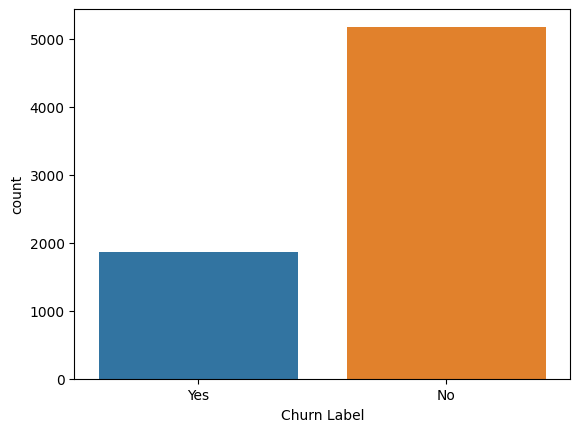

In [ ]:
#le labels sono fortemente sbilanciate
sns.countplot(data=dataset, x="Churn Label",hue="Churn Label")

In [ ]:
#divisione tra le colonne con dati numerici e categorici
cols = dataset.columns
num_cols = dataset._get_numeric_data().columns
categorical = list(set(cols) - set(num_cols))
numerical =  list(set(dataset._get_numeric_data().columns))
print(numerical)
print(categorical)

['Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Extra Data Charges', 'Latitude', 'Total Long Distance Charges', 'Avg Monthly Long Distance Charges', 'CLTV', 'Total Revenue', 'Age', 'Total Refunds', 'Longitude', 'Total Charges', 'Satisfaction Score', 'Population']
['Device Protection Plan', 'Unlimited Data', 'Online Security', 'Paperless Billing', 'Phone Service', 'Internet Service', 'Streaming Movies', 'Contract', 'Streaming TV', 'Payment Method', 'Multiple Lines', 'Married', 'Gender', 'Online Backup', 'Internet Type', 'Streaming Music', 'Churn Label', 'Offer', 'Premium Tech Support']


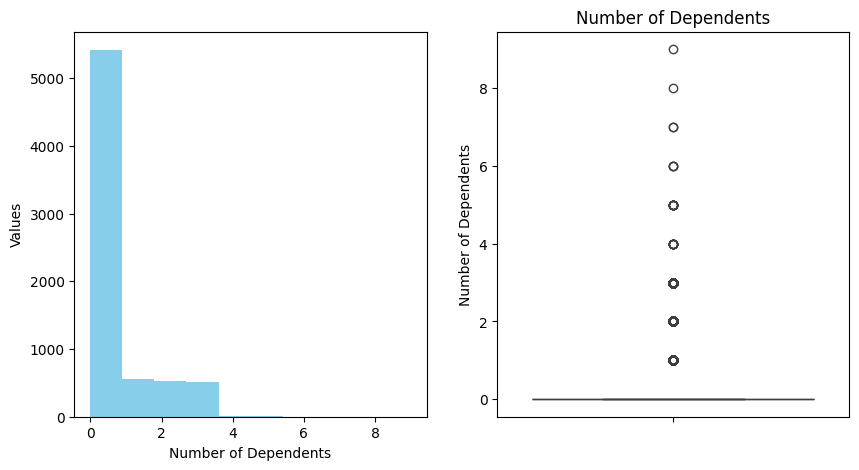

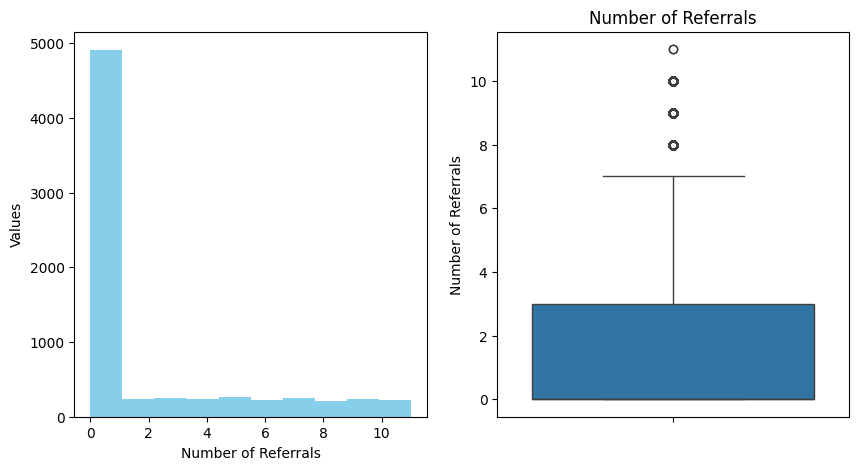

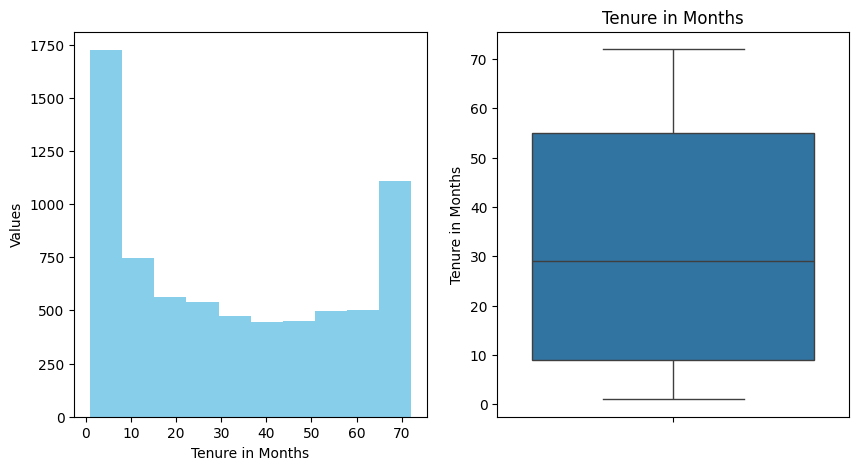

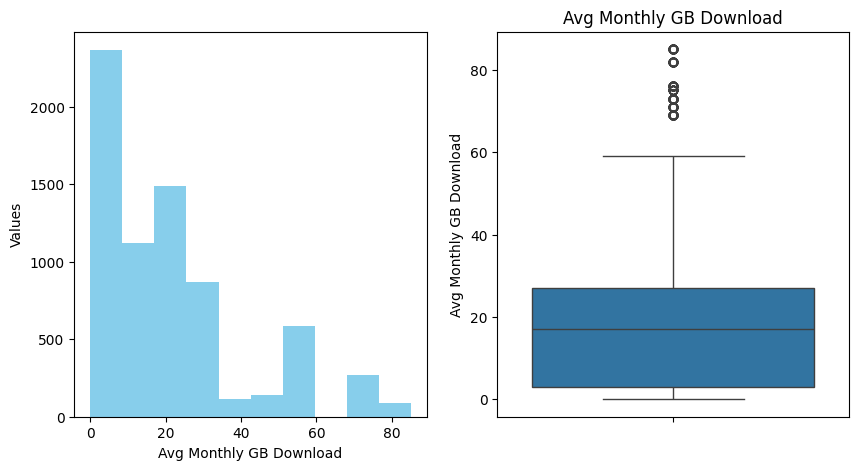

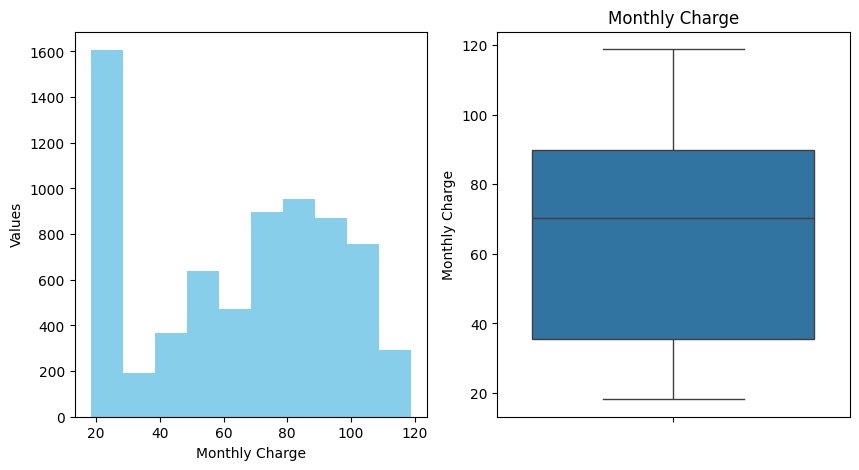

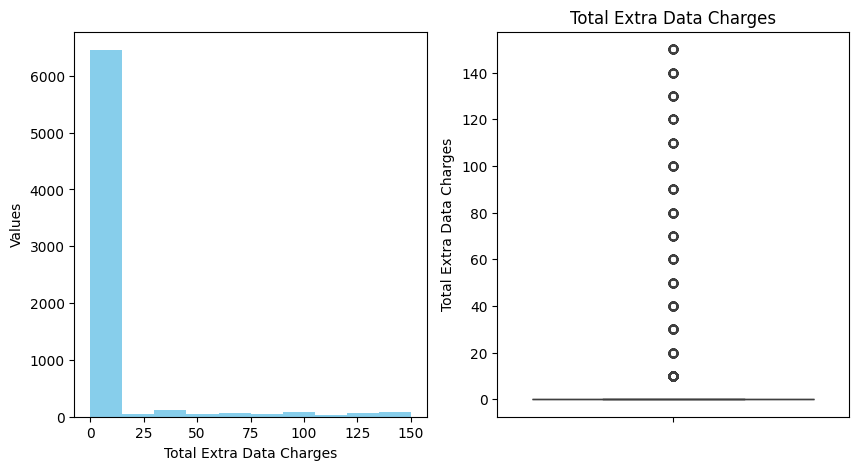

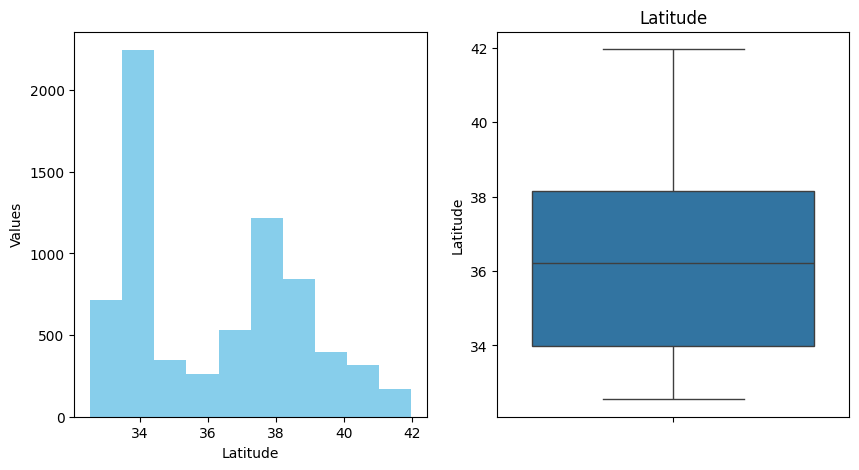

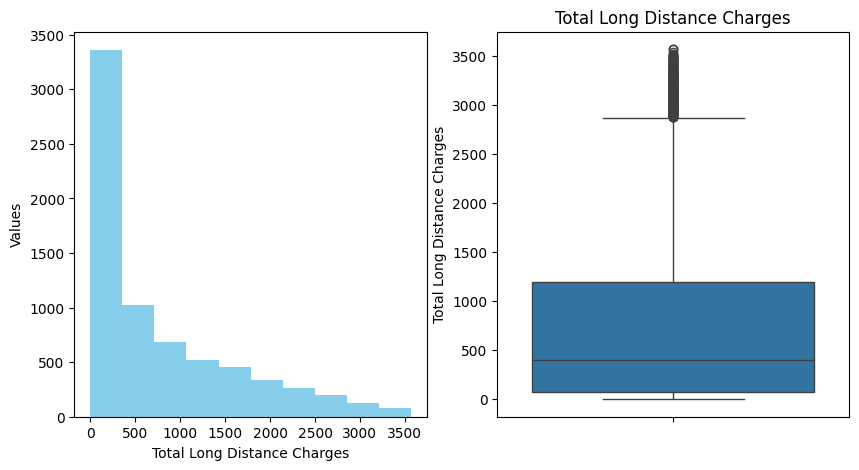

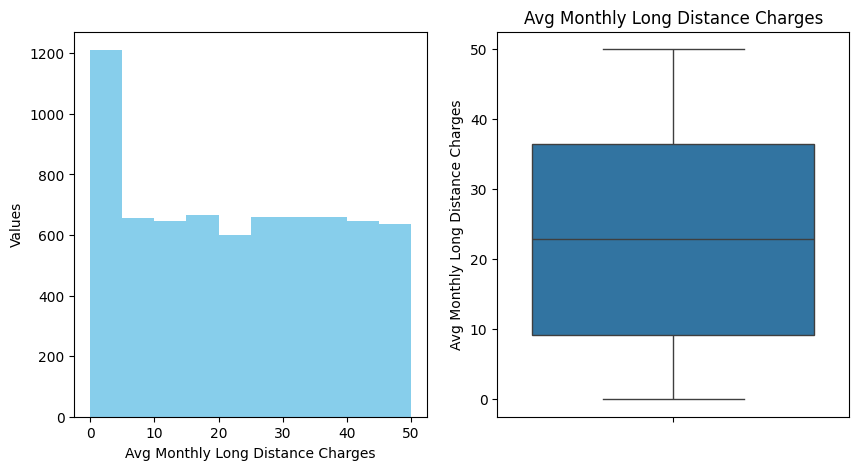

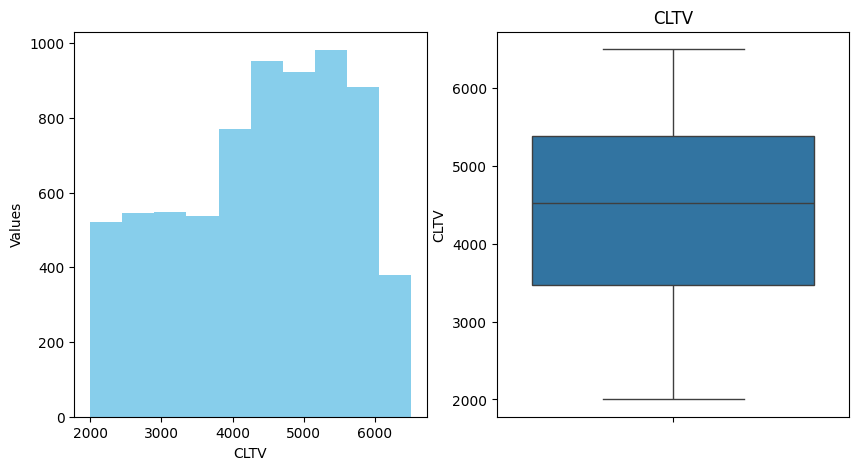

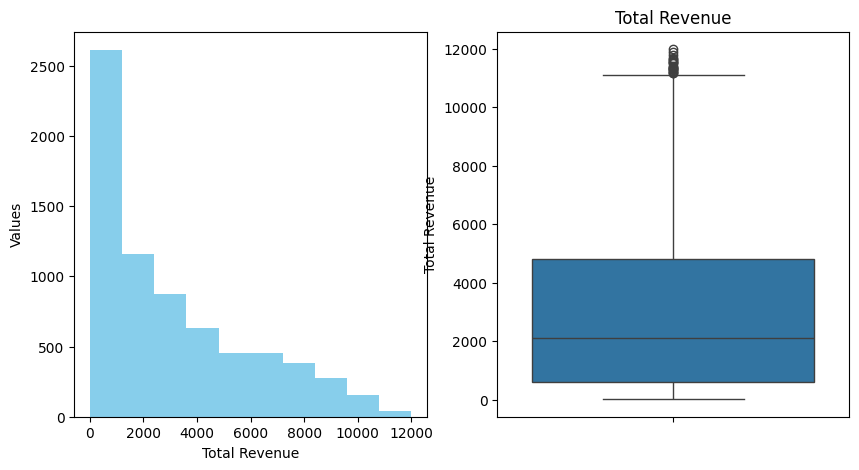

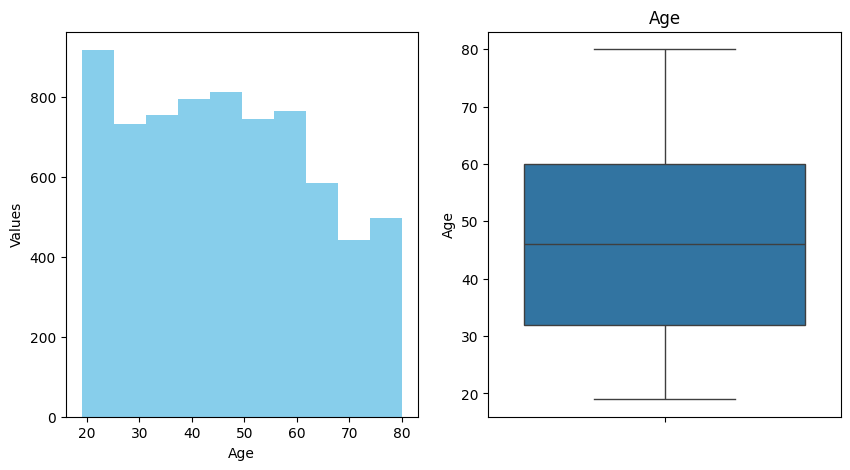

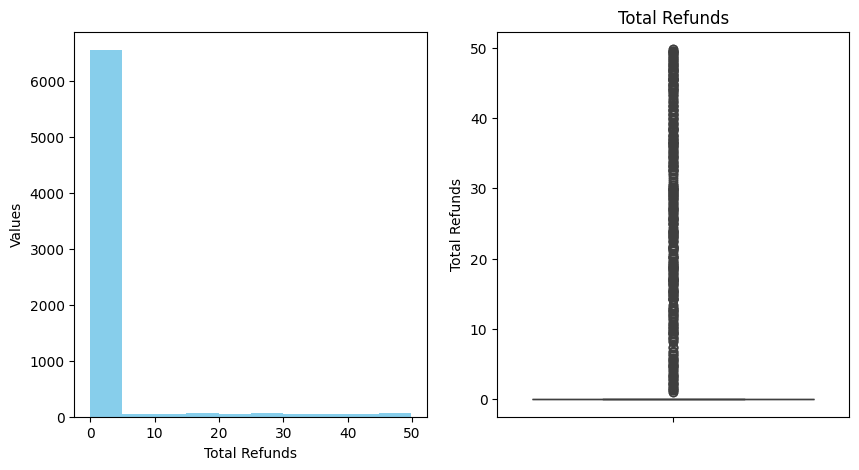

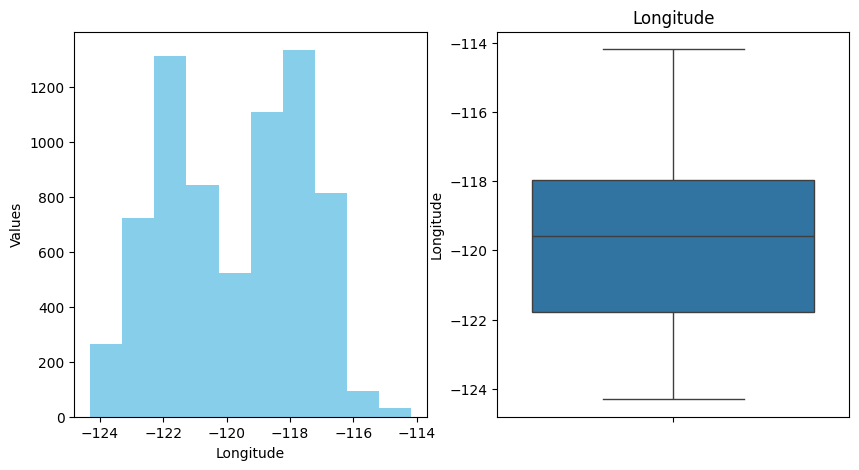

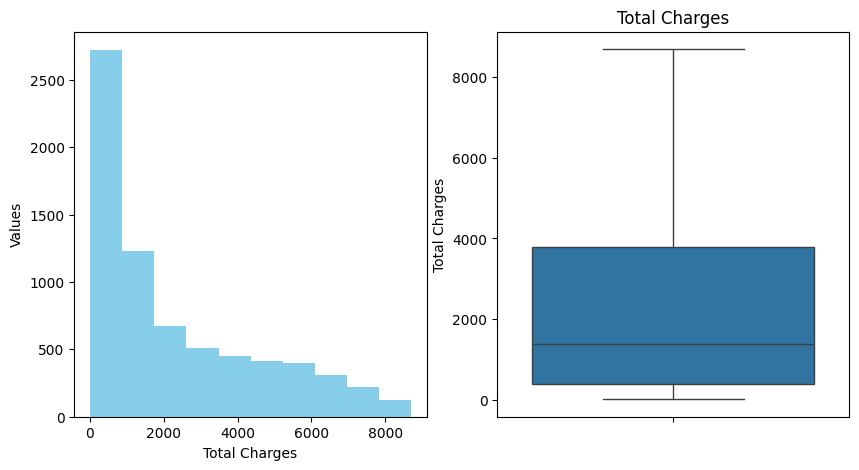

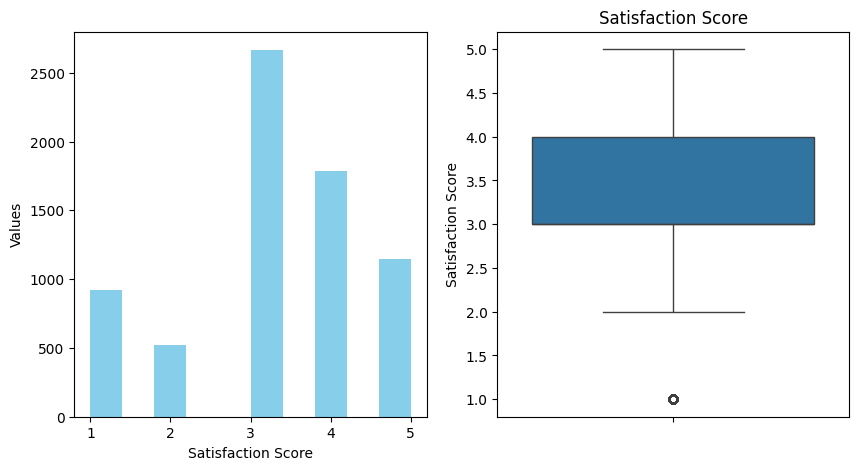

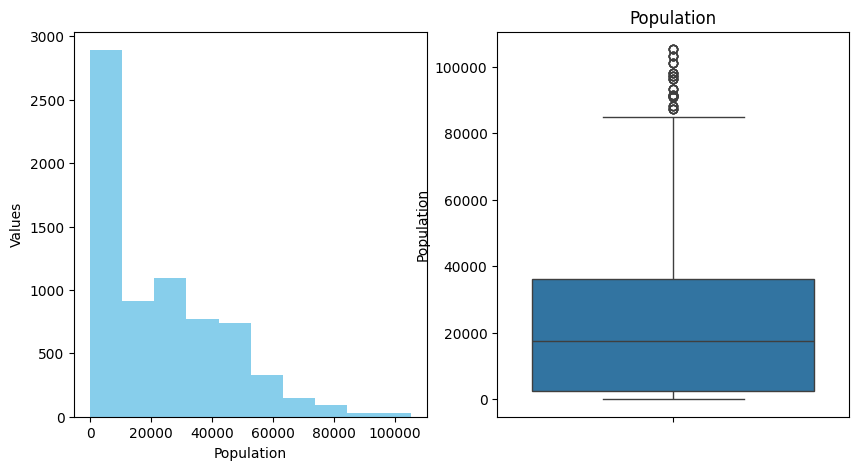

In [ ]:
#numerical features
for feature in numerical:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.hist(dataset[feature], color='skyblue')
  plt.xlabel(feature)
  plt.ylabel('Values')
  plt.subplot(1,2,2)
  sns.boxplot(dataset[feature])
  plt.title(feature)
  plt.show()

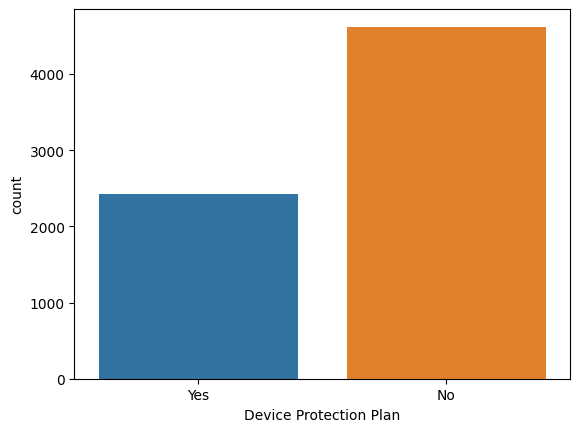

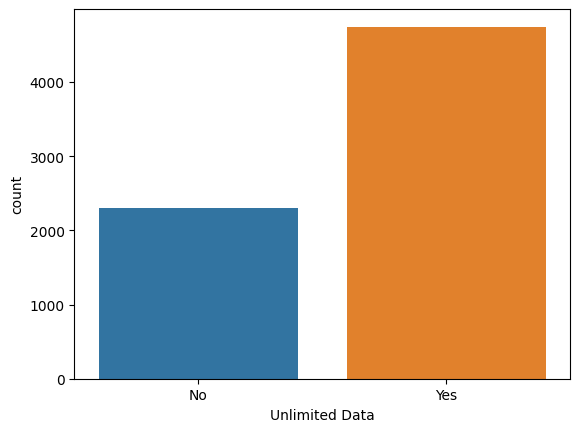

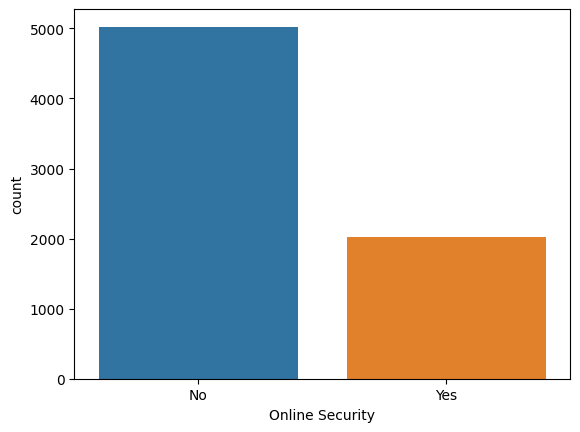

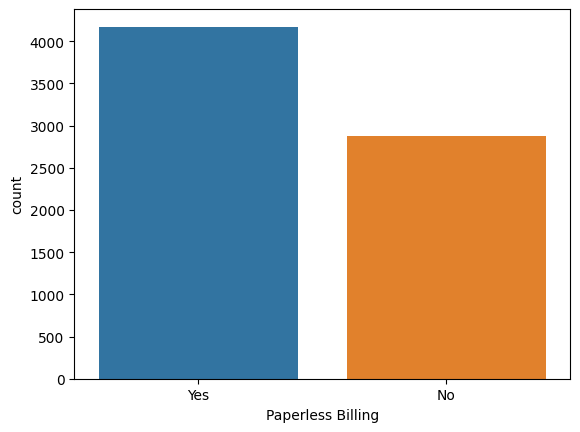

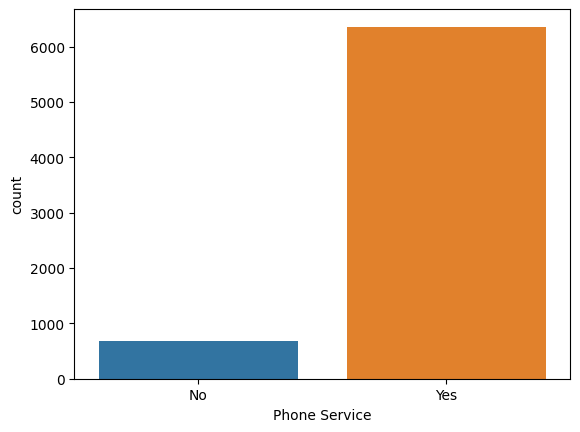

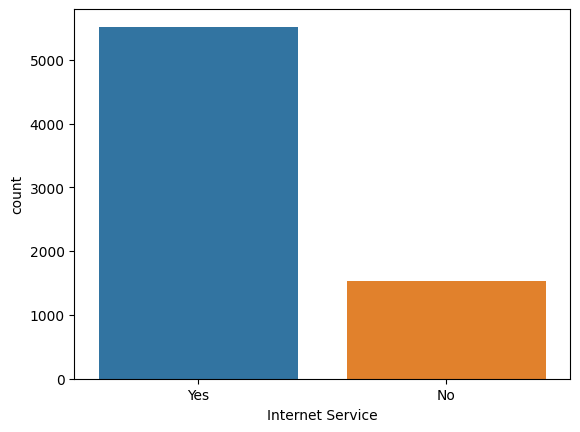

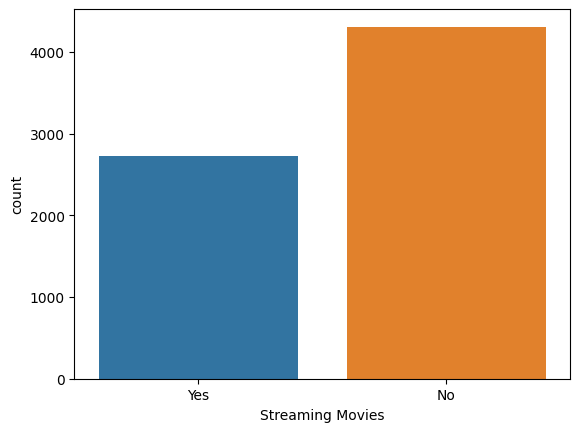

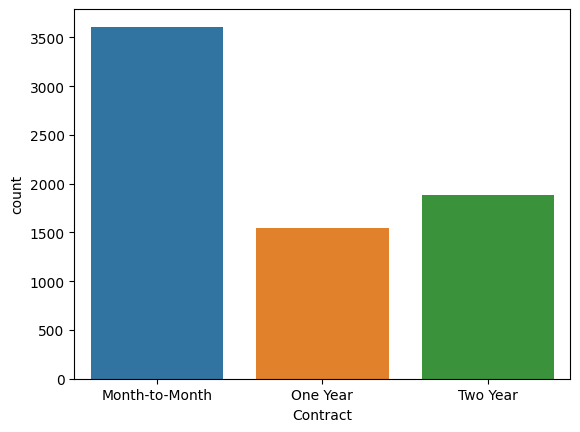

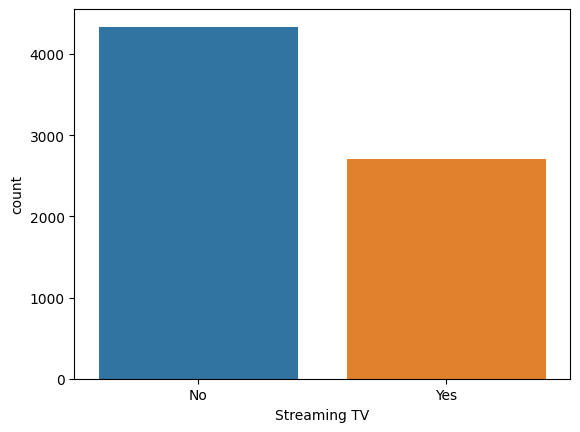

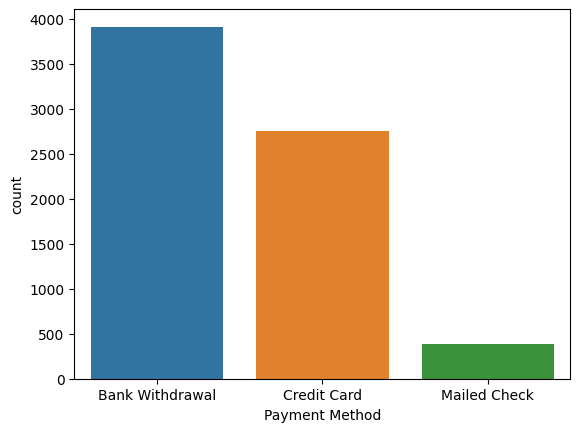

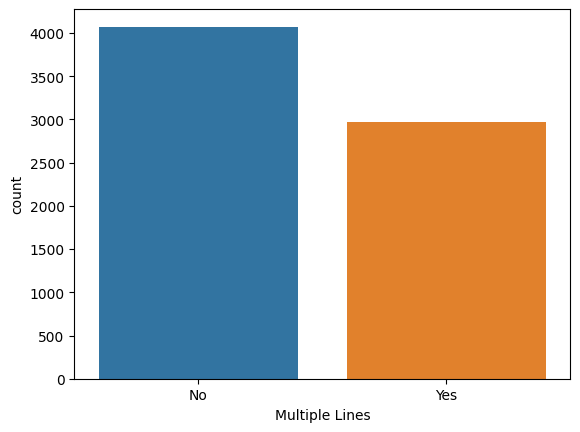

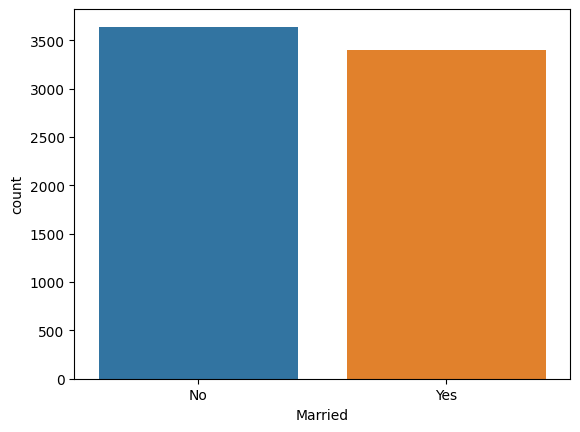

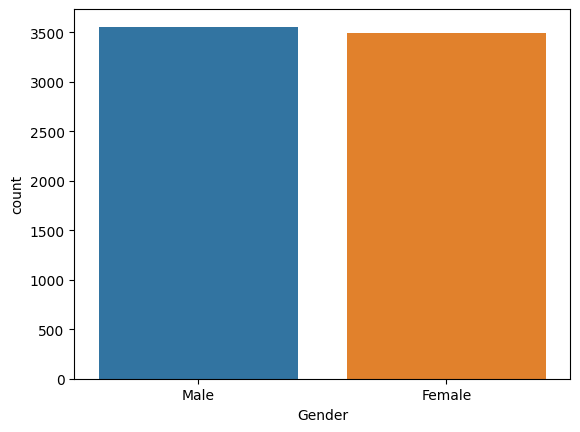

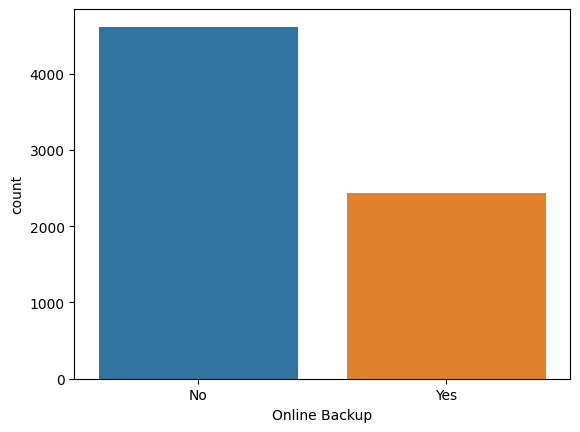

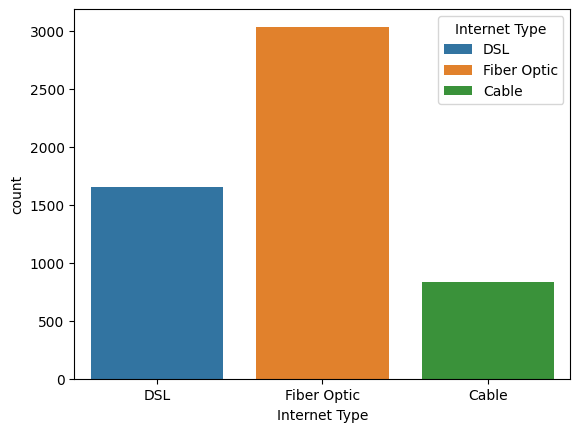

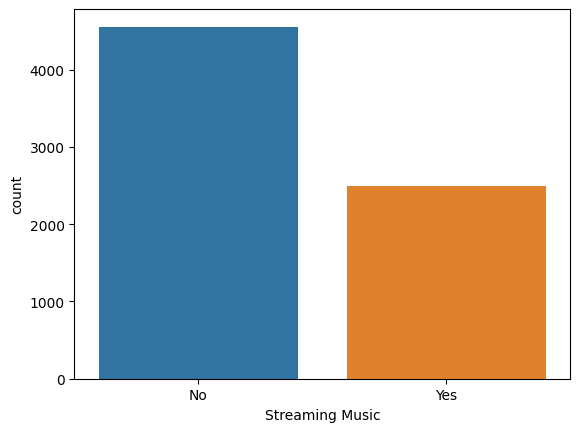

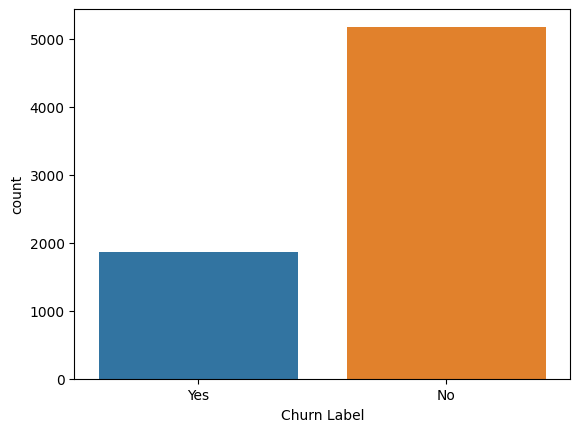

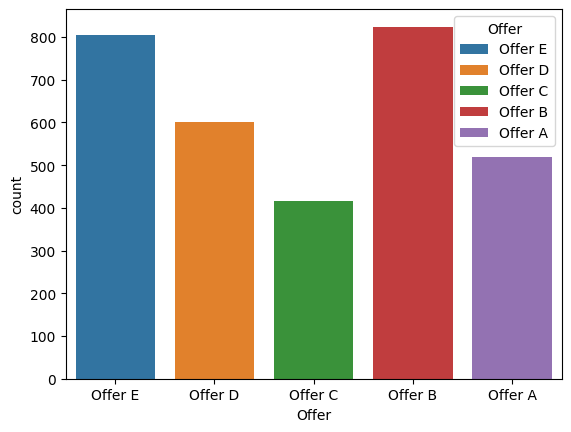

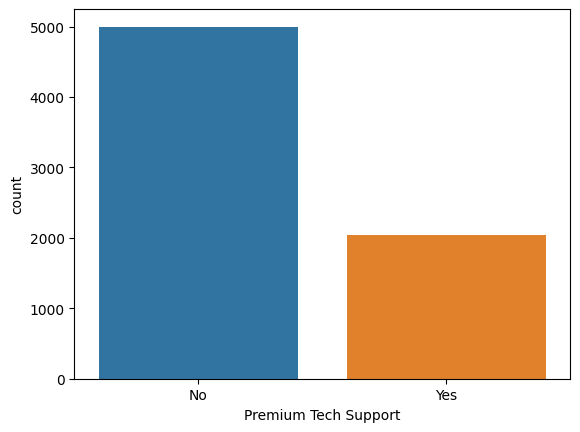

In [ ]:
#categorical features
for feature in categorical:
  #fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
  sns.countplot(data=dataset, x=feature, hue = feature)
  plt.show()

In [ ]:
#finto encoding delle labels per controllare che la correlazione funzioni
label = []
for x in dataset['Churn Label']:
  if x=='Yes':
    label.append(1)
  else:
    label.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Chunk Label                        7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Avg Monthly GB Download            7043 non-null   int64  
 5   Monthly Charge                     7043 non-null   float64
 6   Total Extra Data Charges           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  CLTV                               7043 non-null   int64  
 11  Total Revenue                      7043 non-null   float

<Axes: >

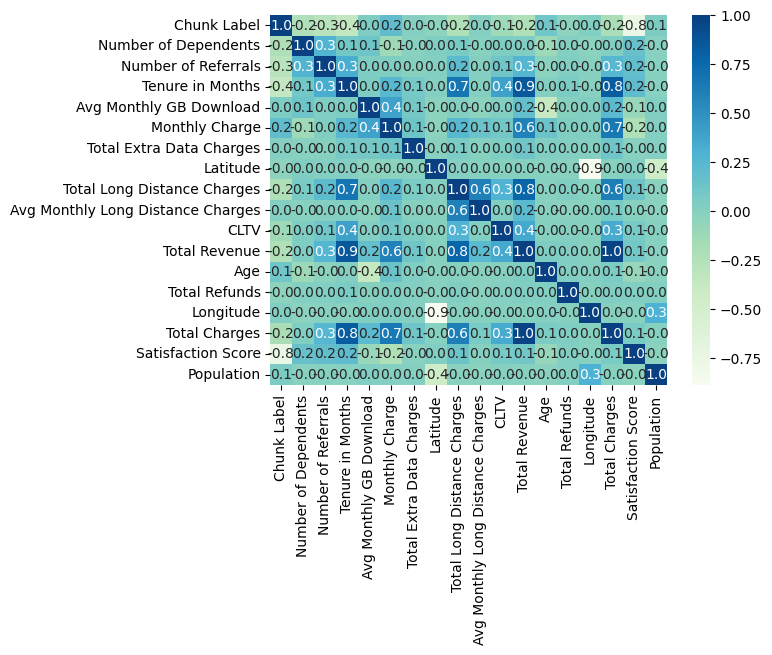

In [ ]:
dataset_num = dataset[numerical].copy()
dataset_num.insert(0,"Chunk Label",label)
dataset_num.info()
sns.heatmap(dataset_num.corr(),annot=True, fmt= '.1f',cmap = 'GnBu')

### Outlier Detection and Handling (ToDo)

1. Identify Outliers:
 * Use box plots or statistical measures (e.g., IQR) to detect outliers.
2. Handle Outliers:
 * Use techniques like capping or flooring extreme values within acceptable thresholds.
 * Alternatively, use robust models (e.g., tree-based models) that are less sensitive to outliers.

In [ ]:
# ToDo...

### Address Class Imbalance (ToDo)

* Resampling Techniques:
  * Oversampling : Use SMOTE ( imblearn.over_sampling.SMOTE ) to synthesize new samples for the minority class.
  * Undersampling : Randomly reduce samples from the majority class to balance the dataset.
* Alternative Methods:
  * Assign class weights during model training.
  * Focus on metrics like F1-score or ROC-AUC that account for imbalanced data.

In [ ]:
# Abbiamo un problema di classificazione binaria, secondo me usiamo AUC o  weighted_accuracy da sklearn.metrics e siamo a posto

### Type Conversion and Encoding

Now that we have a "good" and "clean" dataset, we can start to convert data types in order to have only numerical features to work with.

Since data exploration showed us that there are many categorical features, we decide to procede as follows:
* Categorical features with **2** distinct values will be encoded using **LabelEncoding** (i.e. two "boolean" values, 0 and 1);
* Categorical features with **3** or more distinct values will be encoded using **OneHotEncoding**;

Anyway, before doing so, we want to be sure that the categorical features have not any duplicated label.

In [ ]:
for col in dataset.select_dtypes(include='object').columns:
  print(f"\n\nColumn: {col} \nValues: {dataset[col].unique()}")



Column: Gender 
Values: ['Male' 'Female']


Column: Married 
Values: ['No' 'Yes']


Column: Offer 
Values: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


Column: Phone Service 
Values: ['No' 'Yes']


Column: Multiple Lines 
Values: ['No' 'Yes']


Column: Internet Service 
Values: ['Yes' 'No']


Column: Internet Type 
Values: ['DSL' 'Fiber Optic' 'Cable' nan]


Column: Online Security 
Values: ['No' 'Yes']


Column: Online Backup 
Values: ['No' 'Yes']


Column: Device Protection Plan 
Values: ['Yes' 'No']


Column: Premium Tech Support 
Values: ['No' 'Yes']


Column: Streaming TV 
Values: ['No' 'Yes']


Column: Streaming Movies 
Values: ['Yes' 'No']


Column: Streaming Music 
Values: ['No' 'Yes']


Column: Unlimited Data 
Values: ['No' 'Yes']


Column: Contract 
Values: ['Month-to-Month' 'One Year' 'Two Year']


Column: Paperless Billing 
Values: ['Yes' 'No']


Column: Payment Method 
Values: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']


Column: Churn Label 
Values: ['

Now that we are sure that all categories are unique, we can proceed with the encoding step.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
ohe = OneHotEncoder(sparse_output=False)
oe = OrdinalEncoder()
le = LabelEncoder()

In [ ]:
for col in dataset.select_dtypes(include='object').columns:
    if dataset[col].nunique() == 2:
        dataset[col] = oe.fit_transform(dataset[col].to_frame())
    else:
        tmp = ohe.fit_transform(dataset[col].to_frame())
        df_tmp = pd.DataFrame(tmp, columns=ohe.get_feature_names_out([col]))
        dataset = dataset.drop(columns=col)
        dataset = pd.concat([dataset, df_tmp], axis=1)

So, the dataset becomes:

In [ ]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   float64
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   float64
 3   Number of Dependents               7043 non-null   int64  
 4   Latitude                           7043 non-null   float64
 5   Longitude                          7043 non-null   float64
 6   Population                         7043 non-null   int64  
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Phone Service                      7043 non-null   float64
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Multiple Lines                     7043 non-null   float

Gender  Age  Married  Number of Dependents   Latitude   Longitude  \
0     1.0   78      0.0                     0  34.023810 -118.156582   
1     0.0   74      1.0                     1  34.044271 -118.185237   
2     1.0   71      0.0                     3  34.108833 -118.229715   
3     0.0   78      1.0                     1  33.936291 -118.332639   
4     0.0   80      1.0                     1  33.972119 -118.020188   

   Population  Number of Referrals  Tenure in Months  Phone Service  ...  \
0       68701                    0                 1            0.0  ...   
1       55668                    1                 8            1.0  ...   
2       47534                    0                18            1.0  ...   
3       27778                    1                25            1.0  ...   
4       26265                    1                37            1.0  ...   

   Internet Type_Cable  Internet Type_DSL  Internet Type_Fiber Optic  \
0                  0.0                1.0                        0.0   
1                  0.0                0.0                        1.0   
2                  0.0                0.0                        1.0   
3                  0.0                0.0                        1.0   
4                  0.0                0.0                        1.0   

   Internet Type_nan  Contract_Month-to-Month  Contract_One Year  \
0                0.0                      1.0                0.0   
1                0.0                      1.0                0.0   
2                0.0                      1.0                0.0   
3                0.0                      1.0                0.0   
4                0.0                      1.0                0.0   

   Contract_Two Year  Payment Method_Bank Withdrawal  \
0                0.0                             1.0   
1                0.0                             0.0   
2                0.0                             1.0   
3                0.0                             1.0   
4                0.0                             1.0   

   Payment Method_Credit Card  Payment Method_Mailed Check  
0                         0.0                          0.0  
1                         1.0                          0.0  
2                         0.0                          0.0  
3                         0.0                          0.0  
4                         0.0                          0.0  

[5 rows x 48 columns]

Notice that now all the entries are not-null and all the features are numerical.

In [ ]:
# ToDo...

IF NECESSARY, DROP OTHER FEATURES...

### Feature Transformation (ToDo)

*  Combine or split columns if they provide better insights (e.g., split TotalCharges into MonthlyCharge and NumberOfMonths if needed).
*  Create interaction features (e.g., tenure * MonthlyCharges ).

In [ ]:
# ToDo...



---

---

## Step 2: Data Splitting

Now that we have a well-built dataset, we statically split it in three chuncks, to retrieve training, validation and test data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.drop(columns=['Churn Label'])
y = dataset['Churn Label']

# 70% Train, 15% Validation, 15% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Validation features shape:", X_validation.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)
print("Validation target shape:", y_validation.shape)

Train features shape: (4930, 47)
Test features shape: (1056, 47)
Validation features shape: (1057, 47)
Train target shape: (4930,)
Test target shape: (1056,)
Validation target shape: (1057,)


### Data Scaling

Now that we have the final version of our dataset, we proceed with scaling it, in order to give all the features the same "weight".
Notice that we fit the StandardScaler on the Train dataset and use the same parameters to scale other subsets.

In [ ]:
# We print statistics BEFORE scaling (only for the Test dataset, just to be sure...)

X_train.describe()

Gender          Age      Married  Number of Dependents  \
count  4930.000000  4930.000000  4930.000000           4930.000000   
mean      0.511359    46.292292     0.481542              0.470994   
std       0.499922    16.708022     0.499710              0.971740   
min       0.000000    19.000000     0.000000              0.000000   
25%       0.000000    32.000000     0.000000              0.000000   
50%       1.000000    45.000000     0.000000              0.000000   
75%       1.000000    59.000000     1.000000              0.000000   
max       1.000000    80.000000     1.000000              9.000000   

          Latitude    Longitude     Population  Number of Referrals  \
count  4930.000000  4930.000000    4930.000000          4930.000000   
mean     36.219380  -119.779964   22179.379919             1.956795   
std       2.470580     2.138464   21304.118714             3.011299   
min      32.555828  -124.301372      11.000000             0.000000   
25%      33.992416  -121.785559    2355.000000             0.000000   
50%      36.296851  -119.680720   17015.000000             0.000000   
75%      38.200231  -118.006321   36301.000000             3.000000   
max      41.962127  -114.192901  105285.000000            11.000000   

       Tenure in Months  Phone Service  ...  Internet Type_Cable  \
count       4930.000000    4930.000000  ...          4930.000000   
mean          32.300609       0.908316  ...             0.114807   
std           24.528429       0.288608  ...             0.318822   
min            1.000000       0.000000  ...             0.000000   
25%            9.000000       1.000000  ...             0.000000   
50%           29.000000       1.000000  ...             0.000000   
75%           55.000000       1.000000  ...             0.000000   
max           72.000000       1.000000  ...             1.000000   

       Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_nan  \
count        4930.000000                4930.000000        4930.000000   
mean            0.232252                   0.433266           0.219675   
std             0.422311                   0.495577           0.414069   
min             0.000000                   0.000000           0.000000   
25%             0.000000                   0.000000           0.000000   
50%             0.000000                   0.000000           0.000000   
75%             0.000000                   1.000000           0.000000   
max             1.000000                   1.000000           1.000000   

       Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
count              4930.000000        4930.000000        4930.000000   
mean                  0.515213           0.217647           0.267140   
std                   0.499819           0.412688           0.442511   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           1.000000   
max                   1.000000           1.000000           1.000000   

       Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
count                     4930.000000                 4930.000000   
mean                         0.552333                    0.393306   
std                          0.497304                    0.488533   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          1.000000                    0.000000   
75%                          1.000000                    1.000000   
max                          1.000000                    1.000000   

       Payment Method_Mailed Check  
count                  4930.000000  
mean                      0.054361  
std                       0.226752  
min                       0.000000  
25%  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_np = scaler.fit_transform(X_train.values)
X_validation_np = scaler.transform(X_validation.values)
X_test_np = scaler.transform(X_test.values)

X_train = pd.DataFrame(X_train_np, index=X_train.index, columns=X_train.columns)
X_validation = pd.DataFrame(X_validation_np, index=X_validation.index, columns=X_validation.columns)
X_test = pd.DataFrame(X_test_np, index=X_test.index, columns=X_test.columns)

In [ ]:
# We print statistics AFTER scaling (only for the Test dataset, just to be sure...)

X_train.describe()

Gender           Age       Married  Number of Dependents  \
count  4.930000e+03  4.930000e+03  4.930000e+03          4.930000e+03   
mean  -1.776357e-16  1.441263e-17  1.513326e-17         -5.404737e-17   
std    1.000101e+00  1.000101e+00  1.000101e+00          1.000101e+00   
min   -1.022982e+00 -1.633650e+00 -9.637401e-01         -4.847403e-01   
25%   -1.022982e+00 -8.555017e-01 -9.637401e-01         -4.847403e-01   
50%    9.775342e-01 -7.735345e-02 -9.637401e-01         -4.847403e-01   
75%    9.775342e-01  7.606524e-01  1.037624e+00         -4.847403e-01   
max    9.775342e-01  2.017661e+00  1.037624e+00          8.777933e+00   

           Latitude     Longitude    Population  Number of Referrals  \
count  4.930000e+03  4.930000e+03  4.930000e+03         4.930000e+03   
mean   2.020651e-15  2.499150e-15 -6.341558e-17        -9.224084e-17   
std    1.000101e+00  1.000101e+00  1.000101e+00         1.000101e+00   
min   -1.483022e+00 -2.114539e+00 -1.040673e+00        -6.498834e-01   
25%   -9.014846e-01 -9.379622e-01 -9.306365e-01        -6.498834e-01   
50%    3.136070e-02  4.641362e-02 -2.424369e-01        -6.498834e-01   
75%    8.018572e-01  8.294844e-01  6.629259e-01         3.464653e-01   
max    2.324689e+00  2.612917e+00  3.901314e+00         3.003395e+00   

       Tenure in Months  Phone Service  ...  Internet Type_Cable  \
count      4.930000e+03   4.930000e+03  ...         4.930000e+03   
mean      -1.138598e-16   8.935832e-17  ...        -1.153011e-17   
std        1.000101e+00   1.000101e+00  ...         1.000101e+00   
min       -1.276225e+00  -3.147551e+00  ...        -3.601354e-01   
25%       -9.500393e-01   3.177073e-01  ...        -3.601354e-01   
50%       -1.345762e-01   3.177073e-01  ...        -3.601354e-01   
75%        9.255258e-01   3.177073e-01  ...        -3.601354e-01   
max        1.618669e+00   3.177073e-01  ...         2.776733e+00   

       Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_nan  \
count       4.930000e+03               4.930000e+03       4.930000e+03   
mean       -2.233958e-17               1.008884e-16      -2.882526e-18   
std         1.000101e+00               1.000101e+00       1.000101e+00   
min        -5.500090e-01              -8.743542e-01      -5.305828e-01   
25%        -5.500090e-01              -8.743542e-01      -5.305828e-01   
50%        -5.500090e-01              -8.743542e-01      -5.305828e-01   
75%        -5.500090e-01               1.143701e+00      -5.305828e-01   
max         1.818152e+00               1.143701e+00       1.884720e+00   

       Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
count             4.930000e+03       4.930000e+03       4.930000e+03   
mean              6.485684e-17       1.225074e-17       2.522211e-17   
std               1.000101e+00       1.000101e+00       1.000101e+00   
min              -1.030903e+00      -5.274424e-01      -6.037525e-01   
25%              -1.030903e+00      -5.274424e-01      -6.037525e-01   
50%               9.700231e-01      -5.274424e-01      -6.037525e-01   
75%               9.700231e-01      -5.274424e-01       1.656308e+00   
max               9.700231e-01       1.895942e+00       1.656308e+00   

       Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
count                    4.930000e+03                4.930000e+03   
mean                    -2.450147e-17               -1.297137e-17   
std                      1.000101e+00                1.000101e+00   
min                     -1.110766e+00               -8.051572e-01   
25%                     -1.110766e+00               -8.051572e-01   
50%                      9.002795e-01               -8.051572e-01   
75%                      9.002795e-01                1.241993e+00   
max                      9.002795e-01                1.241993e+00   

       Payment Method_Mailed Check  
count                 4.930000e+03  
mean                 -5.620926e-17  
std                   1.000101e+00  
min    

#### Pickling

In [ ]:
#import pickle
#filename = ""
#obj = None

# write in file

#with open(filename, 'wb') as f:
#  pickle.dump(obj, f)

# read a file

#with open(filename, 'rb') as f:
#  obj = pickle.load(f)

## Step 3: Model Engineering (ToDo)

Now that we have a ready-to-use dataset, we can start "using" it inside a Machine Learning System

### Baseline Model

USE LOGISTIC REGRESSION / DUMMY CLASSIFIER WITH DEFAULT PARAMETERS TO ESTIMATE A BASELINE

In [ ]:
# ToDo

### Model Selection

SEARCH AMONG MLTs -ALSO PERFORMING HPT, TO IDENTIFY THE BEST MODEL

In [ ]:
# ToDo

#### Pickling

In [ ]:
# ToDo

### Model Evaluation

EVALUATE THE MODEL USING SOME METRICS

In [ ]:
# ToDo

### Feature Importance

IDENTIFY THE MOST IMPORTANT FEATURES

In [ ]:
# ToDo

---
---




---
---

# BACKUP codice di Medvet

## Correlazione tra variabili

Da eseguire DOPO aver importato il dataset COMPLETO!

### HeatMap

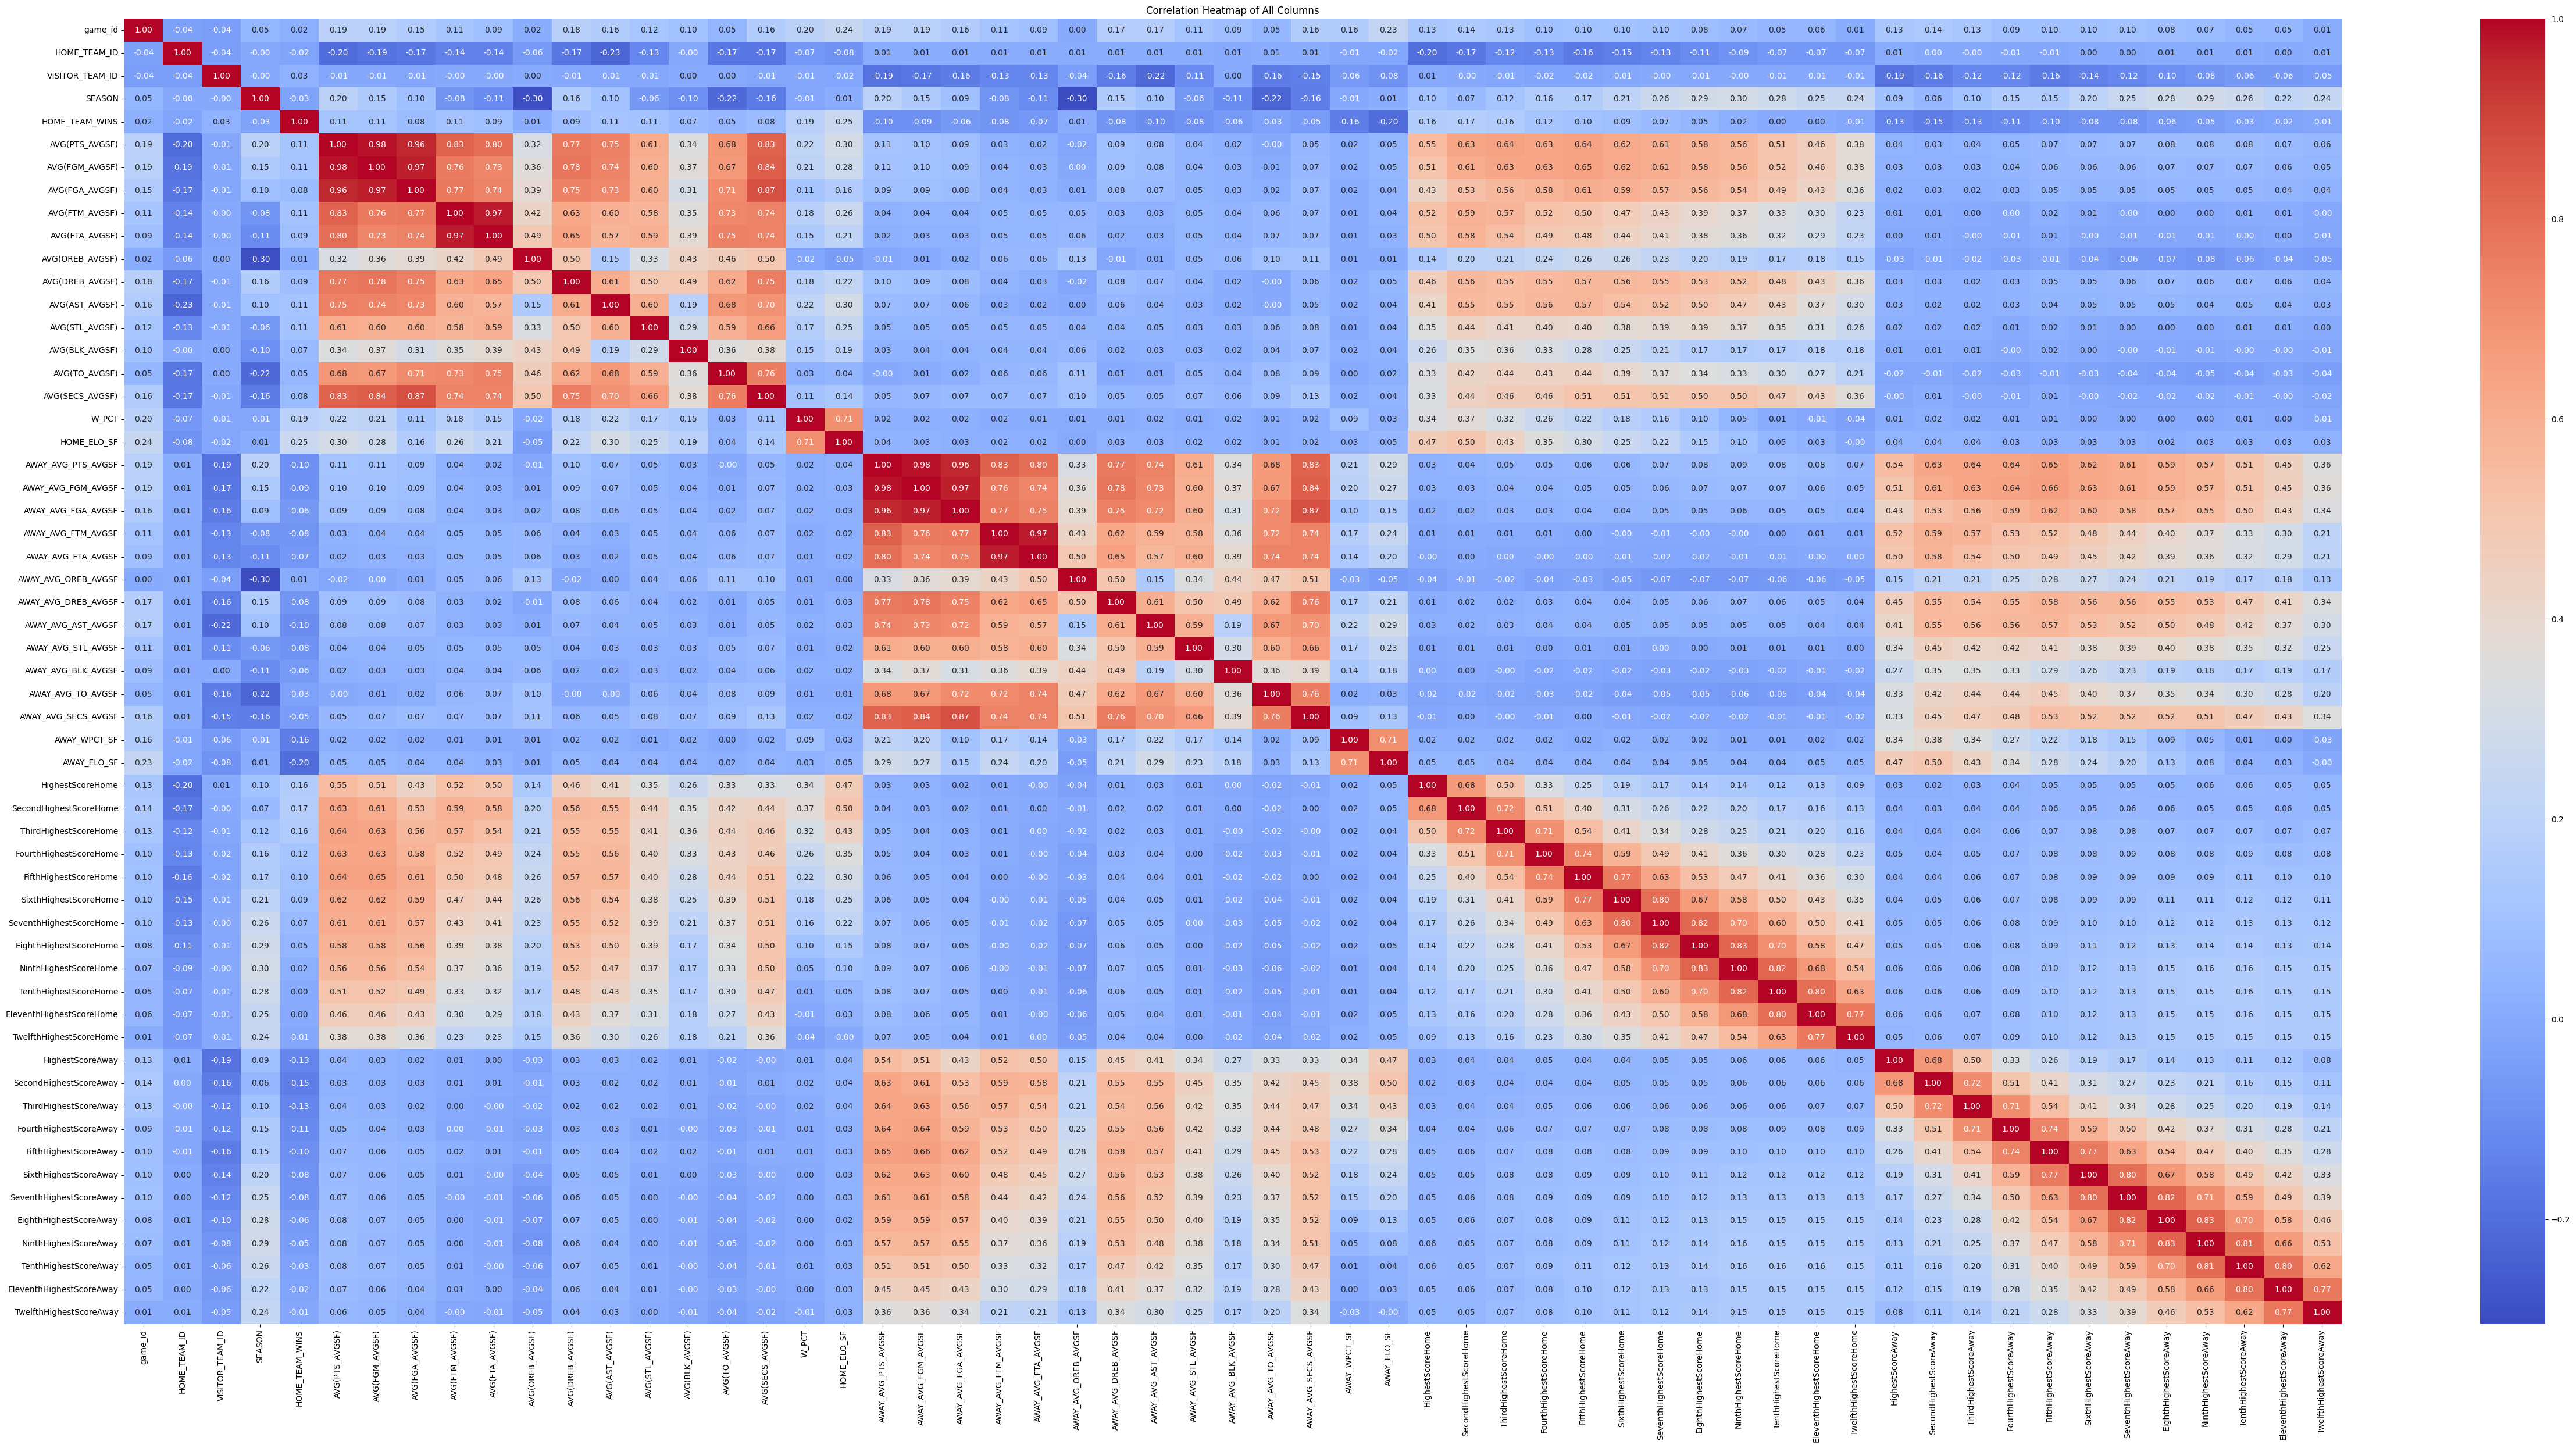

In [ ]:
correlation_matrix = class_data.corr()

# Plotting the heatmap for all columns
plt.figure(figsize=(50, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Columns')
plt.tight_layout()
plt.show()

Altrimenti, questa Heatmap è più piccolina e considera solo le colonne indicate!

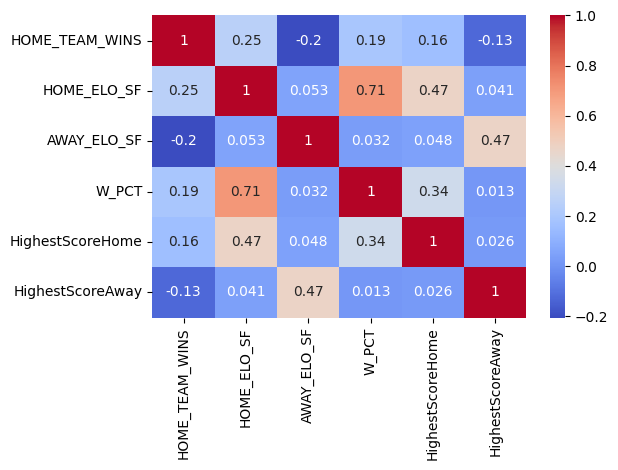

In [ ]:
sns.heatmap(class_data[['HOME_TEAM_WINS', 'HOME_ELO_SF', 'AWAY_ELO_SF', 'W_PCT', 'HighestScoreHome', 'HighestScoreAway']].corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

### Scatterplots

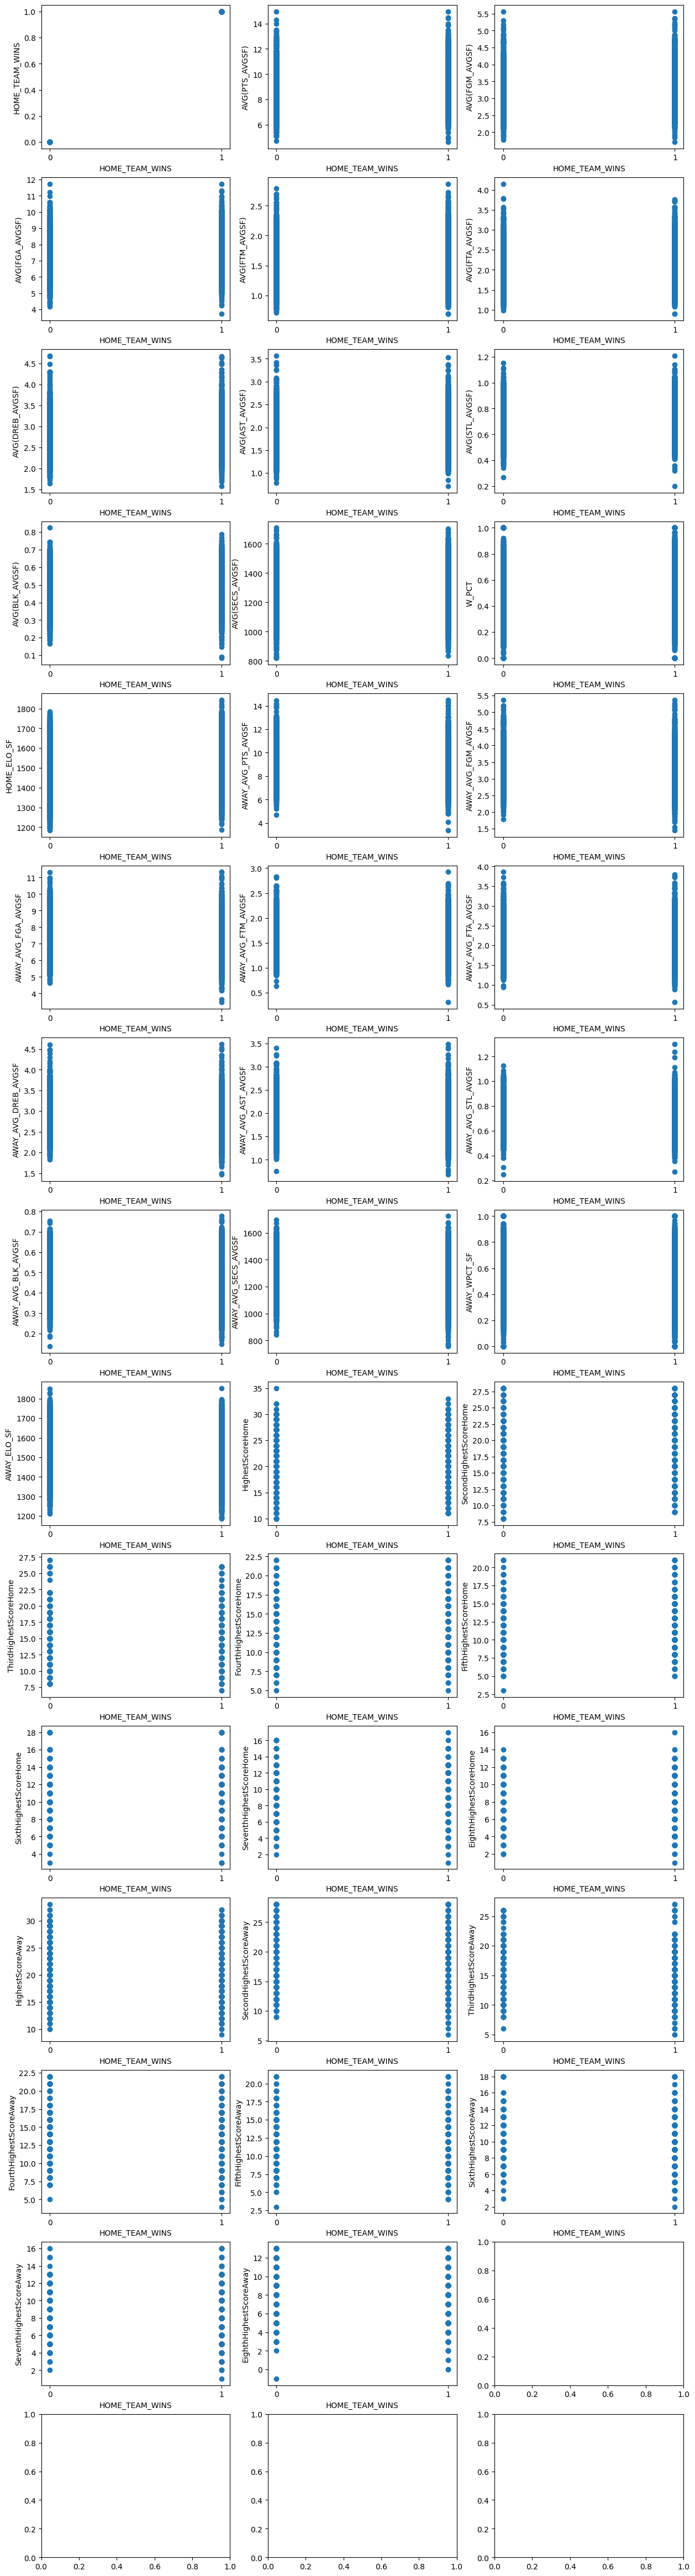

In [ ]:
h=0
v=0
hMAX=15
vMAX=3

figure, axis = plt.subplots(hMAX, vMAX, figsize=(15, 60))

for i, col in enumerate(class_data.columns):
    axis[h, v].scatter(y=class_data[col], x=class_data['HOME_TEAM_WINS'], )
    axis[h, v].set_ylabel(col)
    axis[h, v].set_xlabel('HOME_TEAM_WINS')
    axis[h, v].set_xticks(ticks=[0,1], labels=[0,1])

    v = v+1
    if(v >= vMAX) :
      v=0
      h = h+1

### Boxplots

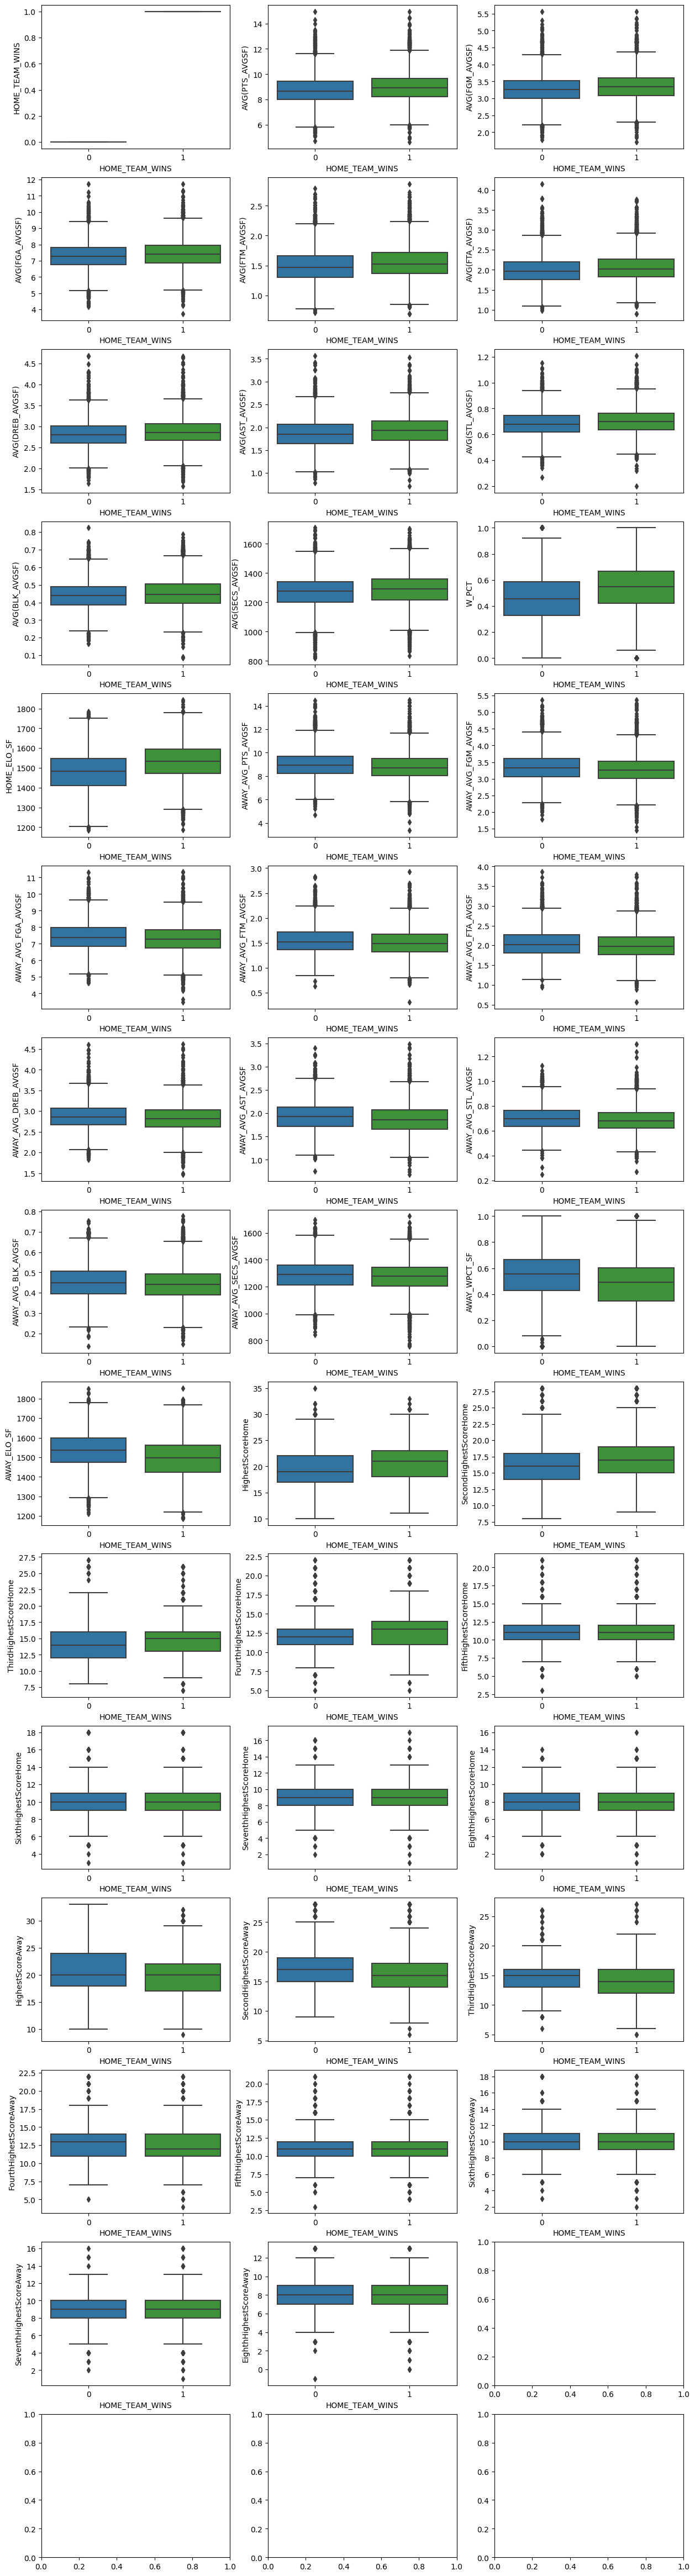

In [ ]:
h=0
v=0
hMAX=15
vMAX=3

figure, axis = plt.subplots(hMAX, vMAX, figsize=(15, 60))

for i, col in enumerate(class_data.columns):
    sns.boxplot(data=class_data, x="HOME_TEAM_WINS", y=col, ax=axis[h, v], palette=sns.color_palette('Paired')[1::2])
    axis[h, v].set_xlabel('HOME_TEAM_WINS')
    axis[h, v].set_ylabel(col)

    v = v+1
    if(v >= vMAX) :
      v=0
      h = h+1

### P-Test

P-Test per significatività Dtest/Dlearn (da eseguire dopo aver importato i due dataset separati e aver bonificato il dataset)

In [ ]:
for feature in dataLearn :
  res = ttest_ind(dataLearn[feature], dataTest[feature]).pvalue
  print(feature, ":", res)


HOME_TEAM_WINS : 0.0013397283529513495
home_elo_sf : 0.2344764695214048
away_elo_sf : 0.4309303565905418
HOME_FIRST : 2.338572698928745e-130
AWAY_FIRST : 9.259470507756452e-116
HOME_SECOND : 5.182571942731759e-62
AWAY_SECOND : 7.665984895398292e-57
HOME_THIRD : 5.652669438569041e-52
AWAY_THIRD : 1.1449819654468935e-42
HOME_FOURTH : 1.6395406063230703e-46
AWAY_FOURTH : 2.303497599737212e-38
HOME_FIFTH : 9.746466973566547e-95
AWAY_FIFTH : 4.063312220822416e-83
HOME_SIXTH : 3.312041959051905e-118
AWAY_SIXTH : 5.593899877011574e-109


## Binary Classification: Split Statico

## Import Learn/Test

Importa i due chunks del dataset

In [ ]:
urlLearn='https://drive.google.com/file/d/16eeo6MPiF4K3n0sQCaTBlzJrv7TvMloS/view?usp=sharing'
urlLearn='https://drive.google.com/uc?id=' + urlLearn.split('/')[-2]

urlTest='https://drive.google.com/file/d/1CfwXwTV6AJAkA-7tz1PEzWIRefNlvfHl/view?usp=sharing'
urlTest='https://drive.google.com/uc?id=' + urlTest.split('/')[-2]

dataLearn = pd.read_csv(urlLearn, encoding='latin-1')
dataTest = pd.read_csv(urlTest, encoding='latin-1')

In [ ]:
# ORDINA DATASETS PER STAGIONE

dataLearn.sort_values(by=['SEASON'], inplace=True)
dataTest.sort_values(by=['SEASON'], inplace=True)

I valori null vengono rimossi perchè creano problemi con le tecniche d'apprendimento.

In [ ]:
# Rimuovo 15 righe contenenti "troppi" valori null
dataLearn.dropna(subset=['AVG(PTS_AVGSF)'], inplace=True)
dataTest.dropna(subset=['AVG(PTS_AVGSF)'], inplace=True)

dataLearn.dropna(subset=['EighthHighestScoreHome'], inplace=True)
dataLearn.dropna(subset=['EighthHighestScoreAway'], inplace=True)
dataLearn.dropna(subset=['NinthHighestScoreHome'], inplace=True)
dataLearn.dropna(subset=['NinthHighestScoreAway'], inplace=True)
dataLearn.dropna(subset=['TenthHighestScoreHome'], inplace=True)
dataLearn.dropna(subset=['TenthHighestScoreAway'], inplace=True)
dataLearn.dropna(subset=['EleventhHighestScoreHome'], inplace=True)
dataLearn.dropna(subset=['EleventhHighestScoreAway'], inplace=True)

dataTest.dropna(subset=['EighthHighestScoreHome'], inplace=True)
dataTest.dropna(subset=['EighthHighestScoreAway'], inplace=True)
dataTest.dropna(subset=['NinthHighestScoreHome'], inplace=True)
dataTest.dropna(subset=['NinthHighestScoreAway'], inplace=True)
dataTest.dropna(subset=['TenthHighestScoreHome'], inplace=True)
dataTest.dropna(subset=['TenthHighestScoreAway'], inplace=True)
dataTest.dropna(subset=['EleventhHighestScoreHome'], inplace=True)
dataTest.dropna(subset=['EleventhHighestScoreAway'], inplace=True)

# Rimuovo colonne "12-th player": troppi valori nulli

dataLearn.drop(['TwelfthHighestScoreAway', 'TwelfthHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['TwelfthHighestScoreAway', 'TwelfthHighestScoreHome'], axis=1, inplace=True)

# Rimuovo colonna "GameID": non va usata!

    # Non presente in questa versione!

# Rimuovo colonne "HOME_TEAM_ID" e "VISITOR_TEAM_ID": l'accuratezza migliora!

dataLearn.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID'], axis=1, inplace=True)
dataTest.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID'], axis=1, inplace=True)

Vengono rimosse le colonne con correlazione <0.1 rispetto a HomeTeamWins per eliminare features "rumorose"

In [ ]:
dataLearn.drop(['SEASON'], axis=1, inplace=True)
dataLearn.drop(['AVG(FGA_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(FTA_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(OREB_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(DREB_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(BLK_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(TO_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AVG(SECS_AVGSF)'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_FGM_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_FGA_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_FTM_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_FTA_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_OREB_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_DREB_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_STL_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_BLK_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_TO_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['AWAY_AVG_SECS_AVGSF'], axis=1, inplace=True)
dataLearn.drop(['SixthHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['SeventhHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['EighthHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['NinthHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['TenthHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['EleventhHighestScoreHome'], axis=1, inplace=True)
dataLearn.drop(['SixthHighestScoreAway'], axis=1, inplace=True)
dataLearn.drop(['SeventhHighestScoreAway'], axis=1, inplace=True)
dataLearn.drop(['EighthHighestScoreAway'], axis=1, inplace=True)
dataLearn.drop(['NinthHighestScoreAway'], axis=1, inplace=True)
dataLearn.drop(['TenthHighestScoreAway'], axis=1, inplace=True)
dataLearn.drop(['EleventhHighestScoreAway'], axis=1, inplace=True)

dataTest.drop(['SEASON'], axis=1, inplace=True)
dataTest.drop(['AVG(FGA_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(FTA_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(OREB_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(DREB_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(BLK_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(TO_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AVG(SECS_AVGSF)'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_FGM_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_FGA_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_FTM_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_FTA_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_OREB_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_DREB_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_STL_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_BLK_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_TO_AVGSF'], axis=1, inplace=True)
dataTest.drop(['AWAY_AVG_SECS_AVGSF'], axis=1, inplace=True)
dataTest.drop(['SixthHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['SeventhHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['EighthHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['NinthHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['TenthHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['EleventhHighestScoreHome'], axis=1, inplace=True)
dataTest.drop(['SixthHighestScoreAway'], axis=1, inplace=True)
dataTest.drop(['SeventhHighestScoreAway'], axis=1, inplace=True)
dataTest.drop(['EighthHighestScoreAway'], axis=1, inplace=True)
dataTest.drop(['NinthHighestScoreAway'], axis=1, inplace=True)
dataTest.drop(['TenthHighestScoreAway'], axis=1, inplace=True)
dataTest.drop(['EleventhHighestScoreAway'], axis=1, inplace=True)

In [ ]:
print('INFORMAZIONI DATASET LEARN:\n')
dataLearn.info()

print('\n\n\nINFORMAZIONI DATASET TEST:\n')
dataTest.info()

INFORMAZIONI DATASET LEARN:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13268 entries, 1225 to 13410
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HOME_TEAM_WINS          13268 non-null  int64  
 1   AVG(PTS_AVGSF)          13268 non-null  float64
 2   AVG(FGM_AVGSF)          13268 non-null  float64
 3   AVG(FTM_AVGSF)          13268 non-null  float64
 4   AVG(AST_AVGSF)          13268 non-null  float64
 5   AVG(STL_AVGSF)          13268 non-null  float64
 6   W_PCT                   13268 non-null  float64
 7   HOME_ELO_SF             13268 non-null  float64
 8   AWAY_AVG_PTS_AVGSF      13268 non-null  float64
 9   AWAY_AVG_AST_AVGSF      13268 non-null  float64
 10  AWAY_WPCT_SF            13268 non-null  float64
 11  AWAY_ELO_SF             13268 non-null  float64
 12  HighestScoreHome        13268 non-null  float64
 13  SecondHighestScoreHome  13268 non-null  float64
 14  ThirdH

Stampiamo il numero di righe con valori null per ciascuna colonna, per riscontro

In [ ]:
print('Numero di osservazioni con valore null in una determinata colonna\n')

print("LEARN:\n")
print(dataLearn.isnull().sum())

print("\n\nTEST:\n")
print(dataTest.isnull().sum())

Numero di osservazioni con valore null in una determinata colonna

LEARN:

HOME_TEAM_WINS            0
AVG(PTS_AVGSF)            0
AVG(FGM_AVGSF)            0
AVG(FTM_AVGSF)            0
AVG(AST_AVGSF)            0
AVG(STL_AVGSF)            0
W_PCT                     0
HOME_ELO_SF               0
AWAY_AVG_PTS_AVGSF        0
AWAY_AVG_AST_AVGSF        0
AWAY_WPCT_SF              0
AWAY_ELO_SF               0
HighestScoreHome          0
SecondHighestScoreHome    0
ThirdHighestScoreHome     0
FourthHighestScoreHome    0
FifthHighestScoreHome     0
HighestScoreAway          0
SecondHighestScoreAway    0
ThirdHighestScoreAway     0
FourthHighestScoreAway    0
FifthHighestScoreAway     0
dtype: int64


TEST:

HOME_TEAM_WINS            0
AVG(PTS_AVGSF)            0
AVG(FGM_AVGSF)            0
AVG(FTM_AVGSF)            0
AVG(AST_AVGSF)            0
AVG(STL_AVGSF)            0
W_PCT                     0
HOME_ELO_SF               0
AWAY_AVG_PTS_AVGSF        0
AWAY_AVG_AST_AVGSF        0
AWAY_WP

In [ ]:
print("LEARN:\n")
print(dataLearn['HOME_TEAM_WINS'].value_counts())

print("\n\n\nTEST:\n")
print(dataTest['HOME_TEAM_WINS'].value_counts())

LEARN:

1    7683
0    5585
Name: HOME_TEAM_WINS, dtype: int64



TEST:

1    1082
0     838
Name: HOME_TEAM_WINS, dtype: int64




---



Con il codice seguente, si divide il dataset in osservazioni e risposte.

In [ ]:
x_class_learn = dataLearn.drop(['HOME_TEAM_WINS'], axis=1, inplace=False)
x_class_test = dataTest.drop(['HOME_TEAM_WINS'], axis=1, inplace=False)

y_class_learn = dataLearn['HOME_TEAM_WINS']
y_class_test = dataTest['HOME_TEAM_WINS']

## Import Dataset Aggiornato

In [ ]:
urlNewDataset = 'https://drive.google.com/file/d/1AJXRte6OYS5CG1vf87vzOzCPLcDG7vSr/view?usp=sharing'
urlNewDataset = 'https://drive.google.com/uc?id=' + urlNewDataset.split('/')[-2]

class_data = pd.read_csv(urlNewDataset, encoding='latin-1')

urlElo = 'https://drive.google.com/file/d/1LZHtyQxbrhM1ogGRqSg_pxvcxWWc4MUF/view?usp=sharing'
urlElo = 'https://drive.google.com/uc?id=' + urlElo.split('/')[-2]

class_elo = pd.read_csv(urlElo, encoding='latin-1')
class_elo.rename(columns={'game_id': 'GAME_ID'}, inplace=True)
class_elo = class_elo.drop_duplicates(subset='GAME_ID', keep='first')
class_data = class_data.drop_duplicates(subset='GAME_ID', keep='first')
class_data.dropna(subset=['GAME_ID'], inplace=True)
class_elo.dropna(subset=['GAME_ID'], inplace=True)
class_data = pd.merge(class_data, class_elo[['GAME_ID', 'home_elo_sf', 'away_elo_sf']], on='GAME_ID', how='left')

class_data.sort_values(by=['SEASON'], inplace=True)
columnsToRemove = ['GAME_ID', 'HOME_TEAM_ID', 'AWAY_TEAM_ID', 'HOME_NINTH', 'HOME_TENTH', 'HOME_ELEVENTH', 'HOME_TWELFTH',
                'AWAY_NINTH', 'AWAY_TENTH', 'AWAY_ELEVENTH', 'AWAY_TWELFTH', 'HOME_SEVENTH', 'AWAY_SEVENTH', 'HOME_EIGHTH', 'AWAY_EIGHTH']
columnsToCheck = ['HOME_FIRST', 'HOME_SECOND', 'HOME_THIRD', 'HOME_FOURTH', 'HOME_FIFTH', 'HOME_SIXTH',
                   'AWAY_FIRST', 'AWAY_SECOND', 'AWAY_THIRD', 'AWAY_FOURTH', 'AWAY_FIFTH', 'AWAY_SIXTH']

class_data.drop(columns=columnsToRemove, inplace=True)
class_data.dropna(subset=columnsToCheck, inplace=True)

#Rimuovo colonne con correlazione superiore a 0.75 in valore assoluto con altre colonne
#class_data = class_data.drop(['HOME_SECS', 'AWAY_SECS'], axis=1, inplace=False)
#class_data = class_data.drop(['AWAY_AST', 'HOME_AST'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_FGA', 'AWAY_FGA'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_FGM', 'AWAY_FGM'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_FTM', 'AWAY_FTM'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_FTA', 'AWAY_FTA'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_PTS', 'AWAY_PTS'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_OREB', 'AWAY_OREB'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_DREB', 'AWAY_DREB'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_STL', 'AWAY_STL'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_BLK', 'AWAY_BLK'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_TO', 'AWAY_TO'], axis=1, inplace=False)
#class_data = class_data.drop(['HOME_WPCT', 'AWAY_WPCT'], axis=1, inplace=False)
class_data = class_data[['SEASON', 'HOME_TEAM_WINS', 'home_elo_sf', 'away_elo_sf', 'HOME_WPCT', 'AWAY_WPCT', 'HOME_FIRST', 'AWAY_FIRST',
                         'HOME_SECOND', 'AWAY_SECOND', 'HOME_THIRD', 'AWAY_THIRD', 'HOME_FOURTH', 'AWAY_FOURTH', 'HOME_FIFTH', 'AWAY_FIFTH',
                         'HOME_SIXTH', 'AWAY_SIXTH']]

1    8845
0    6481
Name: HOME_TEAM_WINS, dtype: int64


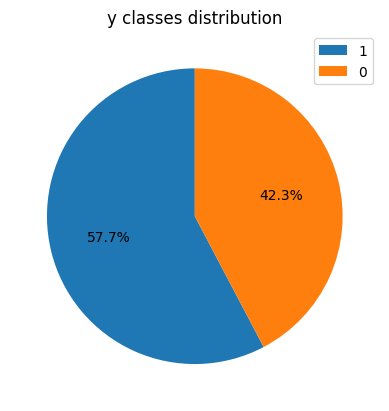

In [ ]:
count = class_data['HOME_TEAM_WINS'].value_counts()
print(count)

plt.pie(count, labels = count.index, shadow = False, startangle=90, autopct='%1.1f%%', labeldistance=None)
plt.title('y classes distribution')
plt.legend()

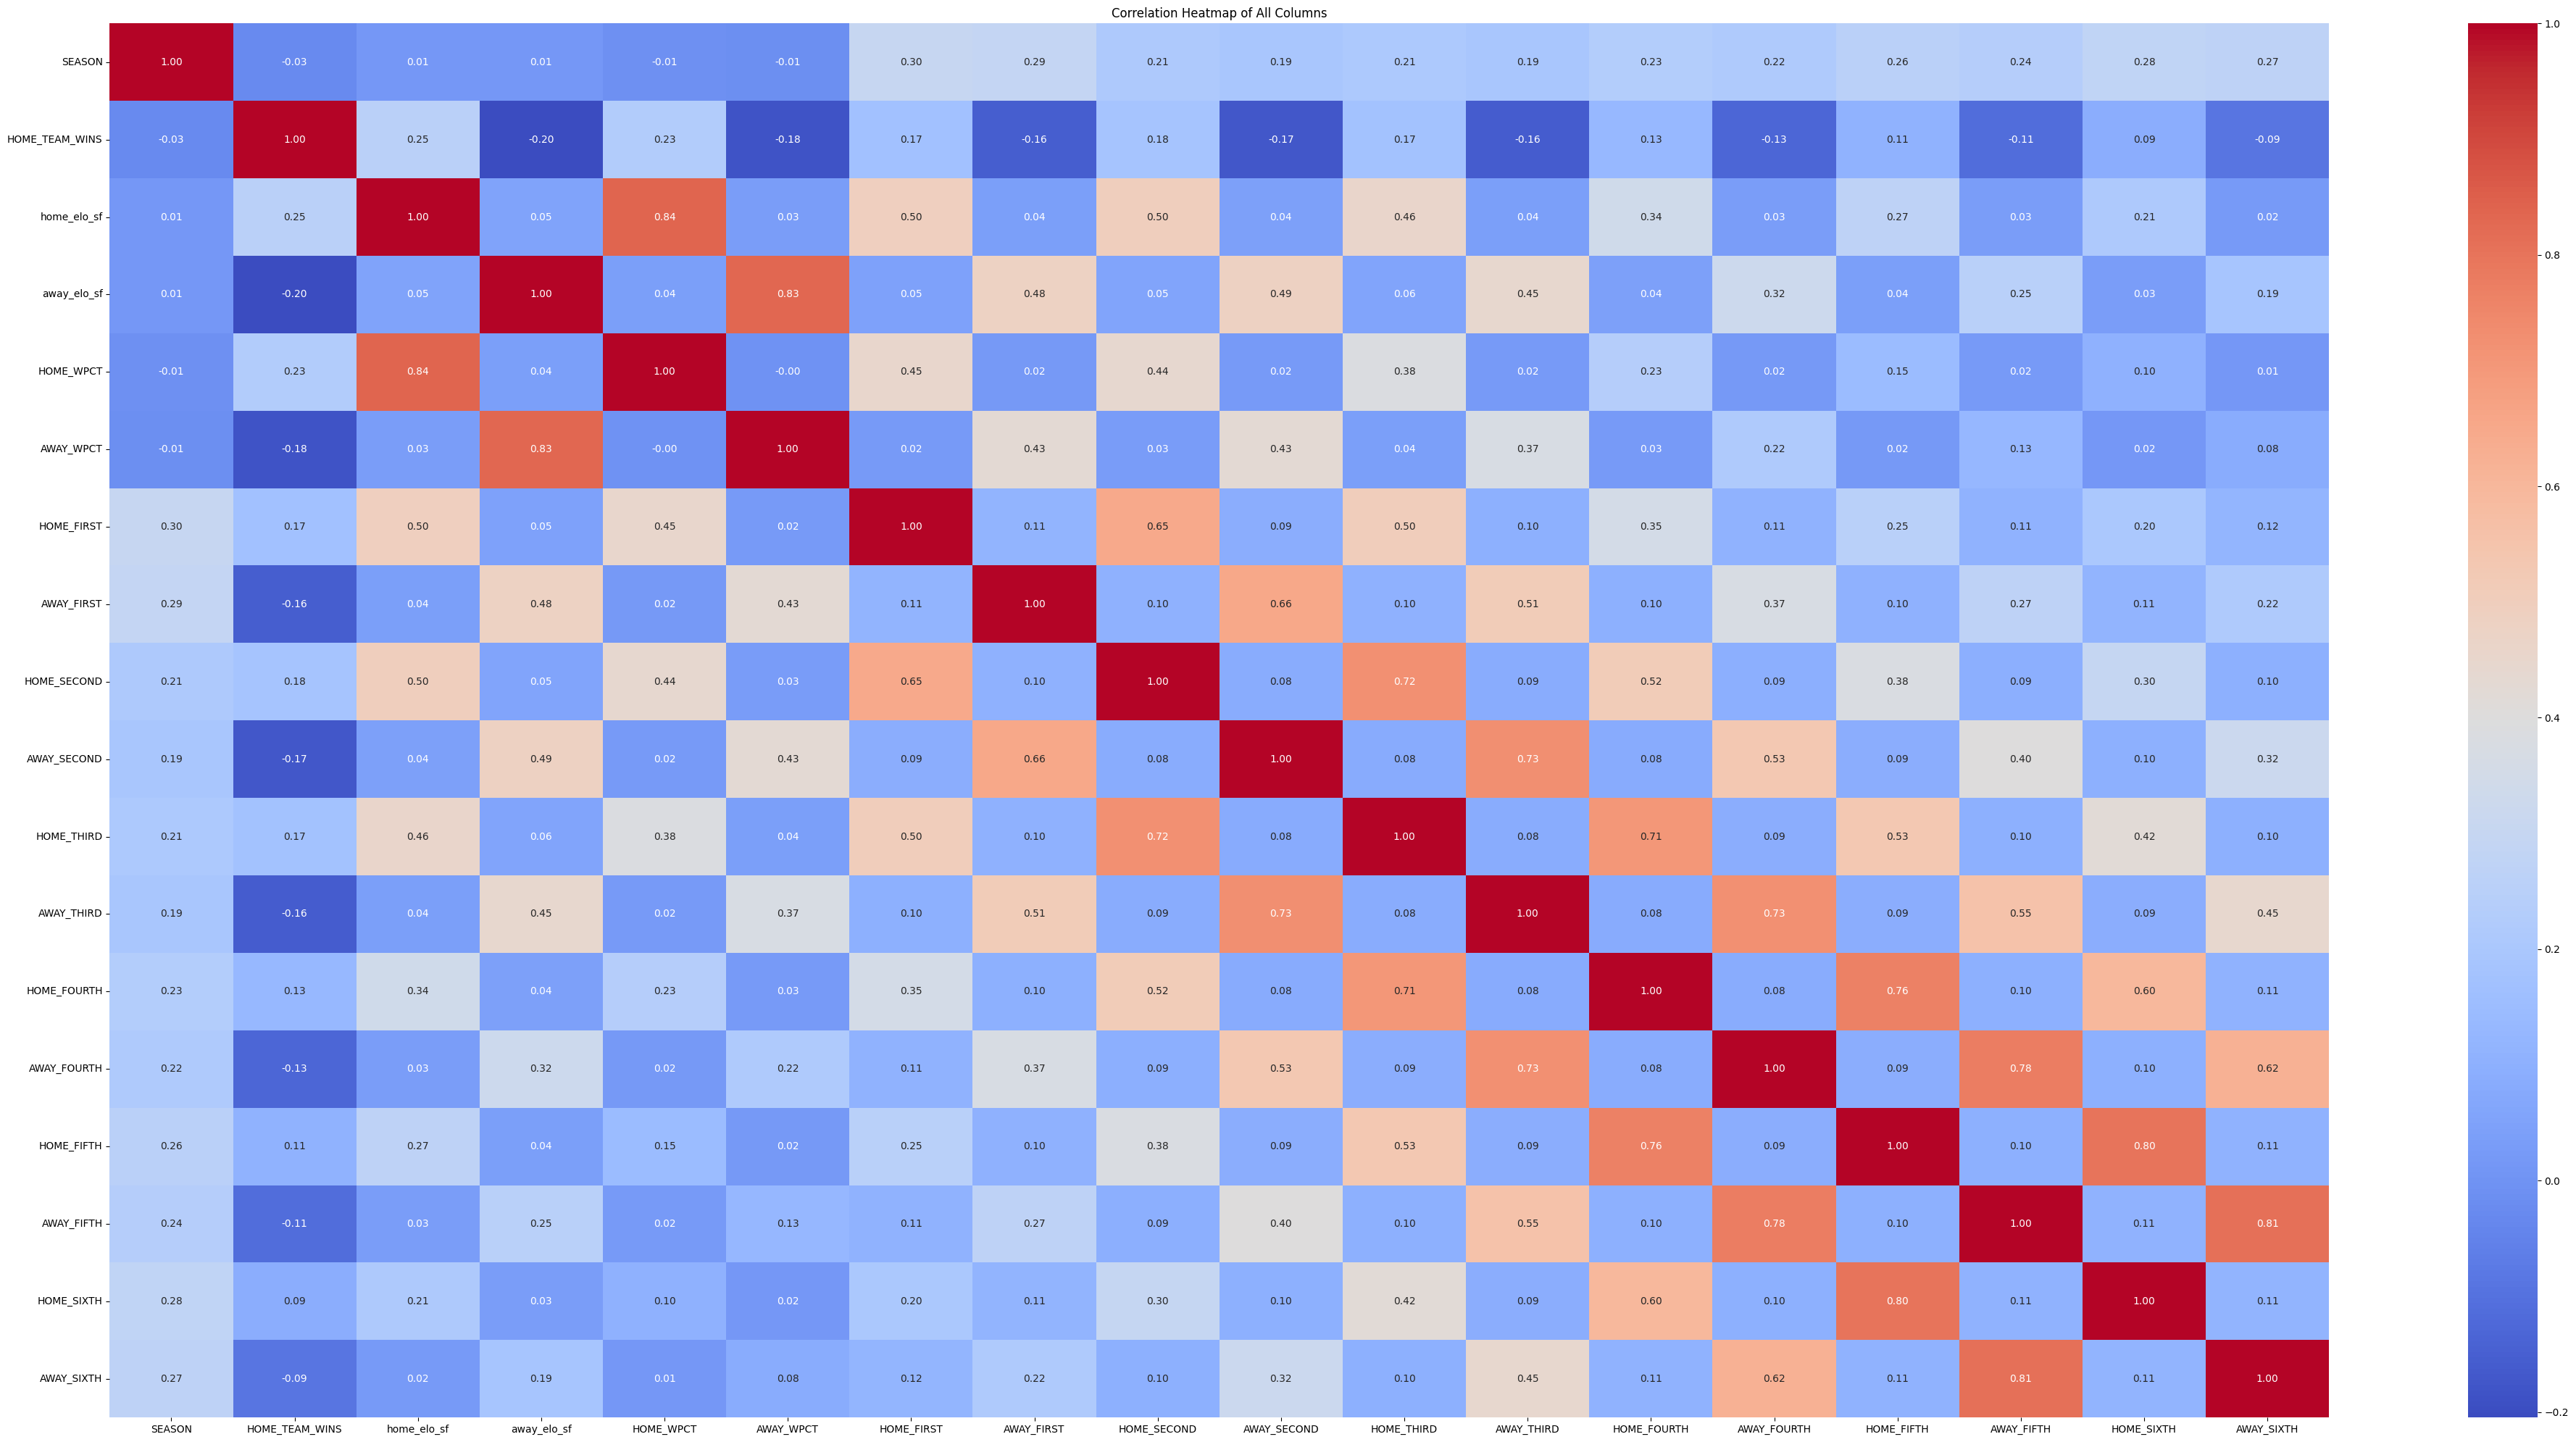

In [ ]:
correlation_matrix = class_data.corr()

# Plotting the heatmap for all columns
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Columns')
plt.tight_layout()
plt.show()

In [ ]:
dataTest = class_data[(class_data['SEASON'] == 2020) | (class_data['SEASON'] == 2021)]
dataLearn = class_data[(class_data['SEASON'] != 2020) & (class_data['SEASON'] != 2021)]
dataLearn.sort_values(by=['SEASON'], inplace=True)
dataTest.sort_values(by=['SEASON'], inplace=True)
dataLearn.drop(['SEASON'], axis=1, inplace=True)
dataTest.drop(['SEASON'], axis=1, inplace=True)
class_data.info()
dataLearn.info()
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15326 entries, 1308 to 14142
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEASON          15326 non-null  int64  
 1   HOME_TEAM_WINS  15326 non-null  int64  
 2   home_elo_sf     15326 non-null  float64
 3   away_elo_sf     15326 non-null  float64
 4   HOME_WPCT       15326 non-null  float64
 5   AWAY_WPCT       15326 non-null  float64
 6   HOME_FIRST      15326 non-null  float64
 7   AWAY_FIRST      15326 non-null  float64
 8   HOME_SECOND     15326 non-null  float64
 9   AWAY_SECOND     15326 non-null  float64
 10  HOME_THIRD      15326 non-null  float64
 11  AWAY_THIRD      15326 non-null  float64
 12  HOME_FOURTH     15326 non-null  float64
 13  AWAY_FOURTH     15326 non-null  float64
 14  HOME_FIFTH      15326 non-null  float64
 15  AWAY_FIFTH      15326 non-null  float64
 16  HOME_SIXTH      15326 non-null  float64
 17  AWAY_SIXTH      15326 non-nu

<ipython-input-4-9222066b2828>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLearn.sort_values(by=['SEASON'], inplace=True)
<ipython-input-4-9222066b2828>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTest.sort_values(by=['SEASON'], inplace=True)
<ipython-input-4-9222066b2828>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLearn.drop(['SEASON'], axis=1, inplace=True)
<ipython-input-4-9222066b2828>:6: SettingWithCopy

In [ ]:
print(dataLearn['HOME_TEAM_WINS'].value_counts())
print(dataTest['HOME_TEAM_WINS'].value_counts())

x_class_learn = dataLearn.drop(['HOME_TEAM_WINS'], axis=1, inplace=False)
x_class_test = dataTest.drop(['HOME_TEAM_WINS'], axis=1, inplace=False)

y_class_learn = dataLearn['HOME_TEAM_WINS']
y_class_test = dataTest['HOME_TEAM_WINS']

1    7413
0    5304
Name: HOME_TEAM_WINS, dtype: int64
1    1432
0    1177
Name: HOME_TEAM_WINS, dtype: int64


## MLTs

Il seguente codice predisponde le strutture dati per i grafici finali

In [ ]:
models, precisions, recalls, TPRs, TNRs, FPRs, FNRs, ROCs, AUCs, accuracies, EERs = [[] for _ in range(11)]
#Strutture dati per dev.std. (introdotte per la RF)
precisions_std, recalls_std, TPRs_std, TNRs_std, FPRs_std, FNRs_std, ROCs_std, AUCs_std, accuracies_std, EERs_std = [[] for _ in range(10)]

efficiency_learn = pd.DataFrame(columns=['Model', 'Time'])
efficiency_test = pd.DataFrame(columns=['Model', 'Time'])

Il codice di seguito determina gli indici di un insieme di validazione dei dati per l'HPT

In [ ]:
x_class_learn_l, x_class_learn_t, y_class_learn_l, y_class_learn_t = train_test_split(x_class_learn, y_class_learn, test_size=0.2, shuffle=False)

split_index = [-1]*len(x_class_learn_l) + [0]*len(x_class_learn_t)
pds = PredefinedSplit(test_fold = split_index)

### Dummy Classifier

Accuracy: 0.5488692985818321
True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 1.0
True Negative Rate (TNR): 0.0
False Negative Rate (FNR): 0.0
Precision: 0.5488692985818321
Recall: 1.0
AUC: 0.5
EER 0.0
	EER Threshold 2.0


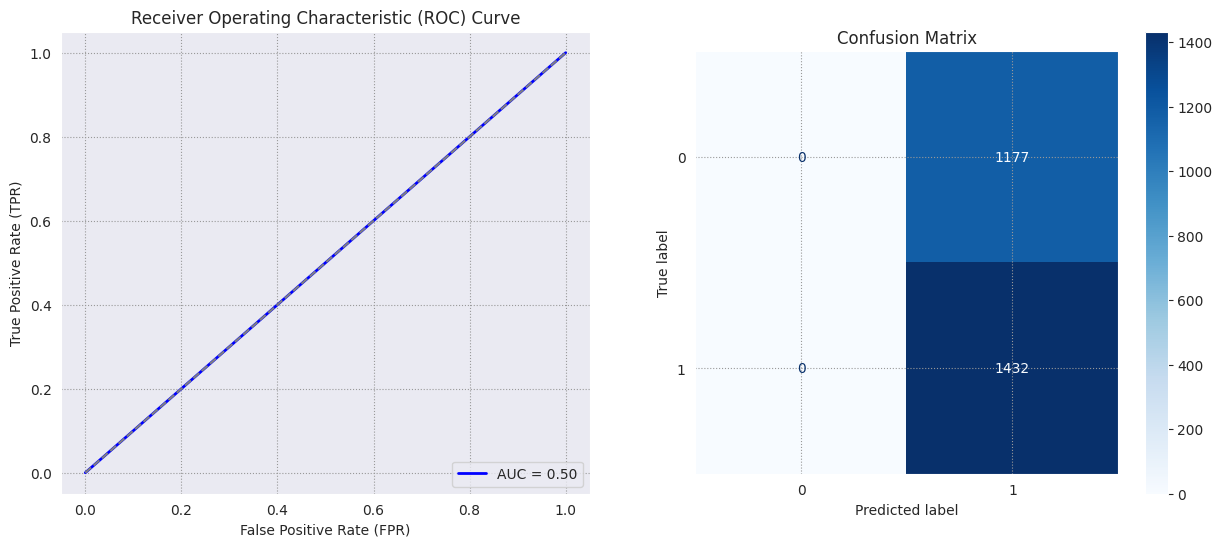

In [ ]:
models.append('Dummy')

dummy_classifier = Pipeline(steps=[('scaler', StandardScaler()), ('dummy_classifier', DummyClassifier(strategy='most_frequent'))])

#Learn
for x in range(5):
  start = datetime.now()
  dummy_classifier.fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['Dummy', (end-start).seconds + (end-start).microseconds/1000000]

#Predict
for x in range(5):
  start = datetime.now()
  y_pred = dummy_classifier.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['Dummy', (end-start).seconds + (end-start).microseconds/1000000]

y_probs = dummy_classifier.predict_proba(x_class_test)[:,1]

# Calculate Accuracy
accuracy = accuracy_score(y_class_test, y_pred)
accuracies.append(accuracy)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate True Positive Rate (TPR), False Positive Rate (FPR),
# True Negative Rate (TNR), and False Negative Rate (FNR)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
TPRs.append(tpr)
FPRs.append(fpr)
TNRs.append(tnr)
FNRs.append(fnr)

# Display the metrics
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("True Negative Rate (TNR):", tnr)
print("False Negative Rate (FNR):", fnr)

# Calculate Precision and Recall
precision = precision_score(y_class_test, y_pred)
precisions.append(precision)
recall = recall_score(y_class_test, y_pred)
recalls.append(recall)
print("Precision:", precision)
print("Recall:", recall)

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
ROCs.append([fprs,tprs])
roc_auc = auc(fprs, tprs)
AUCs.append(roc_auc)
print("AUC:", roc_auc)

#Calculate EER
fnrs = 1 - tprs
eer_threshold = thresholds[np.nanargmin(np.absolute((fnrs - fprs)))]
eer = fprs[np.nanargmin(np.absolute((fnrs - fprs)))]
EERs.append(eer)
print("EER", eer)
print("\tEER Threshold", eer_threshold)

# STD are 0 for this MLT
precisions_std.append(0)
recalls_std.append(0)
TPRs_std.append(0)
TNRs_std.append(0)
FPRs_std.append(0)
FNRs_std.append(0)
ROCs_std.append(0)
AUCs_std.append(0)
accuracies_std.append(0)
EERs_std.append(0)

# Plot ROC curve & Confusion Matrix

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[1], normalize=None, colorbar=True)
axs[1].set_title('Confusion Matrix')

axs[0].plot(fprs, tprs, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlabel('False Positive Rate (FPR)')
axs[0].set_ylabel('True Positive Rate (TPR)')
axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0].legend(loc='lower right')

plt.show()


### Random Forest (SINGOLO)

**Hyperparameter tuning (Grid Search)**

*Ci mette una ventina di minuti...*

In [ ]:
rf = RandomForestClassifier(random_state = 50)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    #'criterion': ['gini', 'entropy']
}

# Perform Grid Search to find the best parameters
# It performs CV ONLY on the learning set for hyperparameter tuning, using the test set in this phase would be cheating
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_class_learn, y_class_learn)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Time for efficiency
for x in range(5):
  start = datetime.now()
  RandomForestClassifier(max_features=best_params['max_features'], n_estimators=best_params['n_estimators']).fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['RF', (end-start).seconds + (end-start).microseconds/1000000]

# Use the best model for prediction
best_model_rf = grid_search.best_estimator_

Best Parameters: {'max_features': 'log2', 'n_estimators': 750}
Best Score: 0.6901091258836907


**PLOT Diagramma HPT**

In [ ]:
# GRAFICO - lavori in corso!

**Prediction phase**

Accuracy: 0.6432291666666666
True Positive Rate (TPR): 0.7698706099815157
False Positive Rate (FPR): 0.5202863961813843
True Negative Rate (TNR): 0.4797136038186158
False Negative Rate (FNR): 0.2301293900184843
Precision: 0.6564223798266351
Recall: 0.7698706099815157
AUC: 0.667827081467626


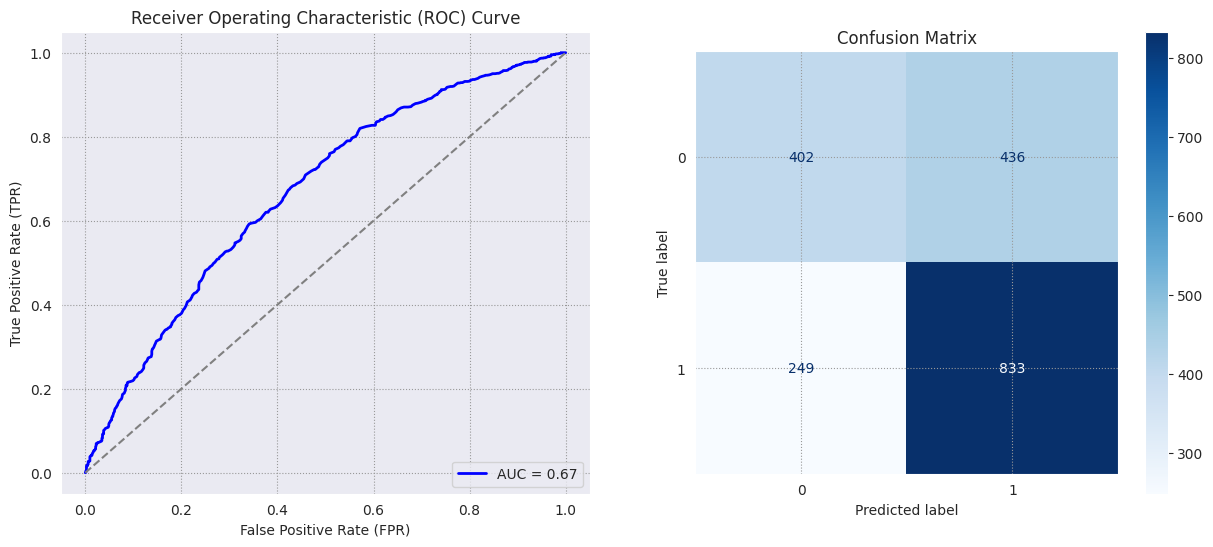

In [ ]:
models.append('RF')

#Predict
for x in range(5):
  start = datetime.now()
  y_pred = best_model_rf.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['RF', (end-start).seconds + (end-start).microseconds/1000000]

y_probs = best_model_rf.predict_proba(x_class_test)[:,1]

# Calculate Accuracy
accuracy = accuracy_score(y_class_test, y_pred)
accuracies.append(accuracy)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate True Positive Rate (TPR), False Positive Rate (FPR),
# True Negative Rate (TNR), and False Negative Rate (FNR)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
TPRs.append(tpr)
FPRs.append(fpr)
TNRs.append(tnr)
FNRs.append(fnr)

# Display the metrics
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("True Negative Rate (TNR):", tnr)
print("False Negative Rate (FNR):", fnr)

# Calculate Precision and Recall
precision = precision_score(y_class_test, y_pred)
precisions.append(precision)
recall = recall_score(y_class_test, y_pred)
recalls.append(recall)
print("Precision:", precision)
print("Recall:", recall)

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fpr, tpr, thresholds = roc_curve(y_class_test, y_probs)
ROCs.append([fpr,tpr])
roc_auc = auc(fpr, tpr)
AUCs.append(roc_auc)
print("AUC:", roc_auc)

#Calculate EER
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EERs.append(eer)
print("EER", eer)
print("EER Threshold", eer_threshold)

# Plot ROC curve & Confusion Matrix

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[1], normalize=None, colorbar=True)
axs[1].set_title('Confusion Matrix')

axs[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlabel('False Positive Rate (FPR)')
axs[0].set_ylabel('True Positive Rate (TPR)')
axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0].legend(loc='lower right')

plt.show()

### Random Forest (NEW)

Il codice apprende 5 modelli distinti per la RF, in virtù della non-deterministicità della stessa, e valorizza media e varianza.

*Ci metterà TANTI minuti...*


 ITERATION: 0 

Best Parameters: {'rf__max_features': 'log2', 'rf__n_estimators': 750}
Best Score: 0.670090706017735
AUC: 0.6851083737178605
EER 0.3653355989804588
	EER Threshold 0.5786666666666667
	BEST TAU:  0.532
	TPR @ tau_best:  0.5284621920135939
	FPR @ tau_best:  0.24860335195530725
	TNR @ tau_best:  0.7513966480446927
	FNR @ tau_best:  0.4715378079864061
	Accuracy @ tau_best:  0.6508240705251054
	Precision @ tau_best: 0.6359918200408998
	Recall @tau_best: 0.5284621920135939


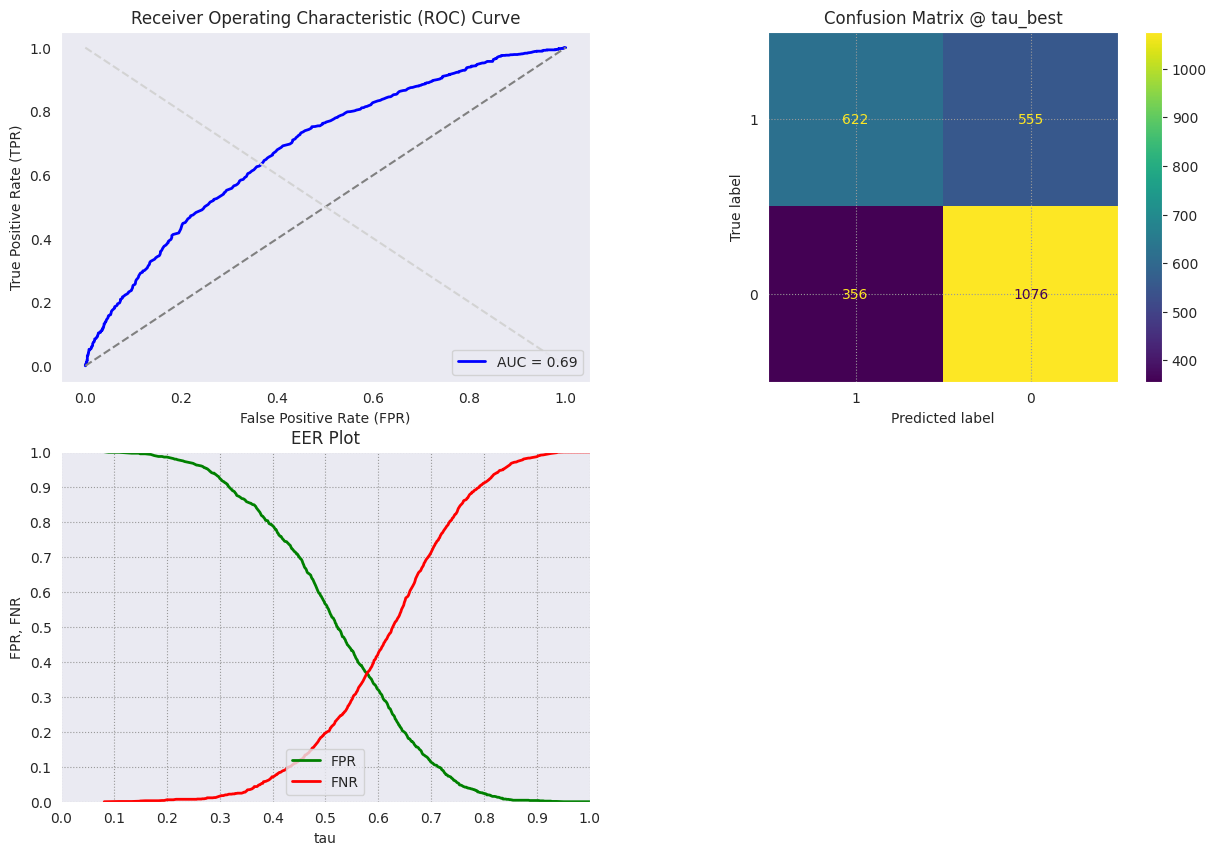


 ITERATION: 1 

Best Parameters: {'rf__max_features': 'log2', 'rf__n_estimators': 1000}
Best Score: 0.668216666541313
AUC: 0.6864445043026727
EER 0.3653355989804588
	EER Threshold 0.58
	BEST TAU:  0.551
	TPR @ tau_best:  0.5768903993203058
	FPR @ tau_best:  0.2918994413407821
	TNR @ tau_best:  0.7081005586592178
	FNR @ tau_best:  0.42310960067969416
	Accuracy @ tau_best:  0.648907627443465
	Precision @ tau_best: 0.6189608021877848
	Recall @tau_best: 0.5768903993203058


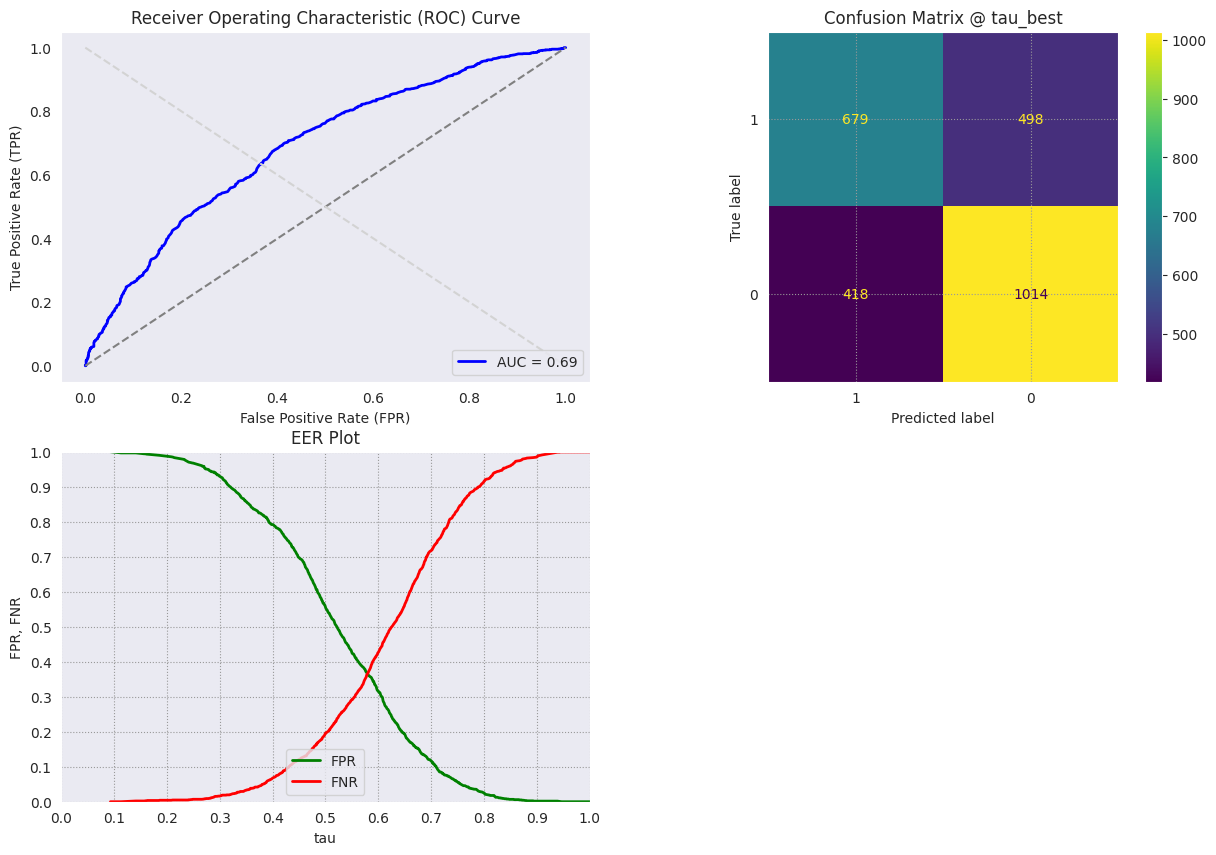


 ITERATION: 2 

Best Parameters: {'rf__max_features': 'sqrt', 'rf__n_estimators': 500}
Best Score: 0.6702191936741453
AUC: 0.6842332437833143
EER 0.3602378929481733
	EER Threshold 0.578
	BEST TAU:  0.53
	TPR @ tau_best:  0.5284621920135939
	FPR @ tau_best:  0.2527932960893855
	TNR @ tau_best:  0.7472067039106145
	FNR @ tau_best:  0.4715378079864061
	Accuracy @ tau_best:  0.6485243388271368
	Precision @ tau_best: 0.6321138211382114
	Recall @tau_best: 0.5284621920135939


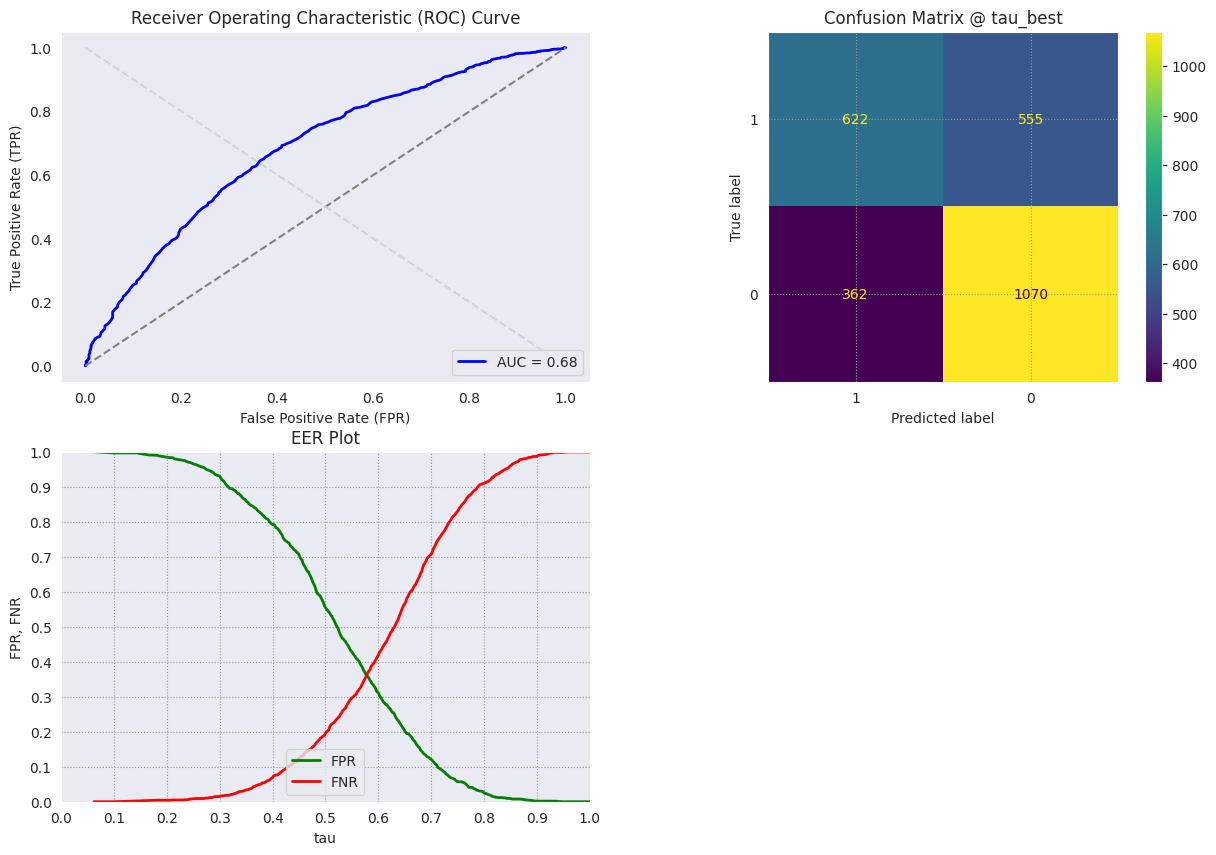


 ITERATION: 3 

Best Parameters: {'rf__max_features': 'log2', 'rf__n_estimators': 1250}
Best Score: 0.6692185568767847
AUC: 0.6862863876060242
EER 0.3653355989804588
	EER Threshold 0.5792
	BEST TAU:  0.556
	TPR @ tau_best:  0.5887850467289719
	FPR @ tau_best:  0.3009776536312849
	TNR @ tau_best:  0.6990223463687151
	FNR @ tau_best:  0.411214953271028
	Accuracy @ tau_best:  0.649290916059793
	Precision @ tau_best: 0.6165480427046264
	Recall @tau_best: 0.5887850467289719


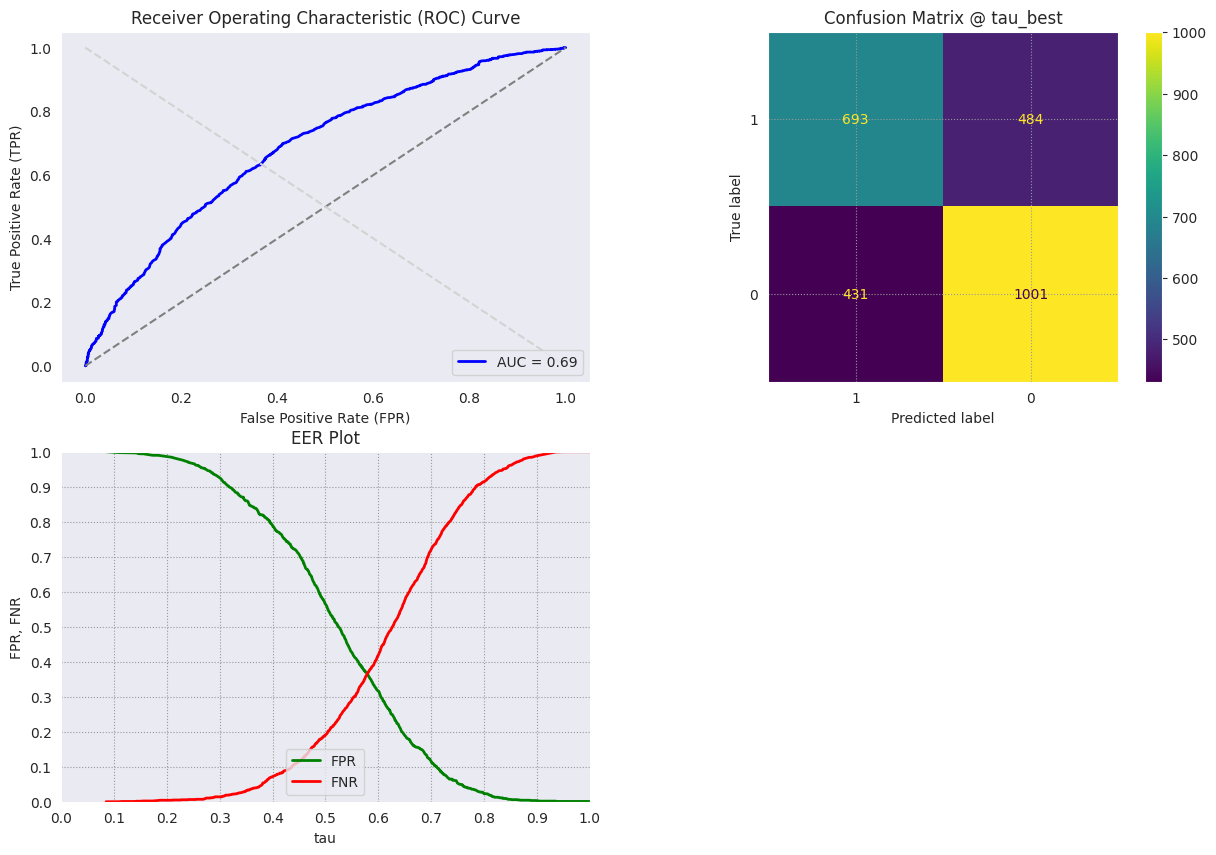


 ITERATION: 4 

Best Parameters: {'rf__max_features': 'sqrt', 'rf__n_estimators': 1250}
Best Score: 0.6681333062569101
AUC: 0.6866836076000435
EER 0.3644859813084112
	EER Threshold 0.5784
	BEST TAU:  0.536
	TPR @ tau_best:  0.5412064570943076
	FPR @ tau_best:  0.26187150837988826
	TNR @ tau_best:  0.7381284916201117
	FNR @ tau_best:  0.45879354290569246
	Accuracy @ tau_best:  0.649290916059793
	Precision @ tau_best: 0.6294466403162056
	Recall @tau_best: 0.5412064570943076


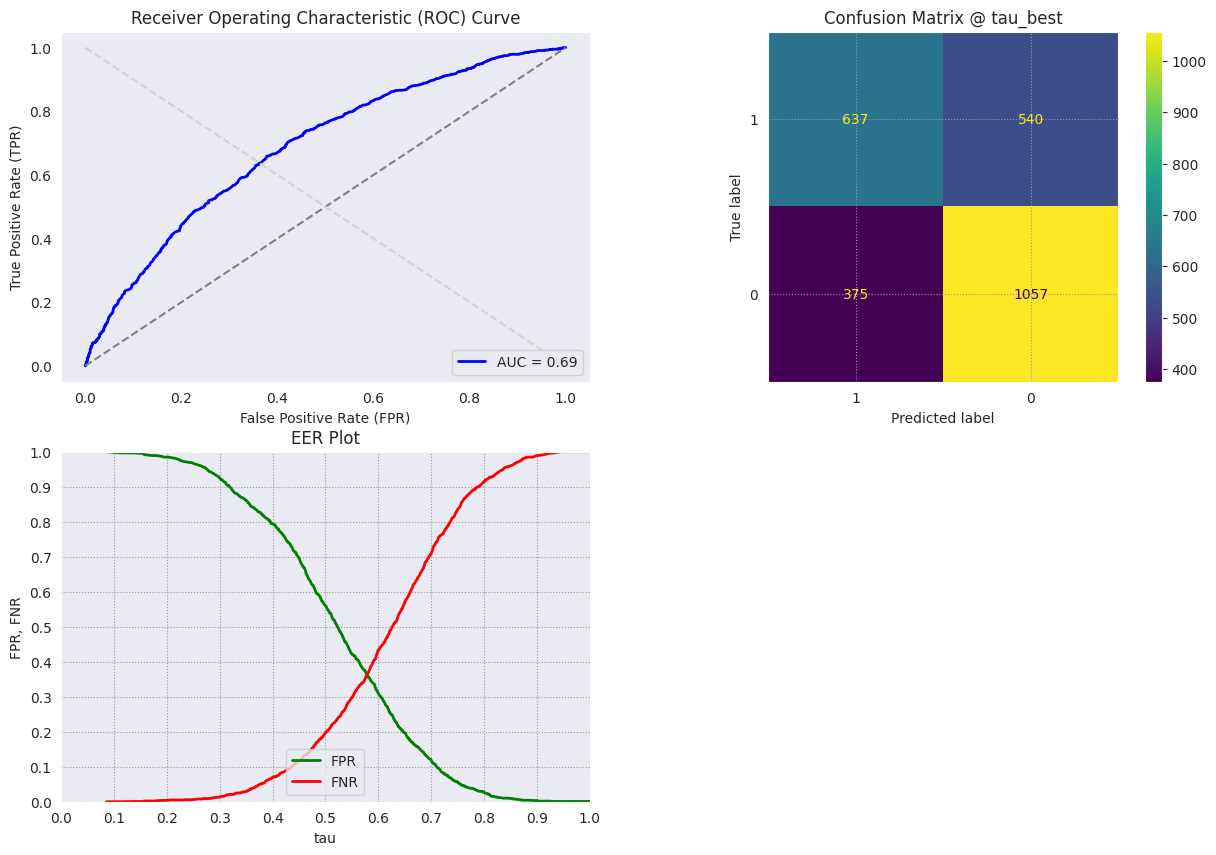

[0.6508240705251054, 0.648907627443465, 0.6485243388271368, 0.649290916059793, 0.649290916059793]


In [ ]:
rf_acc_mean, rf_acc_std = [[], []]
rf_auc_mean, rf_auc_std = [[], []]
rf_tpr_mean, rf_tpr_std = [[], []]
rf_tnr_mean, rf_tnr_std = [[], []]
rf_fpr_mean, rf_fpr_std = [[], []]
rf_fnr_mean, rf_fnr_std = [[], []]
rf_prec_mean, rf_prec_std = [[], []]
rf_rec_mean, rf_rec_std = [[], []]
rf_eer_mean, rf_eer_std = [[], []]
rf_roc_mean, rf_roc_std = [[], []]

current_acc = []
current_auc = []
current_tpr = []
current_tnr = []
current_fpr = []
current_fnr = []
current_prec = []
current_rec = []
current_eer = []
current_roc = []

for i in range(5) :
  print("\r\n ITERATION:", i, "\r\n")

  # ==============================================
  # HyperParameter Tuning

  rf = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

  param_grid = {
      'rf__n_estimators': [100, 300, 500, 750, 1000, 1250],
      'rf__max_features': ['sqrt', 'log2']
  }

  grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=pds, scoring='roc_auc', return_train_score=True)

  grid_search.fit(x_class_learn, y_class_learn)

  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  print("Best Parameters:", best_params)
  print("Best Score:", best_score)

  # Misura tempi di apprendimento per Efficienza
  start = datetime.now()
  RandomForestClassifier(max_features=best_params['rf__max_features'], n_estimators=best_params['rf__n_estimators']).fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['RF', (end-start).seconds + (end-start).microseconds/1000000]

  best_model_rf = grid_search.best_estimator_

  # ==============================================
  # Prediction

  # Misura tempi di predizione per Efficienza
  start = datetime.now()
  y_pred = best_model_rf.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['RF', (end-start).seconds + (end-start).microseconds/1000000]

  y_probs = best_model_rf.predict_proba(x_class_test)[:,1]
  '''
  # Calculate Accuracy
  accuracy = accuracy_score(y_class_test, y_pred)
  current_acc.append(accuracy)
  print("Accuracy:", accuracy)

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(y_class_test, y_pred)

  # Extract values from confusion matrix
  tn, fp, fn, tp = conf_matrix.ravel()

  # Calculate True Positive Rate (TPR), False Positive Rate (FPR),
  # True Negative Rate (TNR), and False Negative Rate (FNR)
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  tnr = tn / (tn + fp)
  fnr = fn / (fn + tp)
  current_tpr.append(tpr)
  current_fpr.append(fpr)
  current_tnr.append(tnr)
  current_fnr.append(fnr)

  # Display the metrics
  print("True Positive Rate (TPR):", tpr)
  print("False Positive Rate (FPR):", fpr)
  print("True Negative Rate (TNR):", tnr)
  print("False Negative Rate (FNR):", fnr)

  # Calculate Precision and Recall
  precision = precision_score(y_class_test, y_pred)
  current_prec.append(precision)
  recall = recall_score(y_class_test, y_pred)
  current_rec.append(recall)
  print("Precision:", precision)
  print("Recall:", recall)

  # Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
  fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
  current_roc.append([fprs,tprs])
  roc_auc = auc(fprs, tprs)
  current_auc.append(roc_auc)
  print("AUC:", roc_auc)
  '''
  # Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
  fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
  current_roc.append([fprs,tprs])
  roc_auc = auc(fprs, tprs)
  current_auc.append(roc_auc)
  print("AUC:", roc_auc)

  #Calculate EER
  fnrs = 1 - tprs
  eer_threshold = thresholds[np.nanargmin(np.absolute((fnrs - fprs)))]
  eer = fprs[np.nanargmin(np.absolute((fnrs - fprs)))]
  current_eer.append(eer)
  print("EER", eer)
  print("\tEER Threshold", eer_threshold)

  #############################
  # FIND BEST TAU
  best_acc = 0
  best_tau = 0

  for tau in thresholds :
    cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=tau, dtype=bool).astype(int))
    TP_tau=cm_tau[0,0]
    FN_tau=cm_tau[0,1]
    FP_tau=cm_tau[1,0]
    TN_tau=cm_tau[1,1]
    acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

    if acc_tau > best_acc :
      best_acc = acc_tau
      best_tau = tau

  print("\tBEST TAU: ", best_tau)

  # Effectiveness scores for tau_best
  cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=best_tau, dtype=bool).astype(int))
  TP_tau=cm_tau[0,0]
  FN_tau=cm_tau[0,1]
  FP_tau=cm_tau[1,0]
  TN_tau=cm_tau[1,1]
  tpr_tau = (TP_tau/(TP_tau+FN_tau))
  fpr_tau = (FP_tau/(TN_tau+FP_tau))
  tnr_tau = (TN_tau/(TN_tau+FP_tau))
  fnr_tau = (FN_tau/(TP_tau+FN_tau))
  acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

  print("\tTPR @ tau_best: ", tpr_tau)
  print("\tFPR @ tau_best: ", fpr_tau)
  print("\tTNR @ tau_best: ", tnr_tau)
  print("\tFNR @ tau_best: ", fnr_tau)
  print("\tAccuracy @ tau_best: ", acc_tau)

  current_acc.append(acc_tau)
  current_tpr.append(tpr_tau)
  current_fpr.append(fpr_tau)
  current_tnr.append(tnr_tau)
  current_fnr.append(fnr_tau)

  # Precision, Recall @ tau_best
  precision_tau = TP_tau/(TP_tau+FP_tau)
  current_prec.append(precision_tau)
  current_rec.append(tpr_tau)
  print("\tPrecision @ tau_best:", precision_tau)
  print("\tRecall @tau_best:", tpr_tau)

  #############################
  # Plot ROC curve & Confusion Matrix

  fig, axs = plt.subplots(2, 2, figsize=(15, 10))
  #ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[0,1], normalize=None, colorbar=True)
  ConfusionMatrixDisplay(confusion_matrix=cm_tau, display_labels=[1,0]).plot(ax=axs[0,1])
  axs[0,1].set_title('Confusion Matrix @ tau_best')

  axs[0,0].plot(fprs, tprs, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
  axs[0,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
  axs[0,0].plot([0, 1], [1, 0], color='lightgray', linestyle='--')
  axs[0,0].set_xlabel('False Positive Rate (FPR)')
  axs[0,0].set_ylabel('True Positive Rate (TPR)')
  axs[0,0].set_title('Receiver Operating Characteristic (ROC) Curve')
  axs[0,0].legend(loc='lower right')

  axs[1,0].plot(thresholds, fprs, color='green', lw=2, label='FPR')
  axs[1,0].plot(thresholds, fnrs, color='red', lw=2, label='FNR')
  axs[1,0].set_xlabel('tau')
  axs[1,0].set_xlim([0,1])
  axs[1,0].set_ylim([0,1])
  axs[1,0].set_xticks(np.arange(0, 1.01, 0.1))
  axs[1,0].set_ylabel('FPR, FNR')
  axs[1,0].set_yticks(np.arange(0, 1.01, 0.1))
  axs[1,0].set_title('EER Plot')
  axs[1,0].legend(loc='lower center')

  fig.delaxes(axs[1][1])

  axs[0,0].grid()
  plt.grid(True)
  plt.show()

############

models.append('RF')

print(current_acc)

rf_acc_mean = np.mean(np.array(current_acc))
rf_acc_std = np.std(np.array(current_acc))
rf_tpr_mean = np.mean(np.array(current_tpr))
rf_tpr_std = np.std(np.array(current_tpr))
rf_tnr_mean = np.mean(np.array(current_tnr))
rf_tnr_std = np.std(np.array(current_tnr))
rf_fpr_mean = np.mean(np.array(current_fpr))
rf_fpr_std = np.std(np.array(current_fpr))
rf_fnr_mean = np.mean(np.array(current_fnr))
rf_fnr_std = np.std(np.array(current_fnr))
rf_prec_mean = np.mean(np.array(current_prec))
rf_prec_std = np.std(np.array(current_prec))
rf_rec_mean = np.mean(np.array(current_rec))
rf_rec_std = np.std(np.array(current_rec))
rf_eer_mean = np.mean(np.array(current_eer))
rf_eer_std = np.std(np.array(current_eer))
rf_auc_mean = np.mean(np.array(current_auc))
rf_auc_std = np.std(np.array(current_auc))

accuracies.append(rf_acc_mean)
TPRs.append(rf_tpr_mean)
FPRs.append(rf_fpr_mean)
TNRs.append(rf_tnr_mean)
FNRs.append(rf_fnr_mean)
precisions.append(rf_prec_mean)
recalls.append(rf_rec_mean)
AUCs.append(rf_auc_mean)
EERs.append(rf_eer_mean)

# ROC

base_fpr = np.linspace(0, 1, 101)
rf_tprs = []

for i in range(len(current_roc)):
  loc_fpr = current_roc[i][0]
  loc_tpr = current_roc[i][1]

  loc_tpr = np.interp(base_fpr, loc_fpr, loc_tpr)
  loc_tpr[0] = 0.0

  rf_tprs.append(loc_tpr)

rf_tprs = np.array(rf_tprs)
mean_tprs = rf_tprs.mean(axis=0)
std_tprs = rf_tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std_tprs, 1)
tprs_lower = mean_tprs - std_tprs

ROCs.append([base_fpr, mean_tprs])

# STD
precisions_std.append(rf_prec_std)
recalls_std.append(rf_rec_std)
TPRs_std.append(rf_tpr_std)
TNRs_std.append(rf_tnr_std)
FPRs_std.append(rf_fpr_std)
FNRs_std.append(rf_fnr_std)
AUCs_std.append(rf_auc_std)
accuracies_std.append(rf_acc_std)
EERs_std.append(rf_eer_std)

**Plot valori valutati durante HPT**

In [ ]:
# DA SISTEMARE

'''
results = results = grid_search.cv_results_

print(results)

plt.figure(figsize=(13, 13))
plt.title("HPT evaluating", fontsize=16)

plt.xlabel("c")
plt.ylabel("Accuracy")

ax = plt.gca()
kernel = np.array(list(dict.fromkeys(results["param_svm__kernel"].data)))
c = np.array(list(dict.fromkeys(results["param_svm__C"].data)), dtype=float)

X_axis = c

sample_score_mean = results["mean_%s_%s" % ("test", "score")]
sample_score_std = results["std_%s_%s" % ("test", "score")]

sample_score_mean_split = np.array_split(sample_score_mean, len(kernel))
sample_score_std_split = np.array_split(sample_score_std, len(kernel))

for local_c, color, mean, std in zip(kernel, ["g", "k"], sample_score_mean_split, sample_score_std_split):
  ax.errorbar(
      X_axis,
      y=mean,
      yerr=std,
      marker='o',
      linestyle='',
      color=color,
      label="%s" % local_c
  )

  ax.set_xticks(X_axis, labels=X_axis)
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
  ax.set_ylim(bottom=min(sample_score_mean)-max(sample_score_std)-0.01, top=max(sample_score_mean)+max(sample_score_std)+0.01)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
  best_index = np.nonzero(results["rank_test_%s" % "score"] == 1)[0][0]
  best_score = results["mean_test_%s" % "score"][best_index]

  # Plot a dotted vertical line at the best score for that scorer marked by x
  ax.plot(
      [
          X_axis[best_index%len(c)],
      ]
      * 2,
      [0, best_score],
      linestyle="--",
      color="red",
      alpha=.5,
      marker="x",
      markeredgewidth=3,
      ms=8,
  )


plt.legend(loc="best")
plt.grid(False)
plt.show()

### kNN

**Hyperparameter tuning (Grid search)**

In [ ]:
knn = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Define the hyperparameter grid with only n_neighbors
param_grid = {
    'knn__n_neighbors': [5, 25, 50, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 1750, 2000]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=pds, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_class_learn, y_class_learn)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Time for efficiency
for x in range(5):
  start = datetime.now()
  KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors']).fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['kNN', (end-start).seconds + (end-start).microseconds/1000000]

# Use the best model for prediction on the test set
best_model_knn = grid_search.best_estimator_

Best Parameters: {'knn__n_neighbors': 1000}
Best Score: 0.6863384402475989


**Plot valori valutati durante HPT**

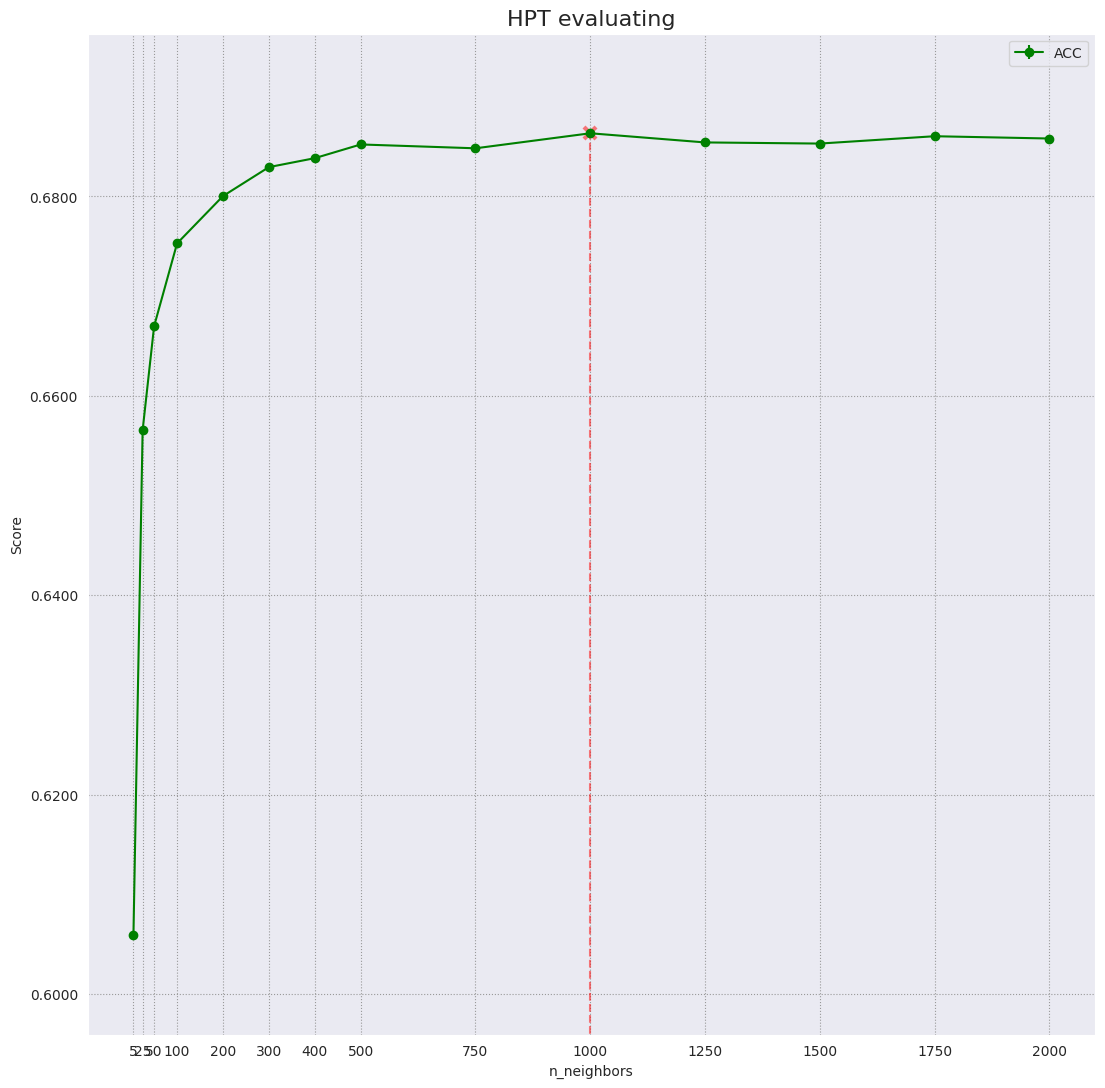

In [ ]:
results = results = grid_search.cv_results_
scoring = {"score": 'accuracy'}

plt.figure(figsize=(13, 13))
plt.title("HPT evaluating", fontsize=16)

plt.xlabel("n_neighbors")
plt.ylabel("Score")

ax = plt.gca()

X_axis = np.array(results["param_knn__n_neighbors"].data, dtype=float)

for scorer, color in zip(scoring, ["g", "k"]):
  sample_score_mean = results["mean_%s_%s" % ("test", scorer)]
  sample_score_std = results["std_%s_%s" % ("test", scorer)]
  ax.errorbar(
      X_axis,
      y=sample_score_mean,
      yerr=sample_score_std,
      marker='o',
      linestyle='-',
      color=color,
      label="%s" % "ACC",
  )

  ax.set_xticks(X_axis, labels=X_axis)
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.set_ylim(bottom=min(sample_score_mean)-max(sample_score_std)-0.01, top=max(sample_score_mean)+max(sample_score_std)+0.01)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
  best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
  best_score = results["mean_test_%s" % scorer][best_index]

  # Plot a dotted vertical line at the best score for that scorer marked by x
  ax.plot(
      [
          X_axis[best_index],
      ]
      * 2,
      [0, best_score],
      linestyle="--",
      color="red",
      alpha=.5,
      marker="x",
      markeredgewidth=3,
      ms=8,
  )

plt.legend(loc="best")
plt.grid(True)
plt.show()

**Prediction phase**

AUC: 0.6994581314106976
EER 0.35598980458793544
	EER Threshold 0.593
	BEST TAU:  0.546
	TPR @ tau_best:  0.4868309260832625
	FPR @ tau_best:  0.2164804469273743
	TNR @ tau_best:  0.7835195530726257
	FNR @ tau_best:  0.5131690739167375
	Accuracy @ tau_best:  0.6496742046761211
	Precision @ tau_best: 0.6489241223103058
	Recall @tau_best: 0.4868309260832625


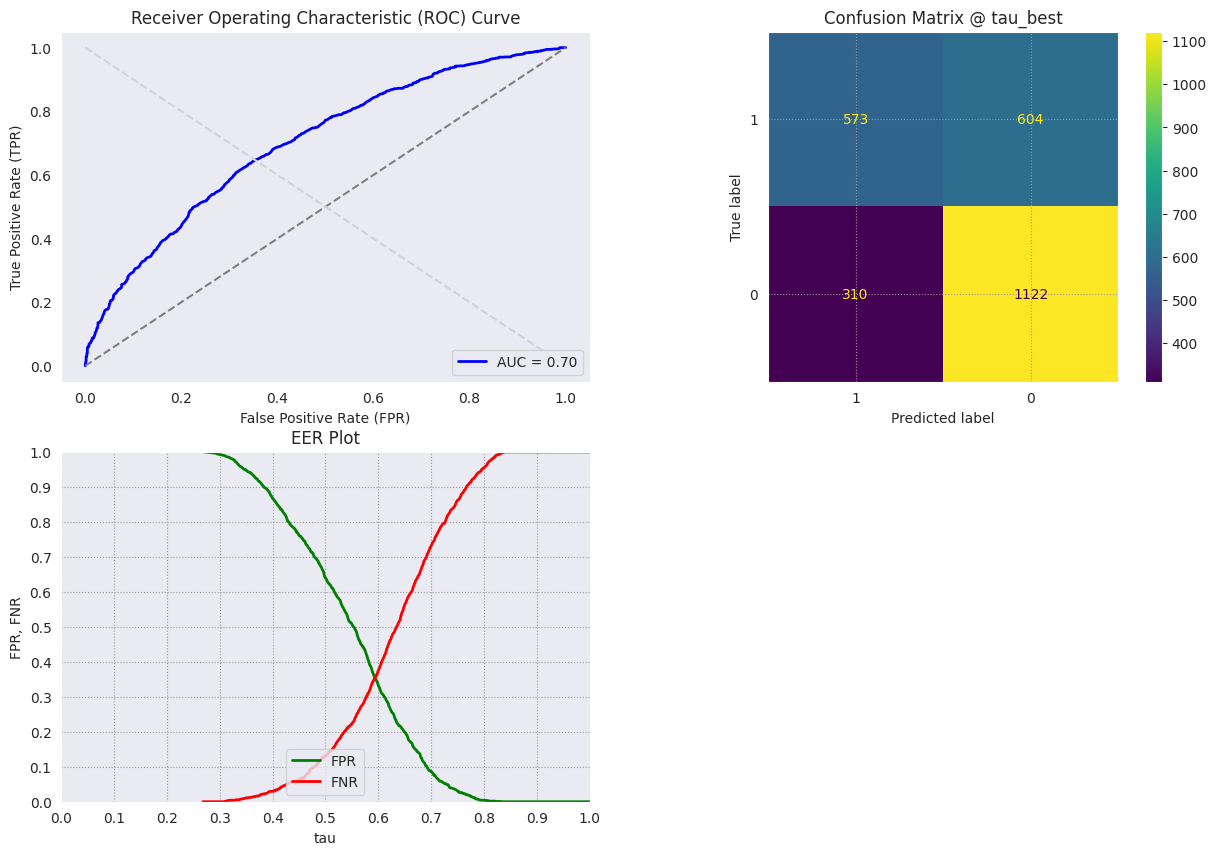

In [ ]:
models.append('kNN')

#Predict
for x in range(5):
  start = datetime.now()
  y_pred = best_model_knn.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['kNN', (end-start).seconds + (end-start).microseconds/1000000]

y_probs = best_model_knn.predict_proba(x_class_test)[:,1]
'''
# Calculate Accuracy
accuracy = accuracy_score(y_class_test, y_pred)
accuracies.append(accuracy)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate True Positive Rate (TPR), False Positive Rate (FPR),
# True Negative Rate (TNR), and False Negative Rate (FNR)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
TPRs.append(tpr)
FPRs.append(fpr)
TNRs.append(tnr)
FNRs.append(fnr)

# Display the metrics
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("True Negative Rate (TNR):", tnr)
print("False Negative Rate (FNR):", fnr)

# Calculate Precision and Recall
precision = precision_score(y_class_test, y_pred)
precisions.append(precision)
recall = recall_score(y_class_test, y_pred)
recalls.append(recall)
print("Precision:", precision)
print("Recall:", recall)
'''
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
ROCs.append([fprs,tprs])
roc_auc = auc(fprs, tprs)
AUCs.append(roc_auc)
print("AUC:", roc_auc)

#Calculate EER
fnrs = 1 - tprs
eer_threshold = thresholds[np.nanargmin(np.absolute((fnrs - fprs)))]
eer = fprs[np.nanargmin(np.absolute((fnrs - fprs)))]
EERs.append(eer)
print("EER", eer)
print("\tEER Threshold", eer_threshold)

#############################
# FIND BEST TAU
best_acc = 0
best_tau = 0

for tau in thresholds :
  cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=tau, dtype=bool).astype(int))
  TP_tau=cm_tau[0,0]
  FN_tau=cm_tau[0,1]
  FP_tau=cm_tau[1,0]
  TN_tau=cm_tau[1,1]
  acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

  if acc_tau > best_acc :
    best_acc = acc_tau
    best_tau = tau

print("\tBEST TAU: ", best_tau)

# Effectiveness scores for tau_best
cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=best_tau, dtype=bool).astype(int))
TP_tau=cm_tau[0,0]
FN_tau=cm_tau[0,1]
FP_tau=cm_tau[1,0]
TN_tau=cm_tau[1,1]
tpr_tau = (TP_tau/(TP_tau+FN_tau))
fpr_tau = (FP_tau/(TN_tau+FP_tau))
tnr_tau = (TN_tau/(TN_tau+FP_tau))
fnr_tau = (FN_tau/(TP_tau+FN_tau))
acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

print("\tTPR @ tau_best: ", tpr_tau)
print("\tFPR @ tau_best: ", fpr_tau)
print("\tTNR @ tau_best: ", tnr_tau)
print("\tFNR @ tau_best: ", fnr_tau)
print("\tAccuracy @ tau_best: ", acc_tau)

accuracies.append(acc_tau)
TPRs.append(tpr_tau)
FPRs.append(fpr_tau)
TNRs.append(tnr_tau)
FNRs.append(fnr_tau)

# Precision, Recall @ tau_best
precision_tau = TP_tau/(TP_tau+FP_tau)
precisions.append(precision_tau)
recalls.append(tpr_tau)
print("\tPrecision @ tau_best:", precision_tau)
print("\tRecall @tau_best:", tpr_tau)

#############################

# STD are 0 for this MLT
precisions_std.append(0)
recalls_std.append(0)
TPRs_std.append(0)
TNRs_std.append(0)
FPRs_std.append(0)
FNRs_std.append(0)
ROCs_std.append(0)
AUCs_std.append(0)
accuracies_std.append(0)
EERs_std.append(0)

# Plot ROC curve & Confusion Matrix

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[0,1], normalize=None, colorbar=True)
ConfusionMatrixDisplay(confusion_matrix=cm_tau, display_labels=[1,0]).plot(ax=axs[0,1])
axs[0,1].set_title('Confusion Matrix @ tau_best')

axs[0,0].plot(fprs, tprs, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[0,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0,0].plot([0, 1], [1, 0], color='lightgray', linestyle='--')
axs[0,0].set_xlabel('False Positive Rate (FPR)')
axs[0,0].set_ylabel('True Positive Rate (TPR)')
axs[0,0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0,0].legend(loc='lower right')

axs[1,0].plot(thresholds, fprs, color='green', lw=2, label='FPR')
axs[1,0].plot(thresholds, fnrs, color='red', lw=2, label='FNR')
axs[1,0].set_xlabel('tau')
axs[1,0].set_xlim([0,1])
axs[1,0].set_ylim([0,1])
axs[1,0].set_xticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_ylabel('FPR, FNR')
axs[1,0].set_yticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_title('EER Plot')
axs[1,0].legend(loc='lower center')

fig.delaxes(axs[1][1])

axs[0,0].grid()
plt.grid(True)
plt.show()

### Naive-Bayes

AUC: 0.6972697132659019
EER 0.356839422259983
	EER Threshold 0.6423854765853615
	BEST TAU:  0.5150794989335166
	TPR @ tau_best:  0.556499575191164
	FPR @ tau_best:  0.2681564245810056
	TNR @ tau_best:  0.7318435754189944
	FNR @ tau_best:  0.443500424808836
	Accuracy @ tau_best:  0.6527405136067459
	Precision @ tau_best: 0.6304138594802695
	Recall @tau_best: 0.556499575191164


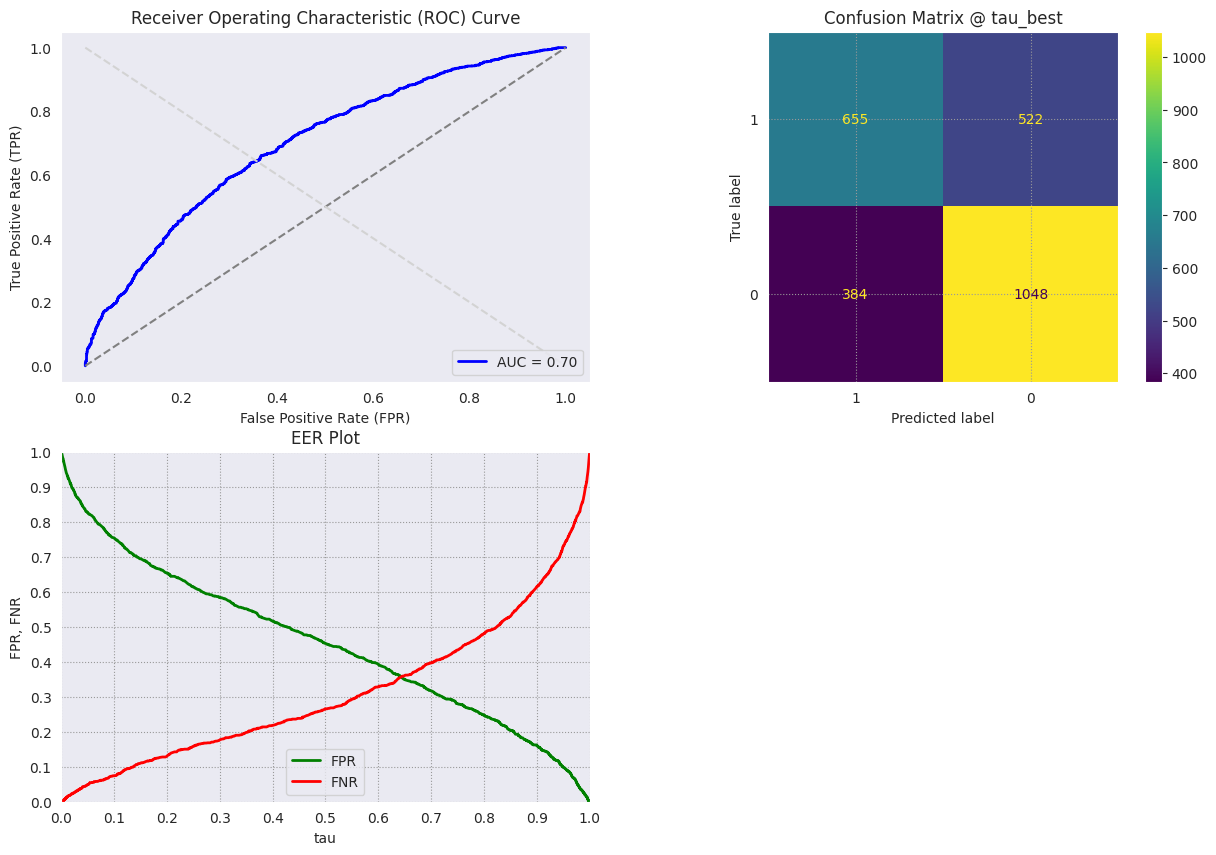

In [ ]:
models.append('NB')

nb_classifier = Pipeline(steps=[('scaler', StandardScaler()), ('nb_classifier', GaussianNB())])

#Learn
for x in range(5):
  start = datetime.now()
  nb_classifier.fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['NB', (end-start).seconds + (end-start).microseconds/1000000]

#Predict
for x in range(5):
  start = datetime.now()
  y_pred = nb_classifier.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['NB', (end-start).seconds + (end-start).microseconds/1000000]

y_probs = nb_classifier.predict_proba(x_class_test)[:,1]
'''
# Calculate Accuracy
accuracy = accuracy_score(y_class_test, y_pred)
accuracies.append(accuracy)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate True Positive Rate (TPR), False Positive Rate (FPR),
# True Negative Rate (TNR), and False Negative Rate (FNR)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
TPRs.append(tpr)
FPRs.append(fpr)
TNRs.append(tnr)
FNRs.append(fnr)

# Display the metrics
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("True Negative Rate (TNR):", tnr)
print("False Negative Rate (FNR):", fnr)

# Calculate Precision and Recall
precision = precision_score(y_class_test, y_pred)
precisions.append(precision)
recall = recall_score(y_class_test, y_pred)
recalls.append(recall)
print("Precision:", precision)
print("Recall:", recall)
'''
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
ROCs.append([fprs,tprs])
roc_auc = auc(fprs, tprs)
AUCs.append(roc_auc)
print("AUC:", roc_auc)

#Calculate EER
fnrs = 1 - tprs
eer_threshold = thresholds[np.nanargmin(np.absolute((fnrs - fprs)))]
eer = fprs[np.nanargmin(np.absolute((fnrs - fprs)))]
EERs.append(eer)
print("EER", eer)
print("\tEER Threshold", eer_threshold)

#############################
# FIND BEST TAU
best_acc = 0
best_tau = 0

for tau in thresholds :
  cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=tau, dtype=bool).astype(int))
  TP_tau=cm_tau[0,0]
  FN_tau=cm_tau[0,1]
  FP_tau=cm_tau[1,0]
  TN_tau=cm_tau[1,1]
  acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

  if acc_tau > best_acc :
    best_acc = acc_tau
    best_tau = tau

print("\tBEST TAU: ", best_tau)

# Effectiveness scores for tau_best
cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=best_tau, dtype=bool).astype(int))
TP_tau=cm_tau[0,0]
FN_tau=cm_tau[0,1]
FP_tau=cm_tau[1,0]
TN_tau=cm_tau[1,1]
tpr_tau = (TP_tau/(TP_tau+FN_tau))
fpr_tau = (FP_tau/(TN_tau+FP_tau))
tnr_tau = (TN_tau/(TN_tau+FP_tau))
fnr_tau = (FN_tau/(TP_tau+FN_tau))
acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

print("\tTPR @ tau_best: ", tpr_tau)
print("\tFPR @ tau_best: ", fpr_tau)
print("\tTNR @ tau_best: ", tnr_tau)
print("\tFNR @ tau_best: ", fnr_tau)
print("\tAccuracy @ tau_best: ", acc_tau)

accuracies.append(acc_tau)
TPRs.append(tpr_tau)
FPRs.append(fpr_tau)
TNRs.append(tnr_tau)
FNRs.append(fnr_tau)

# Precision, Recall @ tau_best
precision_tau = TP_tau/(TP_tau+FP_tau)
precisions.append(precision_tau)
recalls.append(tpr_tau)
print("\tPrecision @ tau_best:", precision_tau)
print("\tRecall @tau_best:", tpr_tau)

#############################


# STD are 0 for this MLT
precisions_std.append(0)
recalls_std.append(0)
TPRs_std.append(0)
TNRs_std.append(0)
FPRs_std.append(0)
FNRs_std.append(0)
ROCs_std.append(0)
AUCs_std.append(0)
accuracies_std.append(0)
EERs_std.append(0)

# Plot ROC curve & Confusion Matrix

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[0,1], normalize=None, colorbar=True)
ConfusionMatrixDisplay(confusion_matrix=cm_tau, display_labels=[1,0]).plot(ax=axs[0,1])
axs[0,1].set_title('Confusion Matrix @ tau_best')

axs[0,0].plot(fprs, tprs, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[0,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0,0].plot([0, 1], [1, 0], color='lightgray', linestyle='--')
axs[0,0].set_xlabel('False Positive Rate (FPR)')
axs[0,0].set_ylabel('True Positive Rate (TPR)')
axs[0,0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0,0].legend(loc='lower right')

axs[1,0].plot(thresholds, fprs, color='green', lw=2, label='FPR')
axs[1,0].plot(thresholds, fnrs, color='red', lw=2, label='FNR')
axs[1,0].set_xlabel('tau')
axs[1,0].set_xlim([0,1])
axs[1,0].set_ylim([0,1])
axs[1,0].set_xticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_ylabel('FPR, FNR')
axs[1,0].set_yticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_title('EER Plot')
axs[1,0].legend(loc='lower center')

fig.delaxes(axs[1][1])

axs[0,0].grid()
plt.grid(True)
plt.show()

### SVM

**Hyperparameter tuning (Grid Search)**

*Ci mette una ventina di minuti...*

In [ ]:
svm = Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10] ,
    'svm__kernel': ['linear', 'rbf']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=pds, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_class_learn, y_class_learn)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Time for efficiency
for x in range(5):
  start = datetime.now()
  Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True, kernel=best_params['svm__kernel'], C=best_params['svm__C']))]).fit(x_class_learn, y_class_learn)
  end = datetime.now()
  efficiency_learn.loc[len(efficiency_learn)] = ['SVM', (end-start).seconds + (end-start).microseconds/1000000]

# Use the best model for prediction on the test set
best_model_svm = grid_search.best_estimator_

Best Parameters: {'svm__C': 1, 'svm__kernel': 'linear'}
Best Score: 0.6918640362422939


**Plot valori valutati durante HPT**

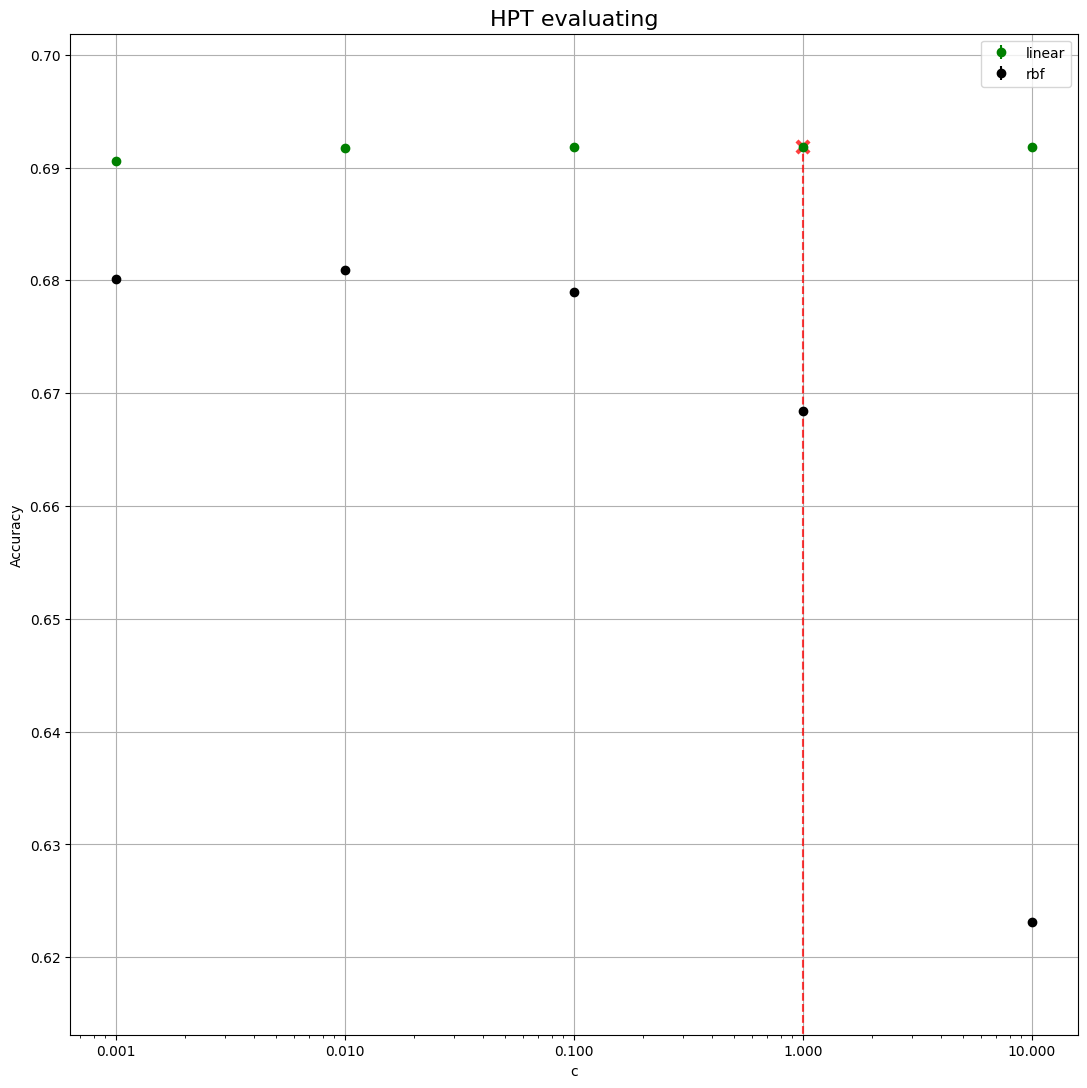

In [ ]:
results = results = grid_search.cv_results_

#print(results)

plt.figure(figsize=(13, 13))
plt.title("HPT evaluating", fontsize=16)

plt.xlabel("c")
plt.ylabel("Accuracy")

plt.xscale("log")

ax = plt.gca()
kernel = np.array(list(dict.fromkeys(results["param_svm__kernel"].data)))
c = np.array(list(dict.fromkeys(results["param_svm__C"].data)), dtype=float)

X_axis = c

sample_score_mean = results["mean_%s_%s" % ("test", "score")]
sample_score_std = results["std_%s_%s" % ("test", "score")]

sample_score_mean_split = [[],[]]
sample_score_std_split = [[],[]]

for i in range(len(sample_score_mean)) :
  sample_score_mean_split[i % 2].append(sample_score_mean[i])
  sample_score_std_split[i % 2].append(sample_score_std[i])

#sample_score_mean_split = np.array_split(sample_score_mean, len(kernel))
#sample_score_std_split = np.array_split(sample_score_std, len(kernel))

for local_k, color, mean, std in zip(kernel, ["g", "k"], sample_score_mean_split, sample_score_std_split):
  ax.errorbar(
      X_axis,
      y=mean,
      yerr=std,
      marker='o',
      linestyle='',
      color=color,
      label="%s" % local_k
  )

  ax.set_xticks(X_axis, labels=X_axis)
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
  ax.set_ylim(bottom=min(sample_score_mean)-max(sample_score_std)-0.01, top=max(sample_score_mean)+max(sample_score_std)+0.01)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  best_index = np.nonzero(results["rank_test_%s" % "score"] == 1)[0][0]
  best_score = results["mean_test_%s" % "score"][best_index]

  # Plot a dotted vertical line at the best score for that scorer marked by x
  ax.plot(
      [
          X_axis[math.floor(best_index/len(kernel))],
      ]
      * 2,
      [0, best_score],
      linestyle="--",
      color="red",
      alpha=.5,
      marker="x",
      markeredgewidth=3,
      ms=8
  )

plt.legend(loc="best")
plt.grid(True)
plt.show()

**Prediction phase**

AUC: 0.7017002439684266
EER 0.3542905692438403
	EER Threshold 0.5980879822824018
	BEST TAU:  0.5509979000892106
	TPR @ tau_best:  0.5522514868309261
	FPR @ tau_best:  0.2569832402234637
	TNR @ tau_best:  0.7430167597765364
	FNR @ tau_best:  0.44774851316907394
	Accuracy @ tau_best:  0.6569566883863549
Precision @ tau_best: 0.6385068762278978
Recall @tau_best: 0.5522514868309261


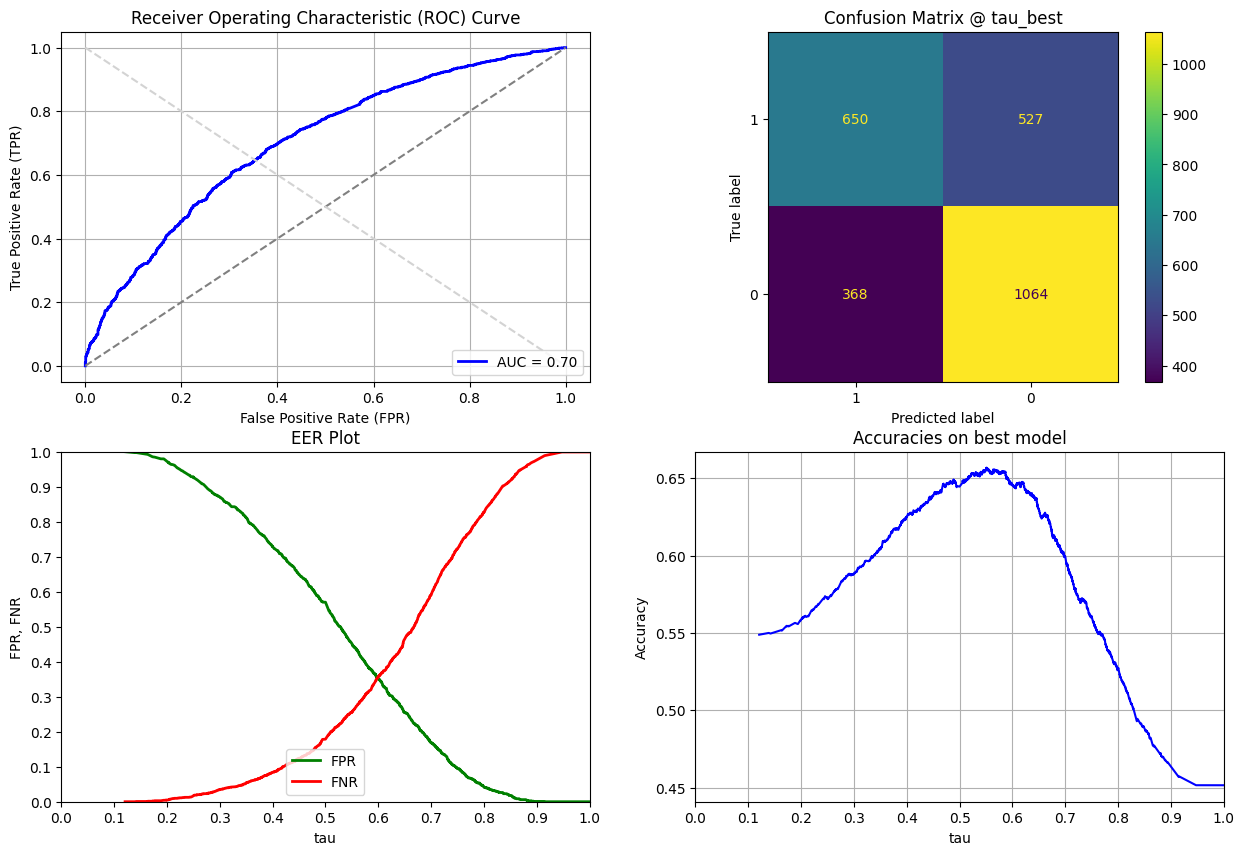

In [ ]:
accuracies_graph = []

##########################

models.append('SVM')

#Predict
for x in range(5):
  start = datetime.now()
  y_pred = best_model_svm.predict(x_class_test)
  end = datetime.now()
  efficiency_test.loc[len(efficiency_test)] = ['SVM', (end-start).seconds + (end-start).microseconds/1000000]

y_probs = best_model_svm.predict_proba(x_class_test)[:,1]

'''
# Calculate Accuracy
accuracy = accuracy_score(y_class_test, y_pred)
accuracies.append(accuracy)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate True Positive Rate (TPR), False Positive Rate (FPR),
# True Negative Rate (TNR), and False Negative Rate (FNR)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
TPRs.append(tpr)
FPRs.append(fpr)
TNRs.append(tnr)
FNRs.append(fnr)

# Display the metrics
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("True Negative Rate (TNR):", tnr)
print("False Negative Rate (FNR):", fnr)

# Calculate Precision and Recall
precision = precision_score(y_class_test, y_pred)
precisions.append(precision)
recall = recall_score(y_class_test, y_pred)
recalls.append(recall)
print("Precision:", precision)
print("Recall:", recall)
'''
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fprs, tprs, thresholds = roc_curve(y_class_test, y_probs)
ROCs.append([fprs,tprs])
roc_auc = auc(fprs, tprs)
AUCs.append(roc_auc)
print("AUC:", roc_auc)

#Calculate EER
fnrs = 1 - tprs
eer_threshold = thresholds[np.nanargmin(np.absolute((fnrs - fprs)))]
eer = fprs[np.nanargmin(np.absolute((fnrs - fprs)))]
EERs.append(eer)
print("EER", eer)
print("\tEER Threshold", eer_threshold)

#############################
# FIND BEST TAU
best_acc = 0
best_tau = 0

for tau in thresholds :
  cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=tau, dtype=bool).astype(int))
  TP_tau=cm_tau[0,0]
  FN_tau=cm_tau[0,1]
  FP_tau=cm_tau[1,0]
  TN_tau=cm_tau[1,1]
  acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

  accuracies_graph.append(acc_tau)

  if acc_tau > best_acc :
    best_acc = acc_tau
    best_tau = tau

print("\tBEST TAU: ", best_tau)

# Effectiveness scores for tau_best
cm_tau = confusion_matrix(y_class_test.to_numpy(), np.array(y_probs>=best_tau, dtype=bool).astype(int))
TP_tau=cm_tau[0,0]
FN_tau=cm_tau[0,1]
FP_tau=cm_tau[1,0]
TN_tau=cm_tau[1,1]
tpr_tau = (TP_tau/(TP_tau+FN_tau))
fpr_tau = (FP_tau/(TN_tau+FP_tau))
tnr_tau = (TN_tau/(TN_tau+FP_tau))
fnr_tau = (FN_tau/(TP_tau+FN_tau))
acc_tau = ((TP_tau+TN_tau)/(TP_tau+TN_tau+FP_tau+FN_tau))

print("\tTPR @ tau_best: ", tpr_tau)
print("\tFPR @ tau_best: ", fpr_tau)
print("\tTNR @ tau_best: ", tnr_tau)
print("\tFNR @ tau_best: ", fnr_tau)
print("\tAccuracy @ tau_best: ", acc_tau)

accuracies.append(acc_tau)
TPRs.append(tpr_tau)
FPRs.append(fpr_tau)
TNRs.append(tnr_tau)
FNRs.append(fnr_tau)

# Precision, Recall @ tau_best
precision_tau = TP_tau/(TP_tau+FP_tau)
precisions.append(precision_tau)
recalls.append(tpr_tau)
print("Precision @ tau_best:", precision_tau)
print("Recall @tau_best:", tpr_tau)

#############################

# STD are 0 for this MLT
precisions_std.append(0)
recalls_std.append(0)
TPRs_std.append(0)
TNRs_std.append(0)
FPRs_std.append(0)
FNRs_std.append(0)
ROCs_std.append(0)
AUCs_std.append(0)
accuracies_std.append(0)
EERs_std.append(0)

# Plot ROC curve & Confusion Matrix

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#ConfusionMatrixDisplay.from_predictions(y_true=y_class_test, y_pred=y_pred, cmap=plt.cm.Blues, ax=axs[0,1], normalize=None, colorbar=True)
ConfusionMatrixDisplay(confusion_matrix=cm_tau, display_labels=[1,0]).plot(ax=axs[0,1])
axs[0,1].set_title('Confusion Matrix @ tau_best')

axs[0,0].plot(fprs, tprs, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[0,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0,0].plot([0, 1], [1, 0], color='lightgray', linestyle='--')
axs[0,0].set_xlabel('False Positive Rate (FPR)')
axs[0,0].set_ylabel('True Positive Rate (TPR)')
axs[0,0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0,0].legend(loc='lower right')

axs[1,0].plot(thresholds, fprs, color='green', lw=2, label='FPR')
axs[1,0].plot(thresholds, fnrs, color='red', lw=2, label='FNR')
axs[1,0].set_xlabel('tau')
axs[1,0].set_xlim([0,1])
axs[1,0].set_ylim([0,1])
axs[1,0].set_xticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_ylabel('FPR, FNR')
axs[1,0].set_yticks(np.arange(0, 1.01, 0.1))
axs[1,0].set_title('EER Plot')
axs[1,0].legend(loc='lower center')

axs[1,1].plot(thresholds, accuracies_graph, color='blue')
axs[1,1].set_xlabel('tau')
axs[1,1].set_xlim([0,1])
axs[1,1].set_xticks(np.arange(0, 1.01, 0.1))
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Accuracies on best model')

axs[0,0].grid()
plt.grid(True)
plt.show()

## Confronto MLTs

### Grafici di confronto EFFICACIA

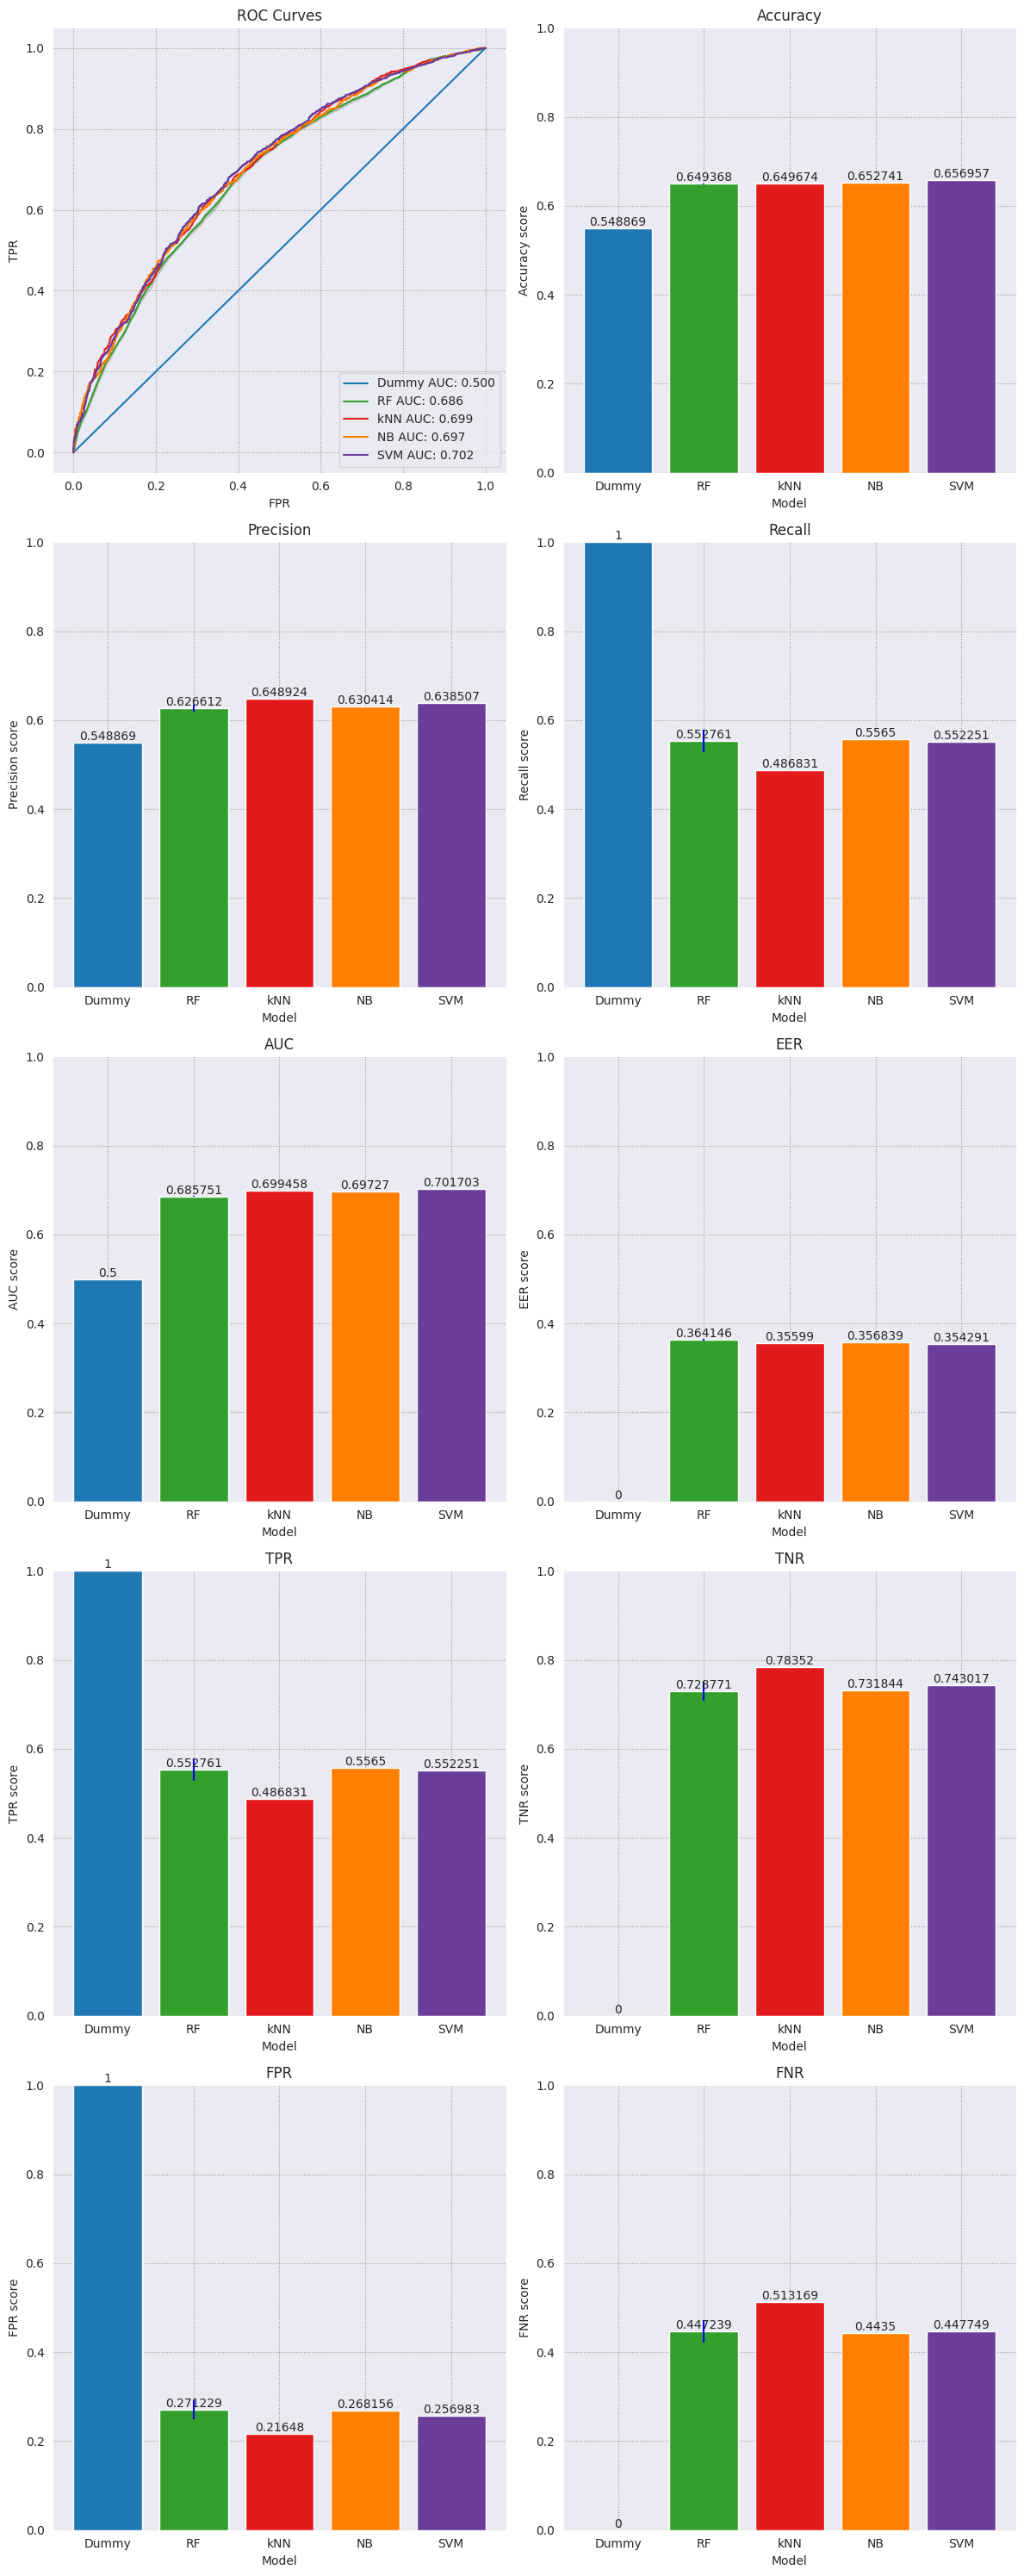

In [ ]:
def compare_binary_classification(names, prec_values, rec_values, tpr_values, tnr_values, fpr_values, fnr_values, roc_values, roc_auc, acc_values, eer_values):
  sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
  cmap = sns.color_palette('Paired')[1::2]

  fig, axs = plt.subplots(5, 2, figsize=(12, 30))

  for i in range(len(names)):
    axs[0][0].plot(roc_values[i][0], roc_values[i][1], label='{} AUC: {:.3f}'.format(names[i], roc_auc[i]), c=cmap[i])

  # ROCs RF
  axs[0][0].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

  # ----------

  axs[0][0].legend(loc='lower right')
  axs[0][0].set_xlabel('FPR')
  axs[0][0].set_ylabel('TPR')
  axs[0][0].set_title('ROC Curves')

  auc_bars = axs[0][1].bar(x=np.arange(len(names)), height=acc_values, color=cmap)
  axs[0][1].errorbar(x=np.arange(len(names)), y=acc_values, yerr=accuracies_std, fmt="none", ecolor="b")

  axs[0][1].set_xticks(np.arange(len(names)))
  axs[0][1].set_xticklabels(names)
  axs[0][1].set_ylim(0,1)
  axs[0][1].set_ylabel('Accuracy score')
  axs[0][1].set_xlabel('Model')
  axs[0][1].set_title('Accuracy')
  axs[0][1].bar_label(auc_bars)

  prec_bars = axs[1][0].bar(x=np.arange(len(names)), height=prec_values, color=cmap)
  axs[1][0].errorbar(x=np.arange(len(names)), y=prec_values, yerr=precisions_std, fmt="none", ecolor="b")

  axs[1][0].set_xticks(np.arange(len(names)))
  axs[1][0].set_xticklabels(names)
  axs[1][0].set_ylim(0,1)
  axs[1][0].set_ylabel('Precision score')
  axs[1][0].set_xlabel('Model')
  axs[1][0].set_title('Precision')
  axs[1][0].bar_label(prec_bars)

  rec_bars = axs[1][1].bar(x=np.arange(len(names)), height=rec_values, color=cmap)
  axs[1][1].errorbar(x=np.arange(len(names)), y=rec_values, yerr=recalls_std, fmt="none", ecolor="b")

  axs[1][1].set_xticks(np.arange(len(names)))
  axs[1][1].set_xticklabels(names)
  axs[1][1].set_ylim(0,1)
  axs[1][1].set_ylabel('Recall score')
  axs[1][1].set_xlabel('Model')
  axs[1][1].set_title('Recall')
  axs[1][1].bar_label(rec_bars)

  auc_bars = axs[2][0].bar(x=np.arange(len(names)), height=roc_auc, color=cmap)
  axs[2][0].errorbar(x=np.arange(len(names)), y=roc_auc, yerr=AUCs_std, fmt="none", ecolor="b")

  axs[2][0].set_xticks(np.arange(len(names)))
  axs[2][0].set_xticklabels(names)
  axs[2][0].set_ylim(0, 1)
  axs[2][0].set_ylabel('AUC score')
  axs[2][0].set_xlabel('Model')
  axs[2][0].set_title('AUC')
  axs[2][0].bar_label(auc_bars)

  eer_bars = axs[2][1].bar(x=np.arange(len(names)), height=eer_values, color=cmap)
  axs[2][1].errorbar(x=np.arange(len(names)), y=eer_values, yerr=EERs_std, fmt="none", ecolor="b")

  axs[2][1].set_xticks(np.arange(len(names)))
  axs[2][1].set_xticklabels(names)
  axs[2][1].set_ylim(0, 1)
  axs[2][1].set_ylabel('EER score')
  axs[2][1].set_xlabel('Model')
  axs[2][1].set_title('EER')
  axs[2][1].bar_label(eer_bars)

  tpr_bars = axs[3][0].bar(x=np.arange(len(names)), height=tpr_values, color=cmap)
  axs[3][0].errorbar(x=np.arange(len(names)), y=tpr_values, yerr=TPRs_std, fmt="none", ecolor="b")

  axs[3][0].set_xticks(np.arange(len(names)))
  axs[3][0].set_xticklabels(names)
  axs[3][0].set_ylim(0, 1)
  axs[3][0].set_ylabel('TPR score')
  axs[3][0].set_xlabel('Model')
  axs[3][0].set_title('TPR')
  axs[3][0].bar_label(tpr_bars)

  tnr_bars = axs[3][1].bar(x=np.arange(len(names)), height=tnr_values, color=cmap)
  axs[3][1].errorbar(x=np.arange(len(names)), y=tnr_values, yerr=TNRs_std, fmt="none", ecolor="b")

  axs[3][1].set_xticks(np.arange(len(names)))
  axs[3][1].set_xticklabels(names)
  axs[3][1].set_ylim(0, 1)
  axs[3][1].set_ylabel('TNR score')
  axs[3][1].set_xlabel('Model')
  axs[3][1].set_title('TNR')
  axs[3][1].bar_label(tnr_bars)

  fpr_bars = axs[4][0].bar(x=np.arange(len(names)), height=fpr_values, color=cmap)
  axs[4][0].errorbar(x=np.arange(len(names)), y=fpr_values, yerr=FPRs_std, fmt="none", ecolor="b")

  axs[4][0].set_xticks(np.arange(len(names)))
  axs[4][0].set_xticklabels(names)
  axs[4][0].set_ylim(0, 1)
  axs[4][0].set_ylabel('FPR score')
  axs[4][0].set_xlabel('Model')
  axs[4][0].set_title('FPR')
  axs[4][0].bar_label(fpr_bars)

  fnr_bars = axs[4][1].bar(x=np.arange(len(names)), height=fnr_values, color=cmap)
  axs[4][1].errorbar(x=np.arange(len(names)), y=fnr_values, yerr=FNRs_std, fmt="none", ecolor="b")

  axs[4][1].set_xticks(np.arange(len(names)))
  axs[4][1].set_xticklabels(names)
  axs[4][1].set_ylim(0, 1)
  axs[4][1].set_ylabel('FNR score')
  axs[4][1].set_xlabel('Model')
  axs[4][1].set_title('FNR')
  axs[4][1].bar_label(fnr_bars)

  plt.tight_layout()
  plt.show()

compare_binary_classification(models, precisions, recalls, TPRs, TNRs, FPRs, FNRs, ROCs, AUCs, accuracies, EERs)

### Grafici di confronto EFFICIENZA

In [ ]:
fig2, axs2 = plt.subplots(1, 2, figsize=(17,10))

sns.boxplot(data=efficiency_learn, x="Model", y="Time", ax=axs2[0], palette=sns.color_palette('Paired')[1::2])
axs2[0].set_title('Learning Efficiency')
axs2[0].set_ylabel("Time (sec)")
axs2[0].set_xlabel("Model")
sns.boxplot(data=efficiency_test, x="Model", y="Time", ax=axs2[1], palette=sns.color_palette('Paired')[1::2])
axs2[1].set_title('Prediction Efficiency')
axs2[1].set_ylabel("Time (sec)")
axs2[1].set_xlabel("Model");



---


## Binary Classification: 10-CV

## Import TUTTO

In [ ]:
url='https://drive.google.com/file/d/17gqD7QH9ZZUdqm6fp5nYnx9XITTf-Hy9/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

class_data = pd.read_csv(url, encoding='latin-1')

In [ ]:
# ORDINA DATASETS PER STAGIONE

class_data.sort_values(by=['SEASON'], inplace=True)

I valori null vengono rimossi perchè creano problemi con le tecniche d'apprendimento.

In [ ]:
# Rimuovo 15 righe contenenti "troppi" valori null
class_data.dropna(subset=['AVG(PTS_AVGSF)'], inplace=True)

class_data.dropna(subset=['SeventhHighestScoreHome'], inplace=True)
class_data.dropna(subset=['SeventhHighestScoreAway'], inplace=True)
class_data.dropna(subset=['EighthHighestScoreHome'], inplace=True)
class_data.dropna(subset=['EighthHighestScoreAway'], inplace=True)

# Rimuovo colonne "12-th player": troppi valori nulli

class_data.drop(['TwelfthHighestScoreAway', 'TwelfthHighestScoreHome'], axis=1, inplace=True)

# Rimuovo colonna "GameID": non va usata!

class_data.drop(['game_id'], axis=1, inplace=True)

# Rimuobo colonne "HOME_TEAM_ID" e "VISITOR_TEAM_ID": l'accuratezza migliora!

class_data.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID'], axis=1, inplace=True)
class_data.drop(['SEASON', 'AVG(OREB_AVGSF)', 'AWAY_AVG_OREB_AVGSF', 'AVG(TO_AVGSF)', 'AWAY_AVG_TO_AVGSF'], axis=1, inplace=True)
class_data.drop(['EleventhHighestScoreAway', 'EleventhHighestScoreHome', 'TenthHighestScoreAway', 'TenthHighestScoreHome', 'NinthHighestScoreAway', 'NinthHighestScoreHome'], axis=1, inplace=True)

In [ ]:
print('INFORMAZIONI DATASET:\n')
class_data.info()

INFORMAZIONI DATASET:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15323 entries, 0 to 15341
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HOME_TEAM_WINS           15323 non-null  int64  
 1   AVG(PTS_AVGSF)           15323 non-null  float64
 2   AVG(FGM_AVGSF)           15323 non-null  float64
 3   AVG(FGA_AVGSF)           15323 non-null  float64
 4   AVG(FTM_AVGSF)           15323 non-null  float64
 5   AVG(FTA_AVGSF)           15323 non-null  float64
 6   AVG(DREB_AVGSF)          15323 non-null  float64
 7   AVG(AST_AVGSF)           15323 non-null  float64
 8   AVG(STL_AVGSF)           15323 non-null  float64
 9   AVG(BLK_AVGSF)           15323 non-null  float64
 10  AVG(SECS_AVGSF)          15323 non-null  float64
 11  W_PCT                    15323 non-null  float64
 12  HOME_ELO_SF              15323 non-null  float64
 13  AWAY_AVG_PTS_AVGSF       15323 non-null  float64
 14 

Stampiamo il numero di righe con valori null per ciascuna colonna, per riscontro

In [ ]:
print('Numero di osservazioni con valore null in una determinata colonna\n')
class_data.isnull().sum()

Numero di osservazioni con valore null in una determinata colonna



HOME_TEAM_WINS             0
AVG(PTS_AVGSF)             0
AVG(FGM_AVGSF)             0
AVG(FGA_AVGSF)             0
AVG(FTM_AVGSF)             0
AVG(FTA_AVGSF)             0
AVG(DREB_AVGSF)            0
AVG(AST_AVGSF)             0
AVG(STL_AVGSF)             0
AVG(BLK_AVGSF)             0
AVG(SECS_AVGSF)            0
W_PCT                      0
HOME_ELO_SF                0
AWAY_AVG_PTS_AVGSF         0
AWAY_AVG_FGM_AVGSF         0
AWAY_AVG_FGA_AVGSF         0
AWAY_AVG_FTM_AVGSF         0
AWAY_AVG_FTA_AVGSF         0
AWAY_AVG_DREB_AVGSF        0
AWAY_AVG_AST_AVGSF         0
AWAY_AVG_STL_AVGSF         0
AWAY_AVG_BLK_AVGSF         0
AWAY_AVG_SECS_AVGSF        0
AWAY_WPCT_SF               0
AWAY_ELO_SF                0
HighestScoreHome           0
SecondHighestScoreHome     0
ThirdHighestScoreHome      0
FourthHighestScoreHome     0
FifthHighestScoreHome      0
SixthHighestScoreHome      0
SeventhHighestScoreHome    0
EighthHighestScoreHome     0
HighestScoreAway           0
SecondHighestS

In [ ]:
class_data['HOME_TEAM_WINS'].value_counts()

1    8843
0    6480
Name: HOME_TEAM_WINS, dtype: int64



---



Con il codice seguente, si divide il dataset in osservazioni e risposte. Le feature delle osservazioni verranno scalate in modo tale da avere media nulla e varianza uguale a 1.

In [ ]:
x_class = class_data.drop(['HOME_TEAM_WINS'], axis=1, inplace=False)
y_class = class_data['HOME_TEAM_WINS']

In [ ]:
# OMETTO TEMPORANEMENTE LO SCALAMENTO!

#std_scaler = StandardScaler()
#x_class = std_scaler.fit_transform(x_class)

Codice per memorizzare le statistiche di efficacia di ciascuna tecnica

In [ ]:
# dataframe for storing results in a convenient way for showing boxplot later

#reg_metrics = pd.DataFrame(columns=['Model', 'Prec', 'Rec', 'FPR', 'TPR', 'AUC', 'ACC'])
class_metrics = pd.DataFrame(columns=['Model', 'Prec', 'Rec', 'AUC', 'ACC'])
class_effic = pd.DataFrame(columns=['Model', 'TimeLearn', 'TimePredict', 'TimeTot'])

Di seguito il codice che genera i folds per la k-CV.
I folds sono uguali per tutte le tecniche!

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True)

## MLTs

Di seguito vengono applicate le diverse Learning Techniques e vengono calcolati gli indici di performance, graficati alla fine

### Dummy Classifier

In [ ]:
i=1;

for train_idx, test_idx in kfolds.split(x_class):
  dummy_classifier = DummyClassifier(strategy='most_frequent')
  now1 = datetime.now()
  dummy_classifier.fit(x_class.iloc[train_idx], y_class.iloc[train_idx])
  now2 = datetime.now()
  print(str(i) + ": fit OK - " + str(now2-now1))
  now3 = datetime.now()
  y_dummy_class = dummy_classifier.predict(x_class.iloc[test_idx])
  now4 = datetime.now()
  dummy_probs = dummy_classifier.predict_proba(x_class.iloc[test_idx])[:, 1]
  print(str(i) + ": predict OK - "+ str(now4-now3) +"\n")

  current_dummy_acc = accuracy_score(y_dummy_class, y_class.iloc[test_idx])
  current_dummy_prec = precision_score(y_dummy_class, y_class.iloc[test_idx])
  current_dummy_rec = recall_score(y_dummy_class, y_class.iloc[test_idx])
  current_dummy_fpr, current_dummy_tpr, _ = roc_curve(y_class.iloc[test_idx], dummy_probs)
  current_dummy_auc = auc(current_dummy_fpr, current_dummy_tpr)

  class_metrics.loc[len(class_metrics)] = ['Dummy', current_dummy_prec, current_dummy_rec, current_dummy_auc, current_dummy_acc]
  class_effic.loc[len(class_effic)] = ['Dummy', (now2-now1).seconds, (now4-now3).seconds, (now4-now1).seconds]

  i+=1

1: fit OK - 0:00:00.003879
1: predict OK - 0:00:00.002089

2: fit OK - 0:00:00.002847
2: predict OK - 0:00:00.001027

3: fit OK - 0:00:00.002818
3: predict OK - 0:00:00.001380

4: fit OK - 0:00:00.002739
4: predict OK - 0:00:00.001669

5: fit OK - 0:00:00.002779
5: predict OK - 0:00:00.001665

6: fit OK - 0:00:00.002745
6: predict OK - 0:00:00.001873

7: fit OK - 0:00:00.003149
7: predict OK - 0:00:00.001732

8: fit OK - 0:00:00.002915
8: predict OK - 0:00:00.001708

9: fit OK - 0:00:00.002772
9: predict OK - 0:00:00.001725

10: fit OK - 0:00:00.002715
10: predict OK - 0:00:00.001464



### Random Forest

In [ ]:
i=1;

for train_idx, test_idx in kfolds.split(x_class):
  rf_classifier = RandomForestClassifier()
  now1 = datetime.now()
  rf_classifier.fit(x_class.iloc[train_idx], y_class.iloc[train_idx])
  now2 = datetime.now()
  print(str(i) + ": fit OK - " + str(now2-now1))
  now3 = datetime.now()
  y_rf_class = rf_classifier.predict(x_class.iloc[test_idx])
  now4 = datetime.now()
  rf_probs = rf_classifier.predict_proba(x_class.iloc[test_idx])[:, 1]
  print(str(i) + ": predict OK - "+ str(now4-now3) +"\n")

  current_rf_acc = accuracy_score(y_rf_class, y_class.iloc[test_idx])
  current_rf_prec = precision_score(y_rf_class, y_class.iloc[test_idx])
  current_rf_rec = recall_score(y_rf_class, y_class.iloc[test_idx])
  current_rf_fpr, current_rf_tpr, _ = roc_curve(y_class.iloc[test_idx], rf_probs)
  current_rf_auc = auc(current_rf_fpr, current_rf_tpr)

  #class_metrics.loc[len(class_metrics)] = ['RF', current_rf_prec, current_rf_rec, current_rf_fpr, current_rf_tpr, current_rf_auc, current_rf_acc]
  class_metrics.loc[len(class_metrics)] = ['RF', current_rf_prec, current_rf_rec, current_rf_auc, current_rf_acc]
  class_effic.loc[len(class_effic)] = ['RF', (now2-now1).seconds, (now4-now3).seconds, (now4-now1).seconds]

  i+=1

1: fit OK - 0:00:08.708217
1: predict OK - 0:00:00.077811

2: fit OK - 0:00:08.929336
2: predict OK - 0:00:00.063883

3: fit OK - 0:00:09.254817
3: predict OK - 0:00:00.060886

4: fit OK - 0:00:08.648660
4: predict OK - 0:00:00.076617

5: fit OK - 0:00:09.010509
5: predict OK - 0:00:00.060226

6: fit OK - 0:00:09.451016
6: predict OK - 0:00:00.064179

7: fit OK - 0:00:08.895557
7: predict OK - 0:00:00.079059

8: fit OK - 0:00:08.698209
8: predict OK - 0:00:00.058872

9: fit OK - 0:00:09.250751
9: predict OK - 0:00:00.061051

10: fit OK - 0:00:09.034660
10: predict OK - 0:00:00.067306



### KNN

In [ ]:
i=1;

for train_idx, test_idx in kfolds.split(x_class):
  knn_classifier = KNeighborsClassifier()
  now1 = datetime.now()
  knn_classifier.fit(x_class.iloc[train_idx], y_class.iloc[train_idx])
  now2 = datetime.now()
  print(str(i) + ": fit OK - " + str(now2-now1))
  now3 = datetime.now()
  y_knn_class = knn_classifier.predict(x_class.iloc[test_idx])
  now4 = datetime.now()
  knn_probs = knn_classifier.predict_proba(x_class.iloc[test_idx])[:, 1]
  print(str(i) + ": predict OK - "+ str(now4-now3) +"\n")

  current_knn_acc = accuracy_score(y_knn_class, y_class.iloc[test_idx])
  current_knn_prec = precision_score(y_knn_class, y_class.iloc[test_idx])
  current_knn_rec = recall_score(y_knn_class, y_class.iloc[test_idx])
  current_knn_fpr, current_knn_tpr, _ = roc_curve(y_class.iloc[test_idx], knn_probs)
  current_knn_auc = auc(current_knn_fpr, current_knn_tpr)

  class_metrics.loc[len(class_metrics)] = ['kNN', current_knn_prec, current_knn_rec, current_knn_auc, current_knn_acc]
  class_effic.loc[len(class_effic)] = ['kNN', (now2-now1).seconds, (now4-now3).seconds, (now4-now1).seconds]

  i+=1

1: fit OK - 0:00:00.017978
1: predict OK - 0:00:00.531860

2: fit OK - 0:00:00.012479
2: predict OK - 0:00:00.456128

3: fit OK - 0:00:00.009588
3: predict OK - 0:00:00.225756

4: fit OK - 0:00:00.009407
4: predict OK - 0:00:00.257538

5: fit OK - 0:00:00.009364
5: predict OK - 0:00:00.263229

6: fit OK - 0:00:00.008963
6: predict OK - 0:00:00.243354

7: fit OK - 0:00:00.008748
7: predict OK - 0:00:00.238437

8: fit OK - 0:00:00.009799
8: predict OK - 0:00:00.236719

9: fit OK - 0:00:00.008783
9: predict OK - 0:00:00.244932

10: fit OK - 0:00:00.008990
10: predict OK - 0:00:00.251112



### Naive Bayes

In [ ]:
i=1;

for train_idx, test_idx in kfolds.split(x_class):
  nb_classifier = GaussianNB()
  now1 = datetime.now()
  nb_classifier.fit(x_class.iloc[train_idx], y_class.iloc[train_idx])
  now2 = datetime.now()
  print(str(i) + ": fit OK - " + str(now2-now1))
  now3 = datetime.now()
  y_nb_class = nb_classifier.predict(x_class.iloc[test_idx])
  now4 = datetime.now()
  nb_probs = nb_classifier.predict_proba(x_class.iloc[test_idx])[:, 1]
  print(str(i) + ": predict OK - "+ str(now4-now3) +"\n")

  current_nb_acc = accuracy_score(y_nb_class, y_class.iloc[test_idx])
  current_nb_prec = precision_score(y_nb_class, y_class.iloc[test_idx])
  current_nb_rec = recall_score(y_nb_class, y_class.iloc[test_idx])
  current_nb_fpr, current_nb_tpr, _ = roc_curve(y_class.iloc[test_idx], nb_probs)
  current_nb_auc = auc(current_nb_fpr, current_nb_tpr)

  class_metrics.loc[len(class_metrics)] = ['NB', current_nb_prec, current_nb_rec, current_nb_auc, current_nb_acc]
  class_effic.loc[len(class_effic)] = ['NB', (now2-now1).seconds, (now4-now3).seconds, (now4-now1).seconds]

  i+=1

1: fit OK - 0:00:00.018272
1: predict OK - 0:00:00.005551

2: fit OK - 0:00:00.017349
2: predict OK - 0:00:00.005184

3: fit OK - 0:00:00.019352
3: predict OK - 0:00:00.005239

4: fit OK - 0:00:00.018563
4: predict OK - 0:00:00.005211

5: fit OK - 0:00:00.019869
5: predict OK - 0:00:00.003963

6: fit OK - 0:00:00.020859
6: predict OK - 0:00:00.003889

7: fit OK - 0:00:00.016989
7: predict OK - 0:00:00.004605

8: fit OK - 0:00:00.018945
8: predict OK - 0:00:00.004799

9: fit OK - 0:00:00.018866
9: predict OK - 0:00:00.004667

10: fit OK - 0:00:00.018151
10: predict OK - 0:00:00.007414



### SVM

TEMPO STIMATO: <30 min per ogni fold  → Totale: ~4.5 ore

In [ ]:
i=1;

for train_idx, test_idx in kfolds.split(x_class):
  svm_classifier = BaggingClassifier(SVC(kernel='linear'))                      # Tentativo di migliorare la situazione...
  now1 = datetime.now()
  svm_classifier.fit(x_class.iloc[train_idx], y_class.iloc[train_idx])
  now2 = datetime.now()
  print(str(i) + ": fit OK - " + str(now2-now1))
  now3 = datetime.now()
  y_svm_class = svm_classifier.predict(x_class.iloc[test_idx])
  now4 = datetime.now()
  svm_probs = svm_classifier.predict_proba(x_class.iloc[test_idx])[:, 1]
  print(str(i) + ": predict OK - "+ str(now4-now3) +"\n")

  current_svm_acc = accuracy_score(y_svm_class, y_class.iloc[test_idx])
  current_svm_prec = precision_score(y_svm_class, y_class.iloc[test_idx])
  current_svm_rec = recall_score(y_svm_class, y_class.iloc[test_idx])
  current_svm_fpr, current_svm_tpr, _ = roc_curve(y_class.iloc[test_idx], svm_probs)
  current_svm_auc = auc(current_svm_fpr, current_svm_tpr)

  class_metrics.loc[len(class_metrics)] = ['SVM', current_svm_prec, current_svm_rec, current_svm_auc, current_svm_acc]
  class_effic.loc[len(class_effic)] = ['SVM', (now2-now1).seconds, (now4-now3).seconds, (now4-now1).seconds]

  i+=1

1: fit OK - 0:26:23.433204
1: predict OK - 0:00:03.343591

2: fit OK - 0:26:05.912646
2: predict OK - 0:00:03.512478

3: fit OK - 0:27:10.755093
3: predict OK - 0:00:02.208984

4: fit OK - 0:26:57.558402
4: predict OK - 0:00:03.425079

5: fit OK - 0:26:59.773945
5: predict OK - 0:00:02.235057

6: fit OK - 0:28:54.959681
6: predict OK - 0:00:02.350688

7: fit OK - 0:24:51.910577
7: predict OK - 0:00:02.220338

8: fit OK - 0:24:54.730322
8: predict OK - 0:00:02.198568



## Confronto MLTs

In [ ]:
# 'Prec', 'Rec', 'AUC', 'ACC'

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.boxplot(data=class_metrics, x="Model", y="Prec", ax=axs[0,0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=class_metrics, x="Model", y="Rec", ax=axs[0,1], palette=sns.color_palette('Paired')[1::2])

sns.boxplot(data=class_metrics, x="Model", y="AUC", ax=axs[1,0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=class_metrics, x="Model", y="ACC", ax=axs[1,1], palette=sns.color_palette('Paired')[1::2])

#sns.boxplot(data=class_metrics, x="FPR", y="Model", ax=axs[3], palette=sns.color_palette('Paired')[1::2])
#sns.boxplot(data=class_metrics, x="TPR", y="Model", ax=axs[4], palette=sns.color_palette('Paired')[1::2])

#######

fig2, axs2 = plt.subplots(3, 1, figsize=(13,25))

sns.boxplot(data=class_effic, x="Model", y="TimeLearn", ax=axs2[0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=class_effic, x="Model", y="TimePredict", ax=axs2[1], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=class_effic, x="Model", y="TimeTot", ax=axs2[2], palette=sns.color_palette('Paired')[1::2])

#######

plt.tight_layout()
plt.show()